<a href="https://colab.research.google.com/github/saoleksii/Trump2020_CSS_course_project/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path_file = "/content/drive/MyDrive/Trump2020_CSS_course_project/processed_political_dataset.csv"

In [ ]:
df = pd.read_csv(path_file)
display(df)

subreddit         time_created  \
0               Conservative  2021-01-01 00:03:03   
1               Conservative  2021-01-01 00:03:34   
2               Conservative  2021-01-01 00:04:34   
3               Conservative  2021-01-01 00:07:13   
4               Conservative  2021-01-01 00:08:50   
...                      ...                  ...   
5917516  PoliticalDiscussion  2020-12-31 23:59:18   
5917517  PoliticalDiscussion  2020-12-31 23:59:25   
5917518  PoliticalDiscussion  2020-12-31 23:59:35   
5917519  PoliticalDiscussion  2020-12-31 23:59:43   
5917520  PoliticalDiscussion  2020-12-31 23:59:48   

                                                      text  
0          i wonder how trump feels about pence right now?  
1        this man got his upvotes silenced and then got...  
2        of course this is what the demoncrats want. a ...  
3        a bank is a private business and should be abl...  
4                           or tried for treason/sedition?  
...                                                    ...  
5917516  hello, /u/debg99. thanks for contributing! unf...  
5917517  hello, /u/foxosocks. thanks for contributing! ...  
5917518  hello, /u/afew10_9toomany. thanks for contribu...  
5917519  hello, /u/toadfinger. thanks for contributing!...  
5917520  hello, /u/thebuckweat33. thanks for contributi...  

[5917521 rows x 3 columns]

# **Overview**

In [20]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/drive/MyDrive/ColabNotebooks/eda.ipynb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  teckit tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-extra texlive-latex-recommended texlive-pictures tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java 

**1. Basic info**

This dataset consists of Reddit submissions and comments and aims to research the social reaction on 2020 USA elections and Capytol raid 2021.

Subreedits that were used:

*Critics (Anti-Trump, Liberal)*

1. r/politics
2. r/democrats
3. r/politicaldiscussion


*Allies (Pro-Trump, Conservative)*

1. r/conservative
2. r/republicans
3. r/conspiracy


*Neutral*

1. r/news
2. r/worldnews
3. r/neutralpolitics



**2. Total numbers of records, shape and timeframe**

The number of records is 5.917.521.

The shape is 5.917.521 rows, 3 columns.

The time frame is 2020.10 – 2021.03.

In [ ]:
print(f"The number of records: {len(df)}")
print(f"The shape is: {df.shape}")
print(f"The time frame is {df.time_created.min()} to {df.time_created.max()}")


The number of records: 5917521
The shape is: (5917521, 3)
The time frame is 2020-10-01 00:00:00 to 2021-03-31 23:59:51


# **Activity and distribution**

**1. The distribution of activity over time**

Are there any peaks or anomalies in our dataset that could be used for our social research?
We will take the period of one month and check activity to find anomalies and peaks

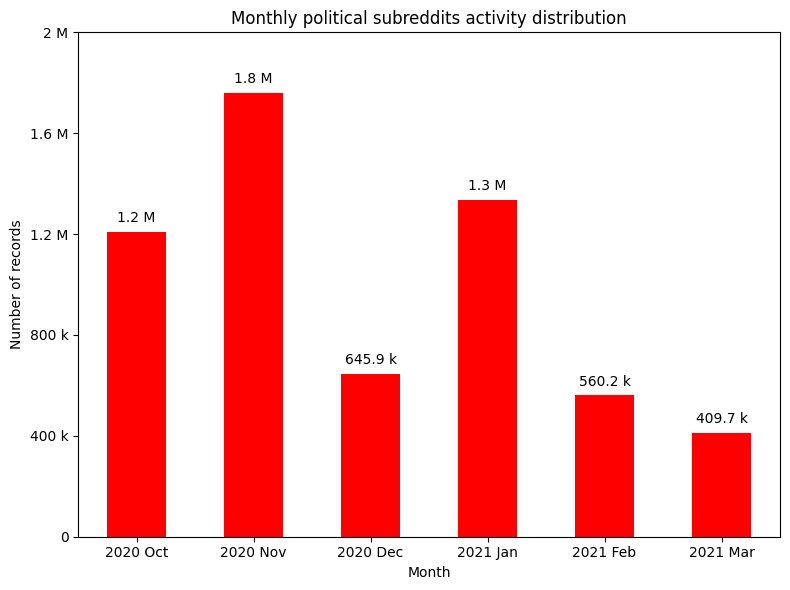

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np

df['time_created'] = pd.to_datetime(df['time_created'])
monthly_distribution = df.groupby(df['time_created'].dt.to_period('M')).size()
monthly_distribution.index = monthly_distribution.index.strftime('%Y %b')
ax = monthly_distribution.plot(kind='bar', figsize = (8,6), color = 'red')
ax.yaxis.set_major_locator(ticker.MultipleLocator(400000))
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_xlabel('Month')
ax.set_ylabel('Number of records')
ax.set_ylim(top = 2000000)
ax.bar_label(ax.containers[0], fmt = ticker.EngFormatter(places=1), padding = 5)
ax.set_title('Monthly political subreddits activity distribution')
plt.xticks(rotation=0)
plt.tight_layout()

We have peaks at october, november and january.

What subreddits had more records during these months?

**2. The distribution of activity over subreddits.**

In [ ]:
peak_months = [10,11,1]
df['month'] = df['time_created'].dt.month
select_peak_m = df['month'].isin(peak_months)
peak_df = df[select_peak_m]

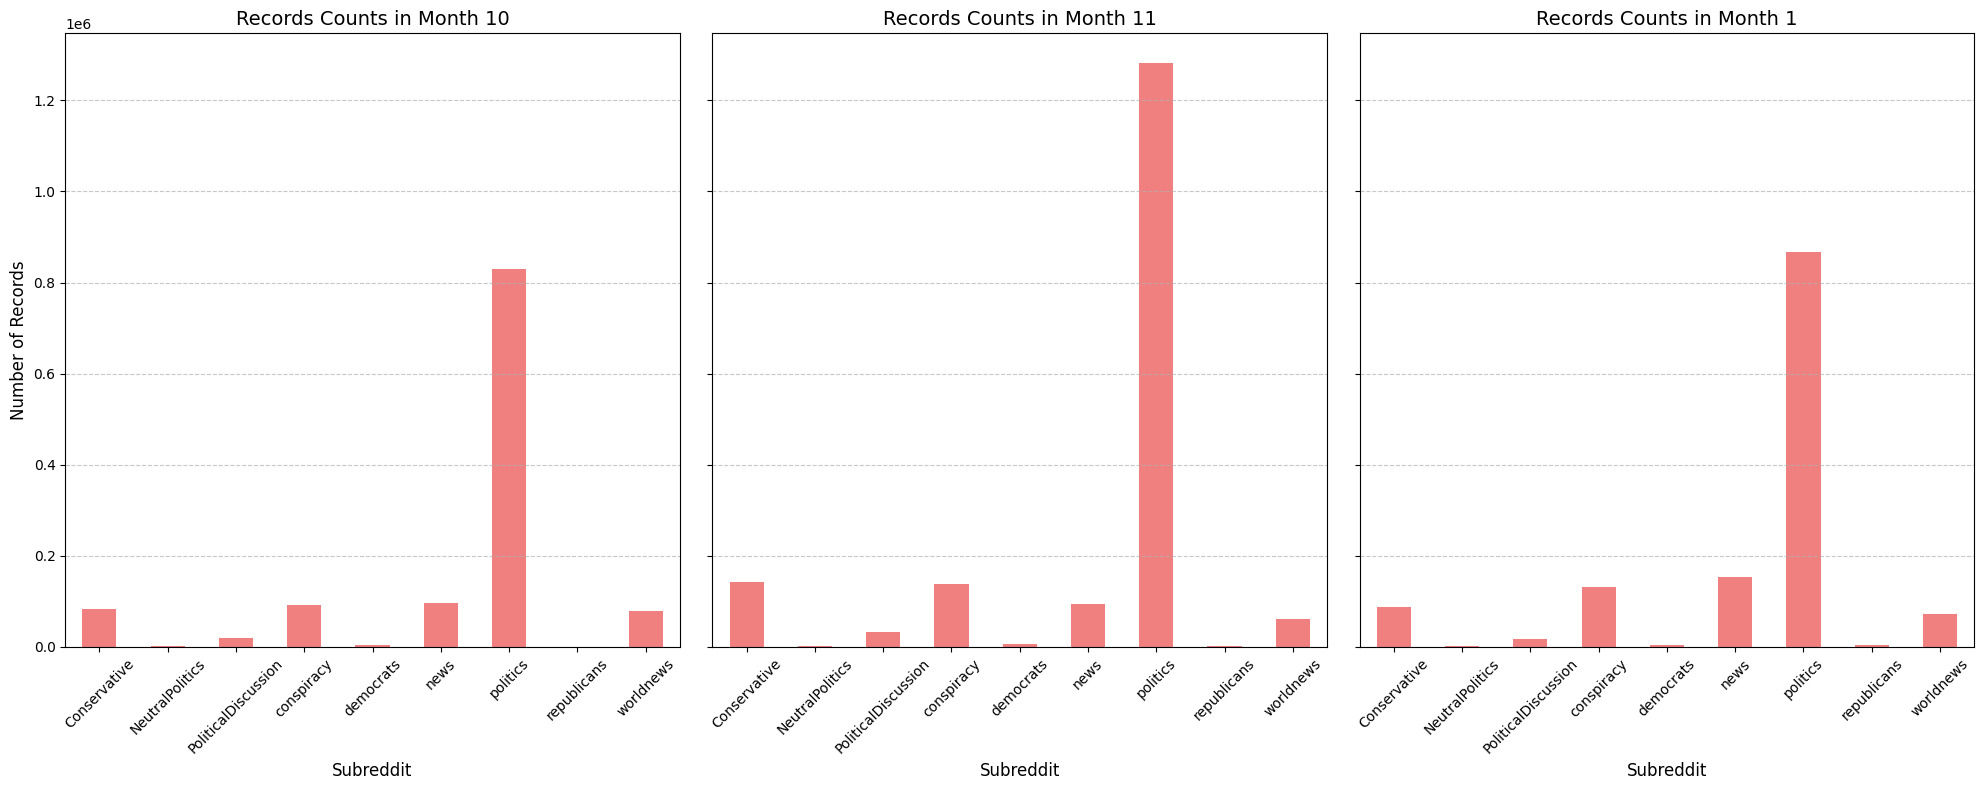

In [ ]:
peak_months_records = peak_df.pivot_table(index='subreddit',
                    columns='month',
                    values='text',
                    aggfunc='count'
                    )
peak_months_records = peak_months_records[peak_months]
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
for i, month in enumerate(peak_months):
  ax = axes[i]
  month_data = peak_months_records[month]
  month_data.plot(
      kind='bar',
      ax=ax,
      color='lightcoral'
  )
  ax.set_title(f'Records Counts in Month {month}', fontsize=14)
  ax.set_xlabel('Subreddit', fontsize=12)
  ax.set_ylabel('Number of Records', fontsize=12)
  ax.tick_params(axis='x', rotation=45)
  ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In conclusion, the biggest number of records was made by politics subreddit.

**We will analyze the daily distribution of posts to determine which days saw the highest intensity of discussions.**

In [ ]:
submissions_file = "/content/drive/MyDrive/Trump2020_CSS_course_project/submissions_processed.csv"
comments_file = '/content/drive/MyDrive/Trump2020_CSS_course_project/comments_processed.csv'

In [ ]:
df_subs = pd.read_csv(submissions_file, low_memory=False)
df_subs['time_created'] = pd.to_datetime(df_subs['time_created'])
df_coms = pd.read_csv(comments_file, low_memory=False)
df_coms['time_created'] = pd.to_datetime(df_coms['time_created'])

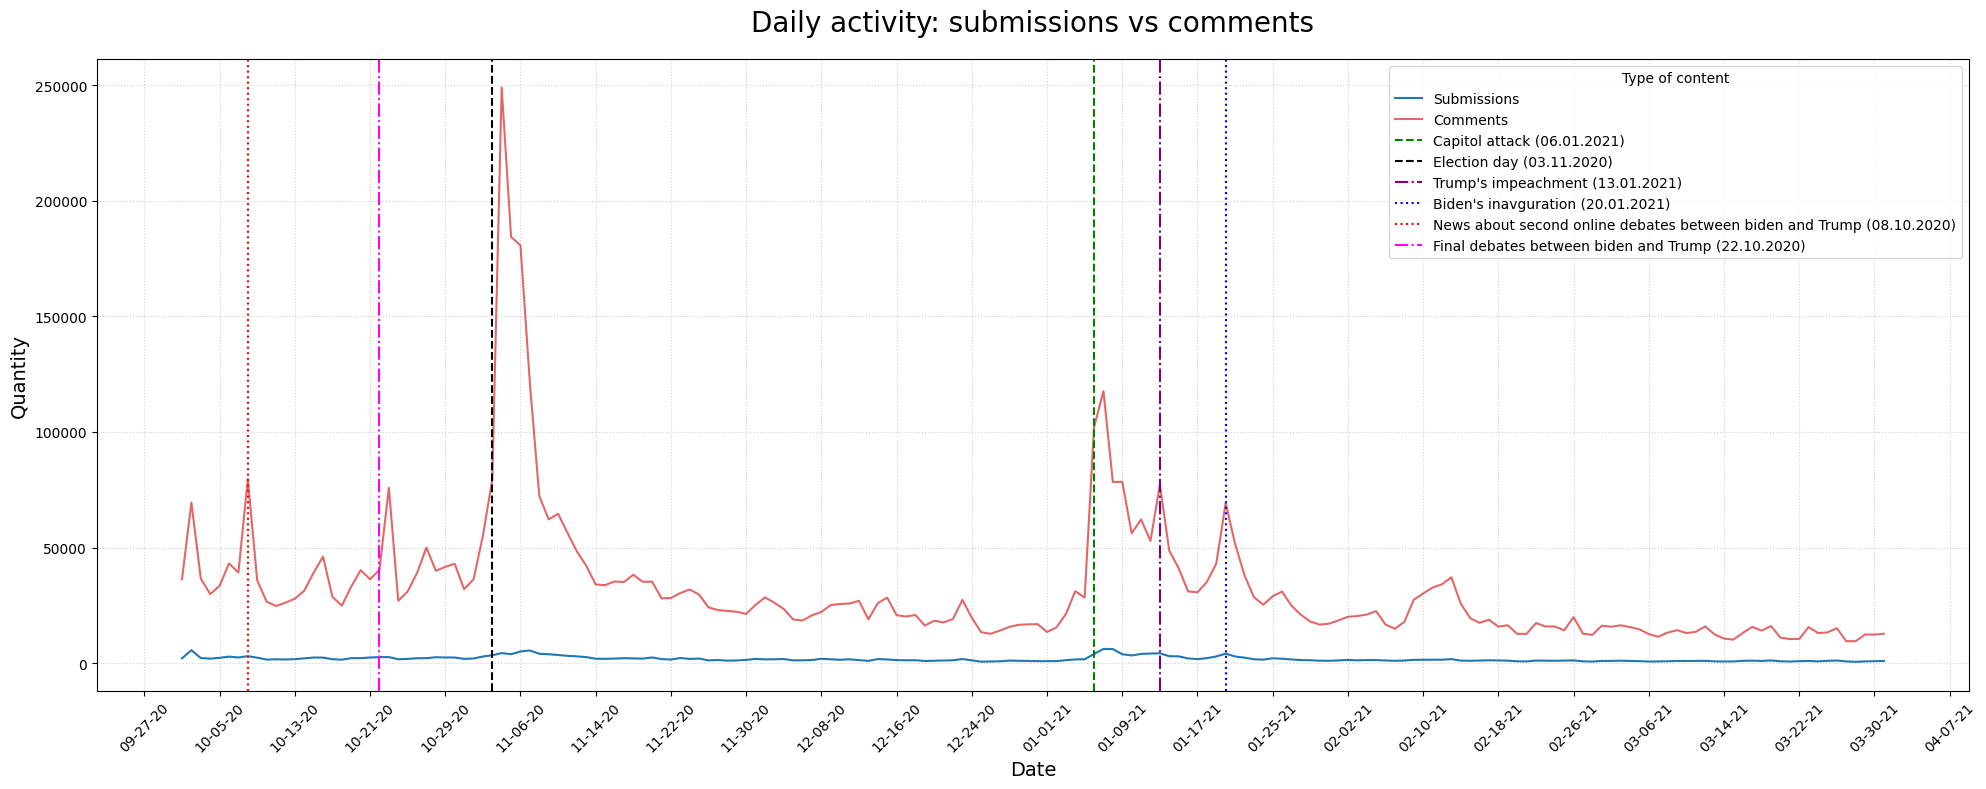

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

daily_subs = df_subs.groupby(df_subs['time_created'].dt.date).size().rename('posts')
daily_coms = df_coms.groupby(df_coms['time_created'].dt.date).size().rename('comments')

fig, ax = plt.subplots(figsize=(20, 8))

daily_subs.plot(ax=ax, label='Submissions', color='#1f77b4', linewidth=1.5)
daily_coms.plot(ax=ax, label='Comments', color='#d62728', linewidth=1.5, alpha=0.7)

ax.axvline(pd.to_datetime('2021-01-06'), color='green', linestyle='--', label='Capitol attack (06.01.2021)')
ax.axvline(pd.to_datetime('2020-11-03'), color='black', linestyle='--', label='Election day (03.11.2020)')
ax.axvline(pd.to_datetime('2021-01-13'), color='purple', linestyle='-.', label="Trump's impeachment (13.01.2021)")
ax.axvline(pd.to_datetime('2021-01-20'), color='blue', linestyle=':', label="Biden's inavguration (20.01.2021)")
ax.axvline(pd.to_datetime('2020-10-08'), color='red', linestyle=':', label="News about second online debates between biden and Trump (08.10.2020)")
ax.axvline(pd.to_datetime('2020-10-22'), color='magenta', linestyle='-.', label="Final debates between biden and Trump (22.10.2020)")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%y"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=8))

ax.set_title('Daily activity: submissions vs comments', fontsize=20, pad=20)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Quantity', fontsize=14)

ax.legend(title='Type of content', loc='upper right')
ax.grid(True, linestyle=':', alpha=0.6)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**We highlight the activity of subreddits on the days of these spikes to answer the question: did liberal communities dominate during the election and did activity shift toward conservative blocs during the events of January?**

In [ ]:
import seaborn as sns

df_coms['date'] = df_coms['time_created'].dt.date
peak_dates = [pd.to_datetime('2020-11-04').date(),pd.to_datetime('2021-01-07').date(), pd.to_datetime('2021-01-13').date()]
df_peaks = df_coms[df_coms['date'].isin(peak_dates)]
df_subreddit_activity = df_peaks.groupby(['date', 'subreddit']).size().reset_index(name='record_count')

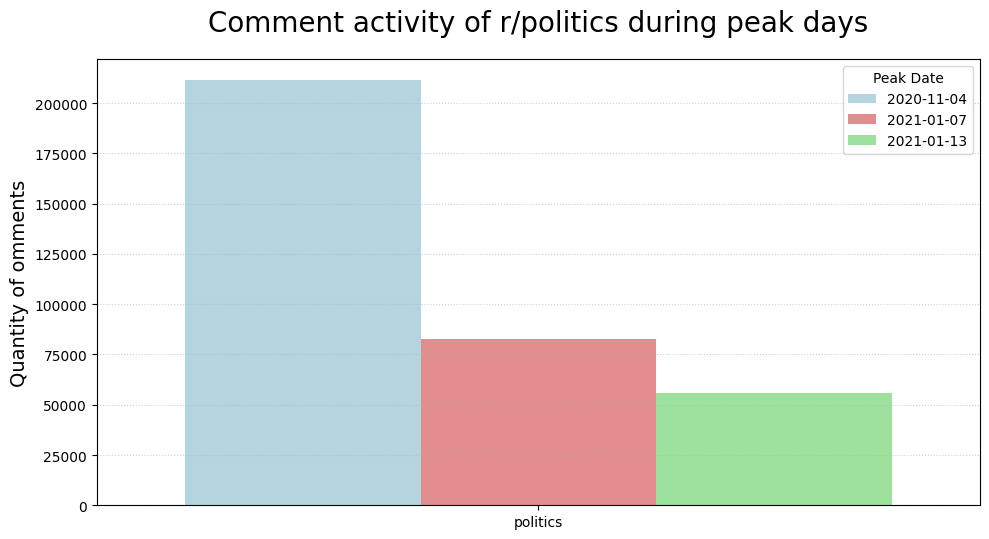

In [ ]:
df_politics = df_subreddit_activity[df_subreddit_activity['subreddit'] == 'politics'].copy()

plt.figure(figsize=(10, 5.5))
sns.barplot(data=df_politics, x='subreddit', y='record_count', hue='date', palette=['lightblue', 'lightcoral', 'lightgreen'])

plt.title('Comment activity of r/politics during peak days', fontsize=20, pad=20)
plt.xlabel('')
plt.ylabel('Quantity of omments', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Peak Date', loc='upper right')
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

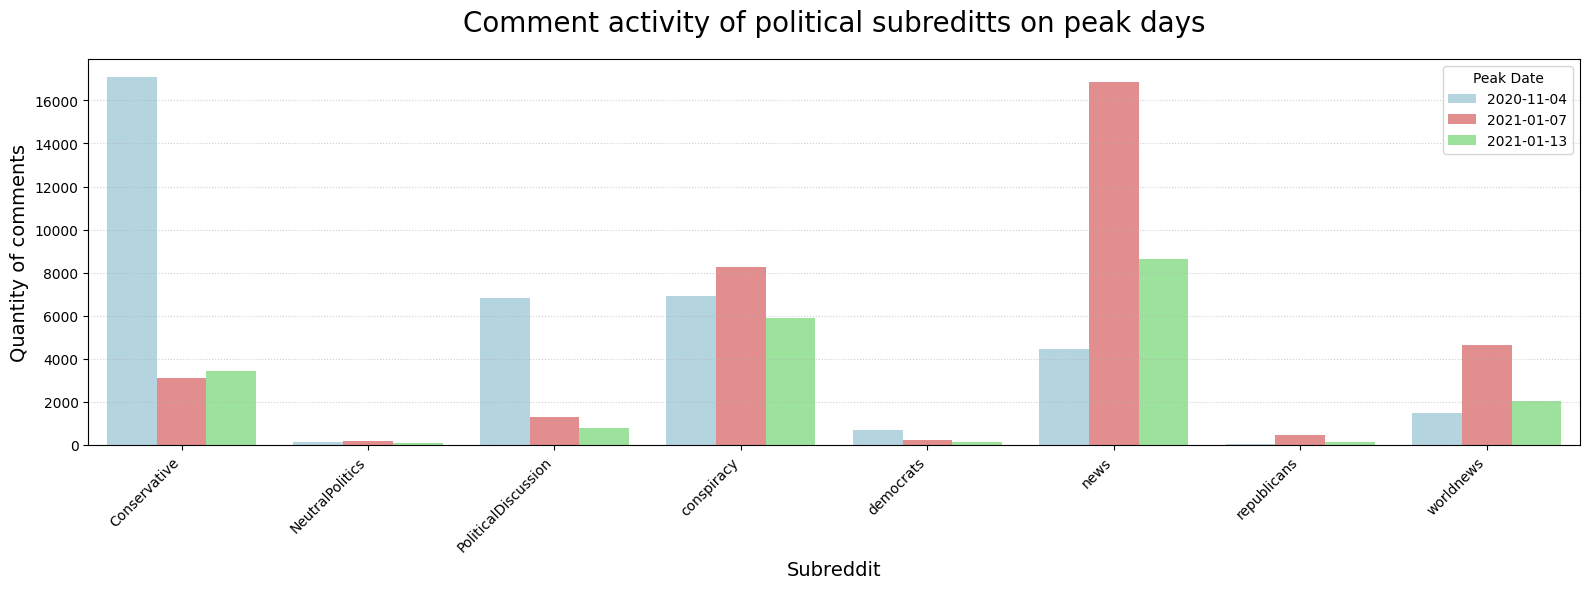

In [ ]:
df_other_subs = df_subreddit_activity[df_subreddit_activity['subreddit'] != 'politics'].copy()

plt.figure(figsize=(16, 6))
sns.barplot(data=df_other_subs, x='subreddit', y='record_count', hue='date', palette=['lightblue', 'lightcoral', 'lightgreen'])

plt.title('Comment activity of political subreditts on peak days', fontsize=20, pad=20)
plt.xlabel('Subreddit', fontsize=14)
plt.ylabel('Quantity of comments', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Peak Date', loc='upper right')
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

We can group into 2 groups democrats/republicans to find more info about activity.

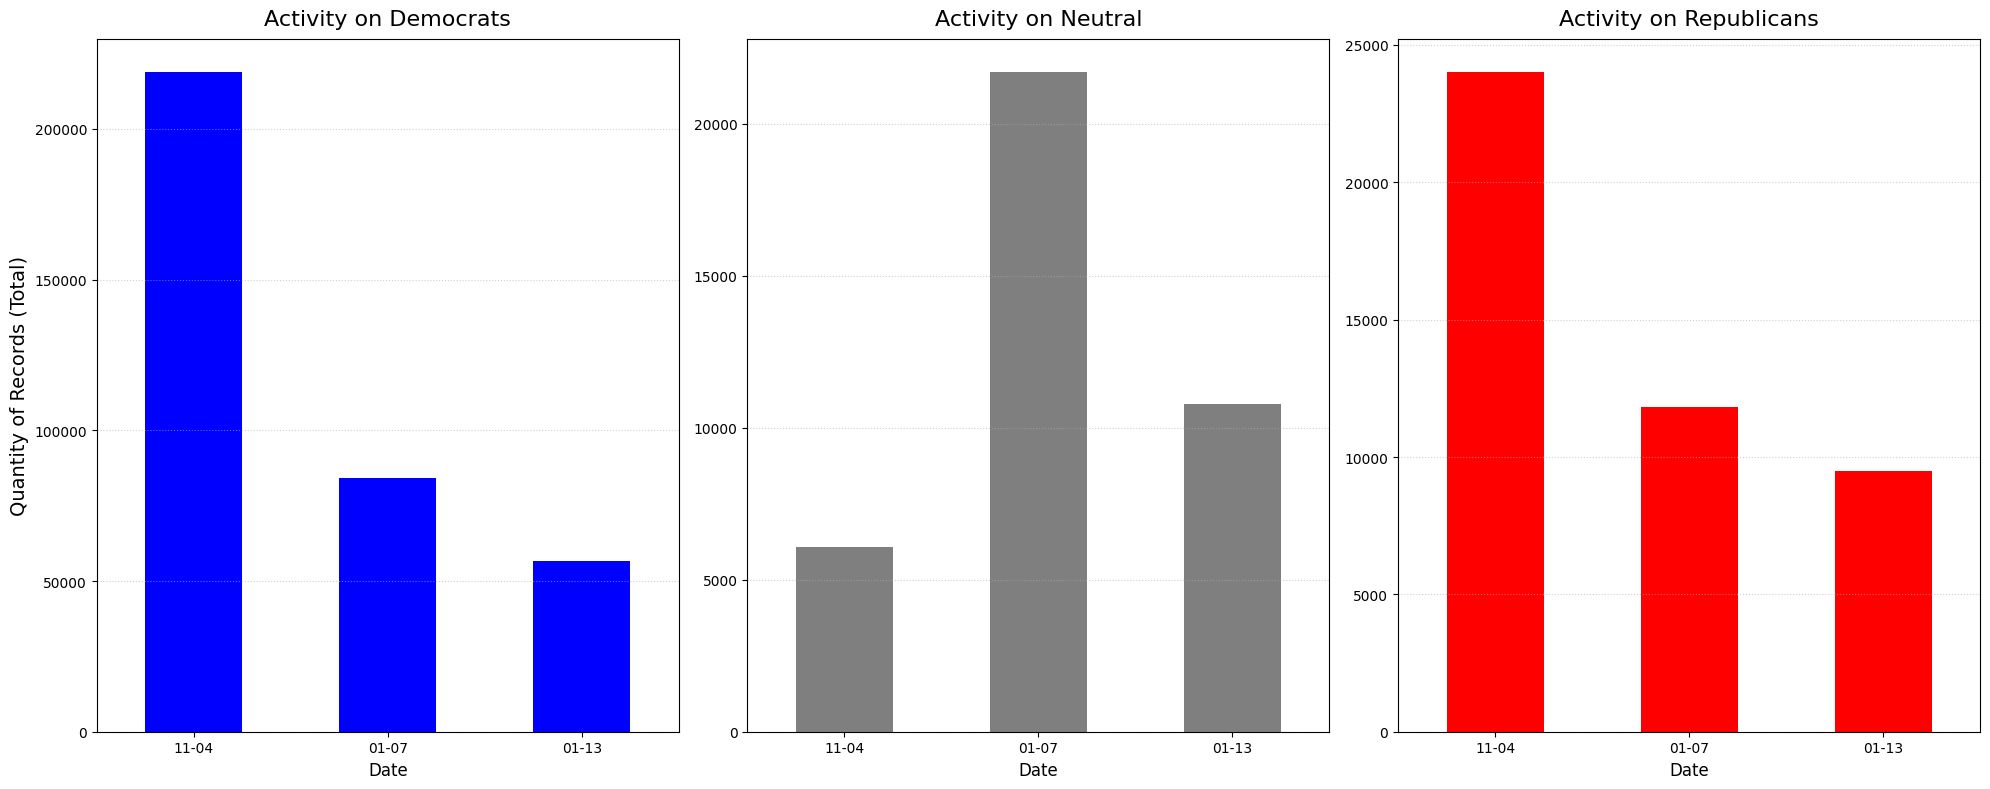

In [ ]:
grouped_subs = {
    'Conservative': 'republicans',
    'republicans': 'republicans',
    'conspiracy': 'republicans',
    'news': 'neutral',
    'worldnews': 'neutral',
    'NeutralPolitics': 'neutral',
    'politics': 'democrats',
    'democrats': 'democrats',
    'PoliticalDiscussion': 'democrats'
}
grouped_df = df_subreddit_activity.pivot_table(index='subreddit',
                    columns='date',
                    values='record_count',
                    )
grouped_df = grouped_df.groupby(grouped_subs).sum()
grouped_df = grouped_df.stack().reset_index()
grouped_df.columns = ['group', 'date', 'record_count']
groups_select = grouped_df['group'].unique()

fig, axes = plt.subplots(1, 3, figsize=(20,8))
for i, group in enumerate(groups_select):
      ax = axes[i]
      groups_data = grouped_df[grouped_df['group'] == group]
      groups_data.plot(
          kind='bar',
          x='date',
          y='record_count',
          ax=ax,
          color= {
                'democrats': 'blue',
                'republicans': 'red',
                'neutral': '#7f7f7f'
                }.get(group),
          legend = False
      )
      ax.set_title(f'Activity on {group.capitalize()}', fontsize=16, pad=10)
      ax.set_xlabel('Date', fontsize=12)
      if i == 0:
          ax.set_ylabel('Quantity of Records (Total)', fontsize=14)
      else:
          ax.set_ylabel('')
      ax.set_xticklabels(pd.to_datetime(groups_data['date']).dt.strftime('%m-%d'), rotation=0)
      ax.grid(axis='y', linestyle=':', alpha=0.6)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()


Here we can see that the biggest number of democrats' and republicans' comments were during the election results.

Neutral group was the most active on the day of capytol raid. Also during raid and impeachment republicans were more active than democrats.

If we compare democrats subreddit to republican subreddit, we will find more info about the change of the activity.

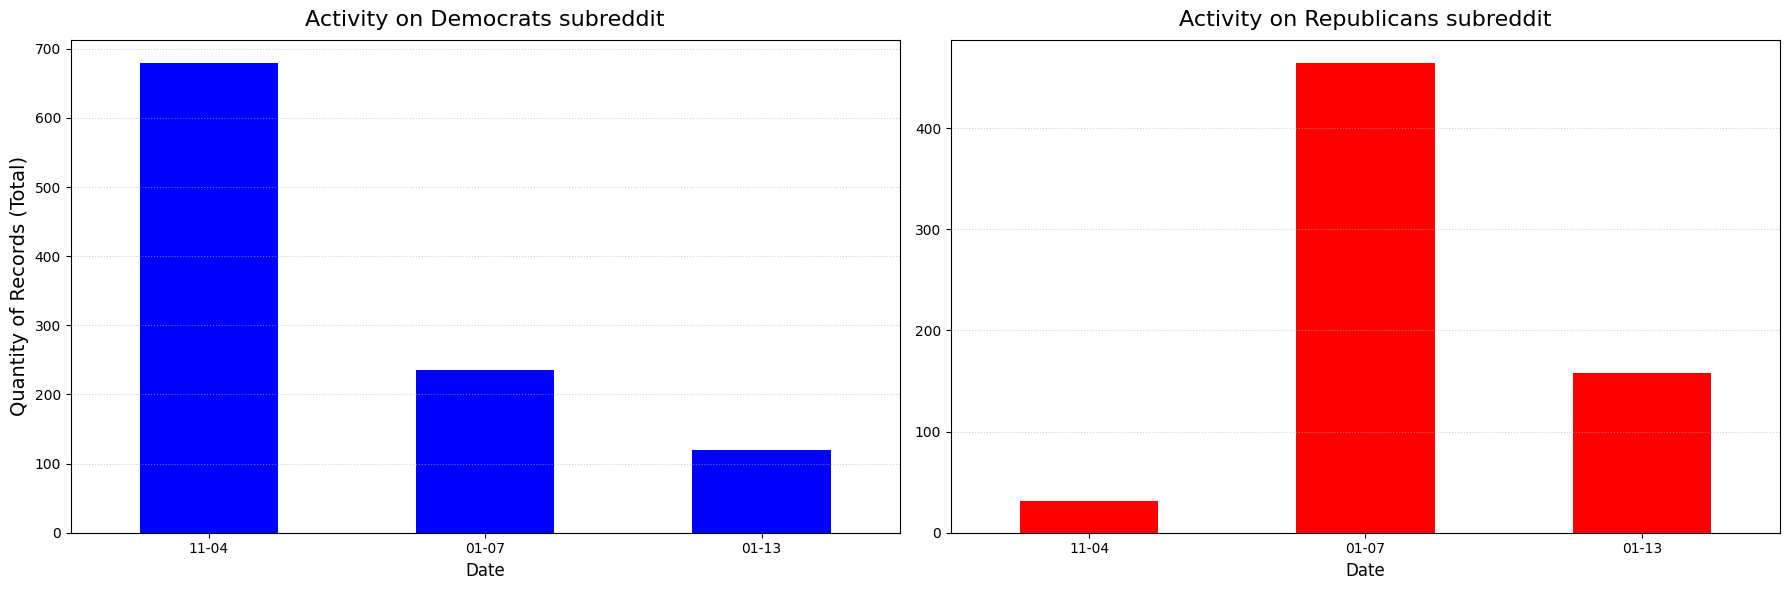

In [ ]:
d_r = df_subreddit_activity[df_subreddit_activity['subreddit'].isin(['democrats', 'republicans'])]
fig, axes = plt.subplots(1, 2, figsize=(18,6))
subs_select = d_r['subreddit'].unique()
for i, subr in enumerate(subs_select):
      ax = axes[i]
      subs_data = d_r[d_r['subreddit'] == subr]
      subs_data.plot(
          kind='bar',
          x='date',
          y='record_count',
          ax=ax,
          color= {
                'democrats': 'blue',
                'republicans': 'red',
                }.get(subr),
          legend = False
      )
      ax.set_title(f'Activity on {subr.capitalize()} subreddit', fontsize=16, pad=10)
      ax.set_xlabel('Date', fontsize=12)
      if i == 0:
          ax.set_ylabel('Quantity of Records (Total)', fontsize=14)
      else:
          ax.set_ylabel('')
      ax.set_xticklabels(pd.to_datetime(groups_data['date']).dt.strftime('%m-%d'), rotation=0)
      ax.grid(axis='y', linestyle=':', alpha=0.6)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()

Here we can see that people on Republicans subreddit had huge reaction on capytol raid, where as Democrats had the most comments during the election results.

To conclude, we can say that the biggest polarization was during the election results. Also, democrats have a far bigger community than republicans.

During Capitol raid and impeachment polarization was low, conservatives were more active than democrats, neutral group was the most active during raid and impeachment.

# **Content analysis**

**1. Frequent terms**

However, the quantity of posts doesn't tell the full story. This section moves from "how many" to "what" by analyzing the text content itself. Let's start with analysing frequent terms

At first, let's find out what are the most common 2-word phrases used across liberal, conservative and neutral communities on the peak days? This way we can understand about what the conversation was in different periods of time.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_bigrams(text, n=100):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(text)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq, columns = ['Bigram', 'Count']).head(n)

In [ ]:
UNWANTED_BIGRAMS = (
    'https www|twitter com|reddit com|www reddit|https twitter|com politics|'
    'message compose|com message|politics comments|compose politics|'
    'question regarding|regarding removal|removal submission|message moderators|'
    'feel free|politics wiki|thank participating|participating politics|'
    'questions removal|removal feel|2021 01|nytimes com|president trump|don think|'
    'think know|going happen|know right|white house|united states|free message|'
    'moderators https|politics amp|amp subject|subject question|amp message|'
    'message question|www nytimes|01 05|lot people|want see|want know|people know|'
    'don know|said said|point view|mean people|ve seen|new york|los angeles|'
    'lot things|believe said|just like|don want|looks like|like trump|pop lt|'
    'lt gt| gt pop|com interactive|interactive 2021|05 elections|runoff html|'
    'submission https|domains list|approved domains|wiki approveddomainslist|'
    'amp x200b|com realdonaldtrump|article submitted|submitted article|'
    'submitted politics|submission removed|removed following|following reason|'
    'politics submission|reason submitted|trump just|trump supporter|nytimes com|'
    'https redd|submit spam|comments krz3gr|social media|https np|np reddit|people like'
    'com conspiracy|com news|days https|politics days|wiki index|don like|think trump'
    'com autotldr|autotldr comments|amp quot|amp 039|http np|org wiki'
    'en wikipedia|election night|2020 11|wi mi|years ago|http np|gt gt'
)

In [ ]:
DATES = {
    'Elections': pd.to_datetime('2020-11-04').date(),
    'Capitol attack': pd.to_datetime('2021-01-07').date(),
    'Impeachment': pd.to_datetime('2021-01-13').date()
}
SUBREDDIT_MAP = {
    'Liberal': ['politics', 'PoliticalDiscussion', 'democrats'],
    'Conservative': ['Conservative', 'republicans', 'conspiracy'],
    'Neutral': ['news', 'worldnews', 'NeutralPolitics']
}

In [ ]:
def analyze_and_plot_comments_biagrams(df_coms, date_name, target_date, select_col):
    df_date_data = df_coms[df_coms['time_created'].dt.date == target_date].copy()
    fig, axes = plt.subplots(1, 3, figsize=(28, 14))

    fig.suptitle(f'Bigram Frequency: {date_name} ({target_date})', fontsize=28, y=1.03)

    for i, (category, subreddits) in enumerate(SUBREDDIT_MAP.items()):
        ax = axes[i]
        category_text = df_date_data[
            df_date_data['subreddit'].isin(subreddits)][select_col]
        df_top_category = get_top_bigrams(category_text)

        if not df_top_category.empty:
            df_top_category = df_top_category[
                ~df_top_category['Bigram'].str.contains(UNWANTED_BIGRAMS, regex=True, case=False)].head(20)

        color_map = {'Liberal': 'blue', 'Conservative': 'red', 'Neutral': 'grey'}

        if not df_top_category.empty:
            sns.barplot(data=df_top_category, x='Count', y='Bigram', ax=ax, color=color_map[category])
            ax.set_title(f'{category} subreddits', fontsize=22)
        else:
            ax.text(0.5, 0.5, 'No valid bigrams found.', ha='center', va='center', fontsize=14, color='gray')
            ax.set_title(f'{category} subreddits', fontsize=22)

        ax.set_xlabel('Frequency Count', fontsize=18)
        ax.set_ylabel('Bigram (2-word phrase)' if i == 0 else '', fontsize=14)
        ax.tick_params(axis='y', labelsize=16)

    plt.tight_layout()
    plt.show()

In [ ]:
def create_title_figure(main_title):
    fig, ax = plt.subplots(figsize=(24, 1.5))
    fig.suptitle(main_title, fontsize=28, y=0.5, ha='center')
    ax.axis('off')
    plt.show()

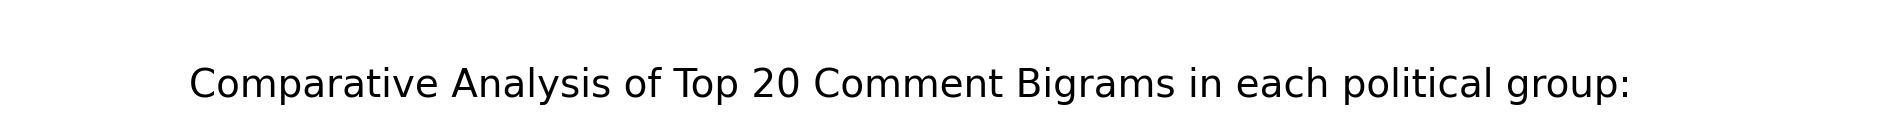

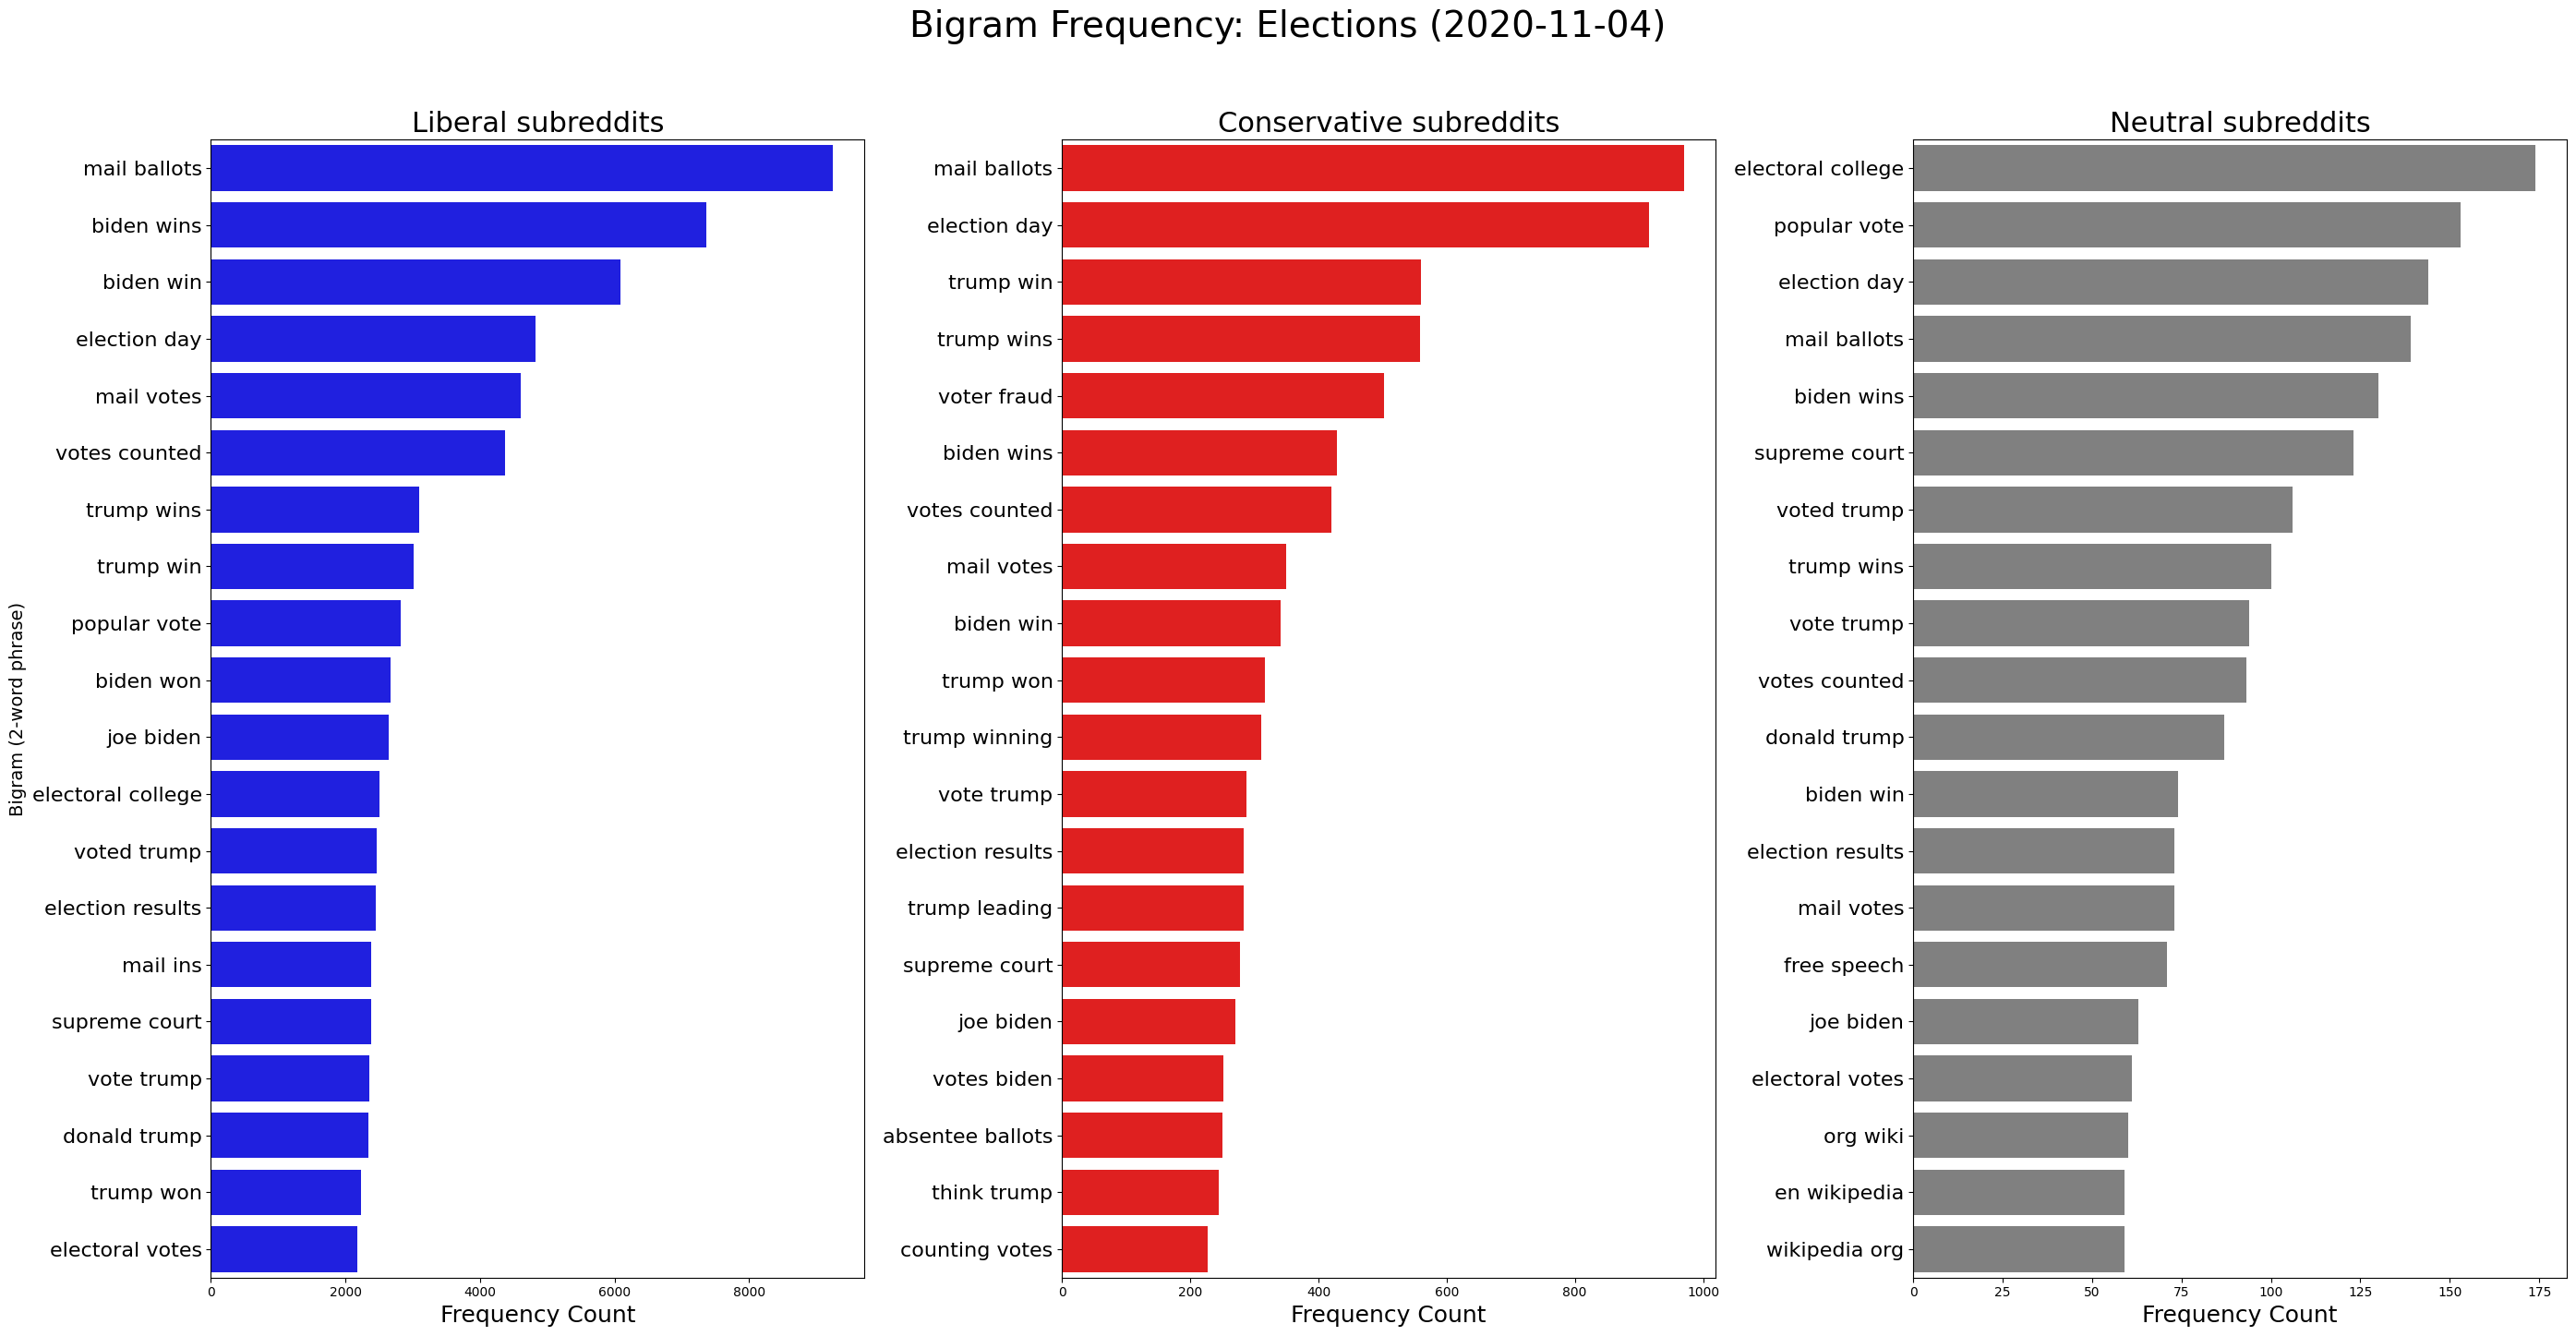

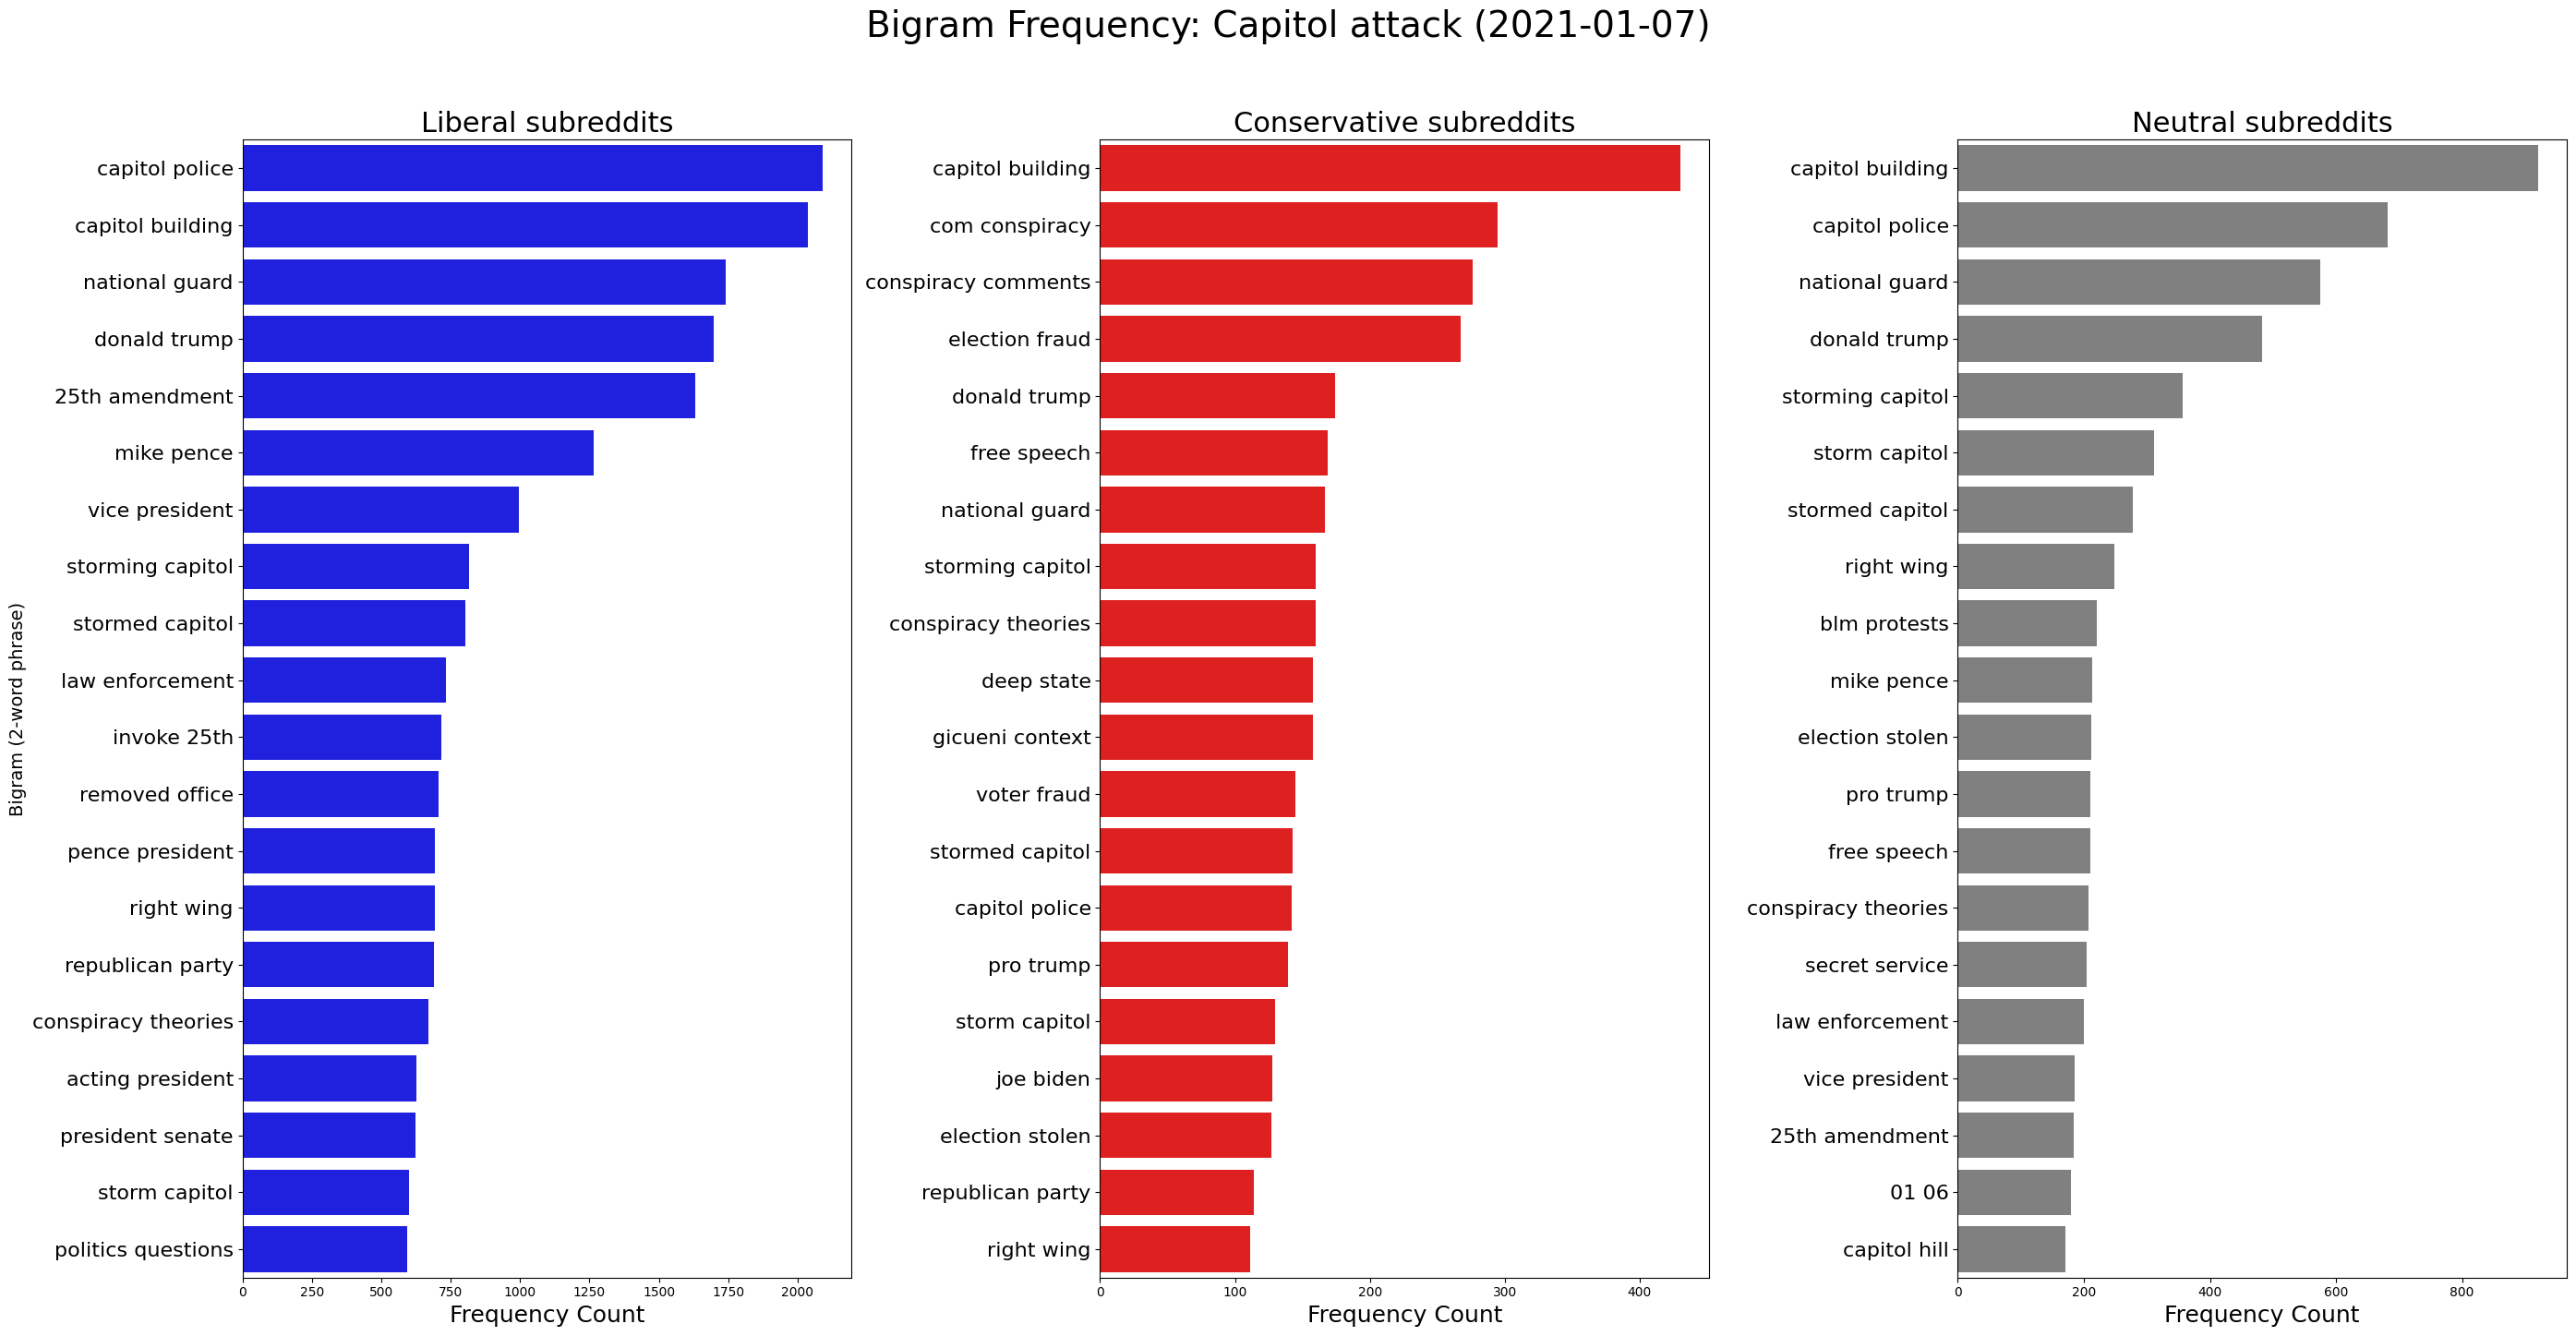

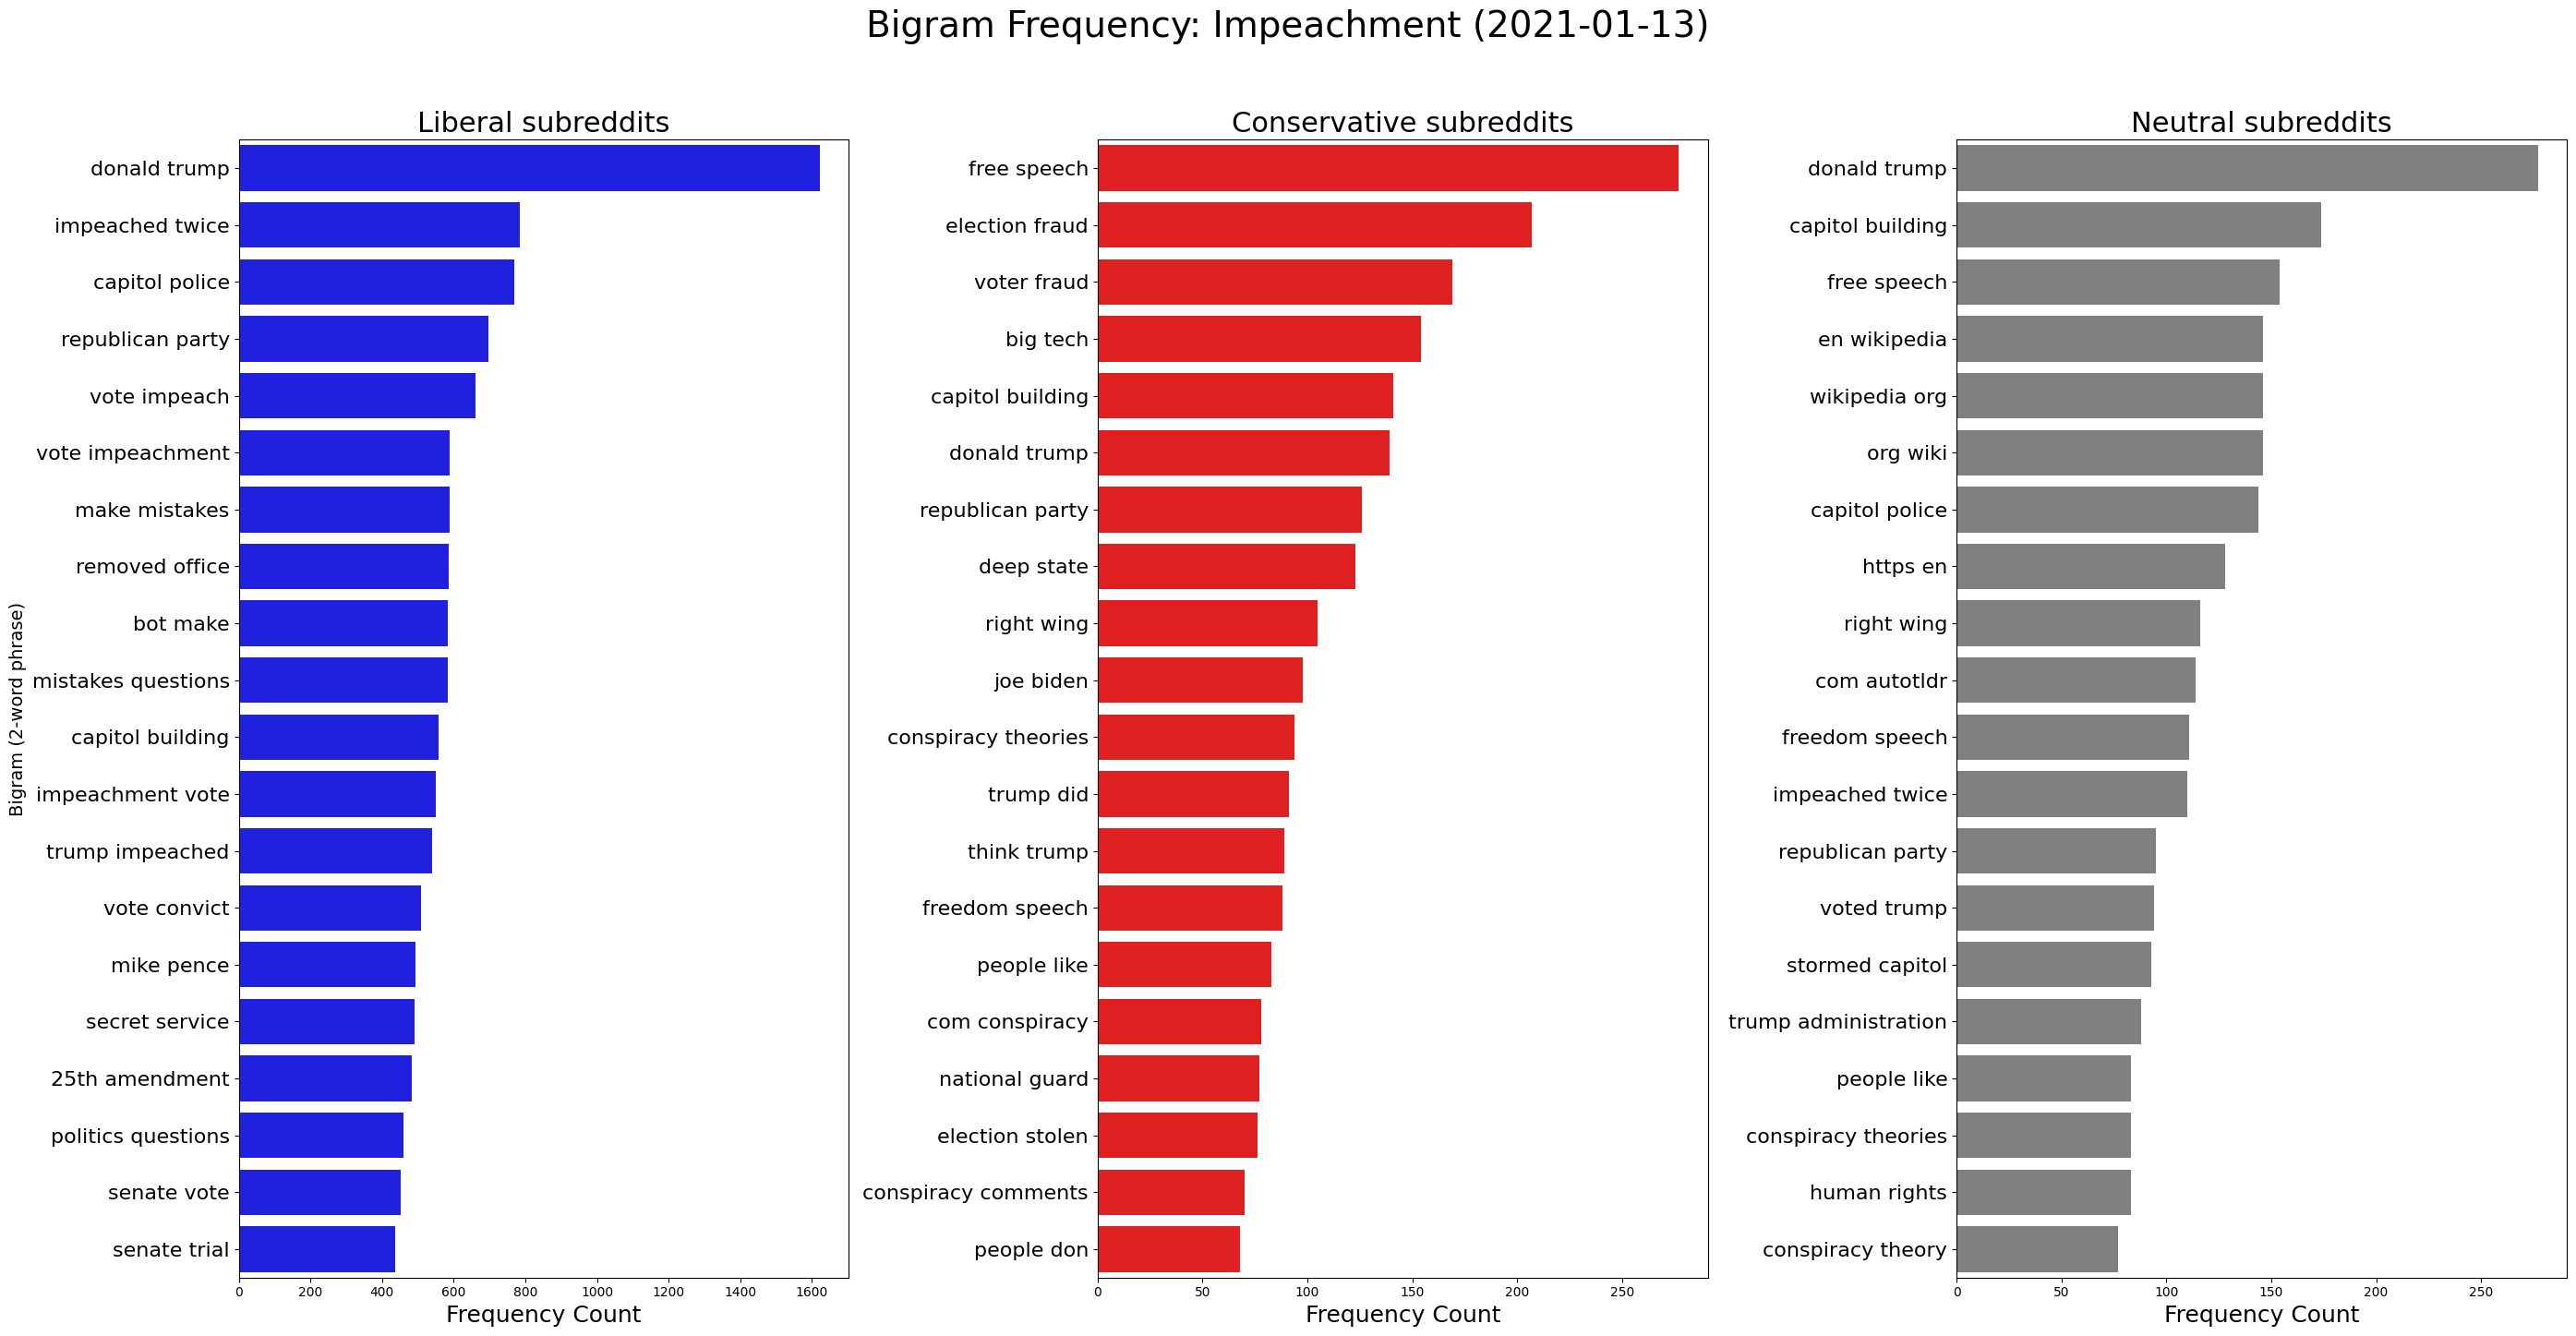

In [ ]:
MAIN_TITLE_TEXT = "Comparative Analysis of Top 20 Comment Bigrams in each political group:"
create_title_figure(MAIN_TITLE_TEXT)
print('\n' * 2)

for date_name, target_date in DATES.items():
    analyze_and_plot_comments_biagrams(df_coms, date_name, target_date, 'text')
    print('\n' * 2)

**The plots clearly visualize political polarization. All groups often discuss the same event, but the language they use reveals a completely different narrative.**

* Liberal Subreddits: The focus shifts from validating the election ("biden wins," "mail ballots") to reacting with a focus on institutional response during the attack ("capitol police," "25th amendment") and finally to establishing accountability ("impeached twice")

* Conservative Subreddits: A consistent counter-narrative is maintained. It begins with contesting the election ("voter fraud," "trump win"), shifts to alternative narratives during the attack ("conspiracy theory"), and reframes the impeachment as an issue of "free speech," effectively deflecting from the event itself

* Neutral Subreddits: This group serves as an observational baseline. The discussion is more procedural and descriptive ("electoral college," "capitol building") and frequently includes external references ("en wikipedia"), indicating a focus on factual citation rather than a strong partisan frame

In [ ]:
def analyze_and_plot_submissions_bigrams(df_subs, date_name, target_date):
    df_date_data = df_subs[df_subs['time_created'].dt.date == target_date].copy()

    fig, axes = plt.subplots(1, 3, figsize=(28, 14))

    fig.suptitle(f'{date_name} ({target_date})', fontsize=28, y=1.03)

    COLOR_MAP = {'Liberal': 'blue', 'Conservative': 'red', 'Neutral': 'green'}

    for i, (category, subreddits) in enumerate(SUBREDDIT_MAP.items()):
        ax = axes[i]
        category_text = df_date_data[
            df_date_data['subreddit'].isin(subreddits)]['title']
        df_top_category = get_top_bigrams(category_text, n=100)

        if not df_top_category.empty:
            df_top_category = df_top_category[~df_top_category['Bigram'].str.contains(UNWANTED_BIGRAMS, regex=True, case=False)].head(20)

        if not df_top_category.empty:
            sns.barplot(data=df_top_category, x='Count', y='Bigram', ax=ax, color=COLOR_MAP[category])
            ax.set_title(f'{category} subreddits', fontsize=22)
        else:
            ax.text(0.5, 0.5, 'No valid bigrams found.', ha='center', va='center', fontsize=14, color='gray')
            ax.set_title(f'{category} subreddits', fontsize=22)

        ax.set_xlabel('Frequency Count', fontsize=18)
        ax.set_ylabel('Bigram (2-word phrase)' if i == 0 else '', fontsize=14)
        ax.tick_params(axis='y', labelsize=16)

    plt.tight_layout()
    plt.show()

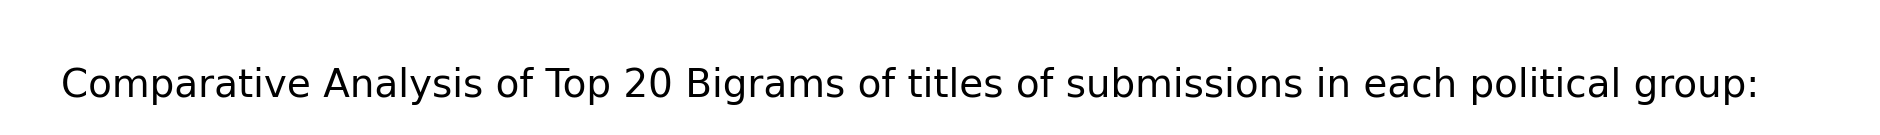

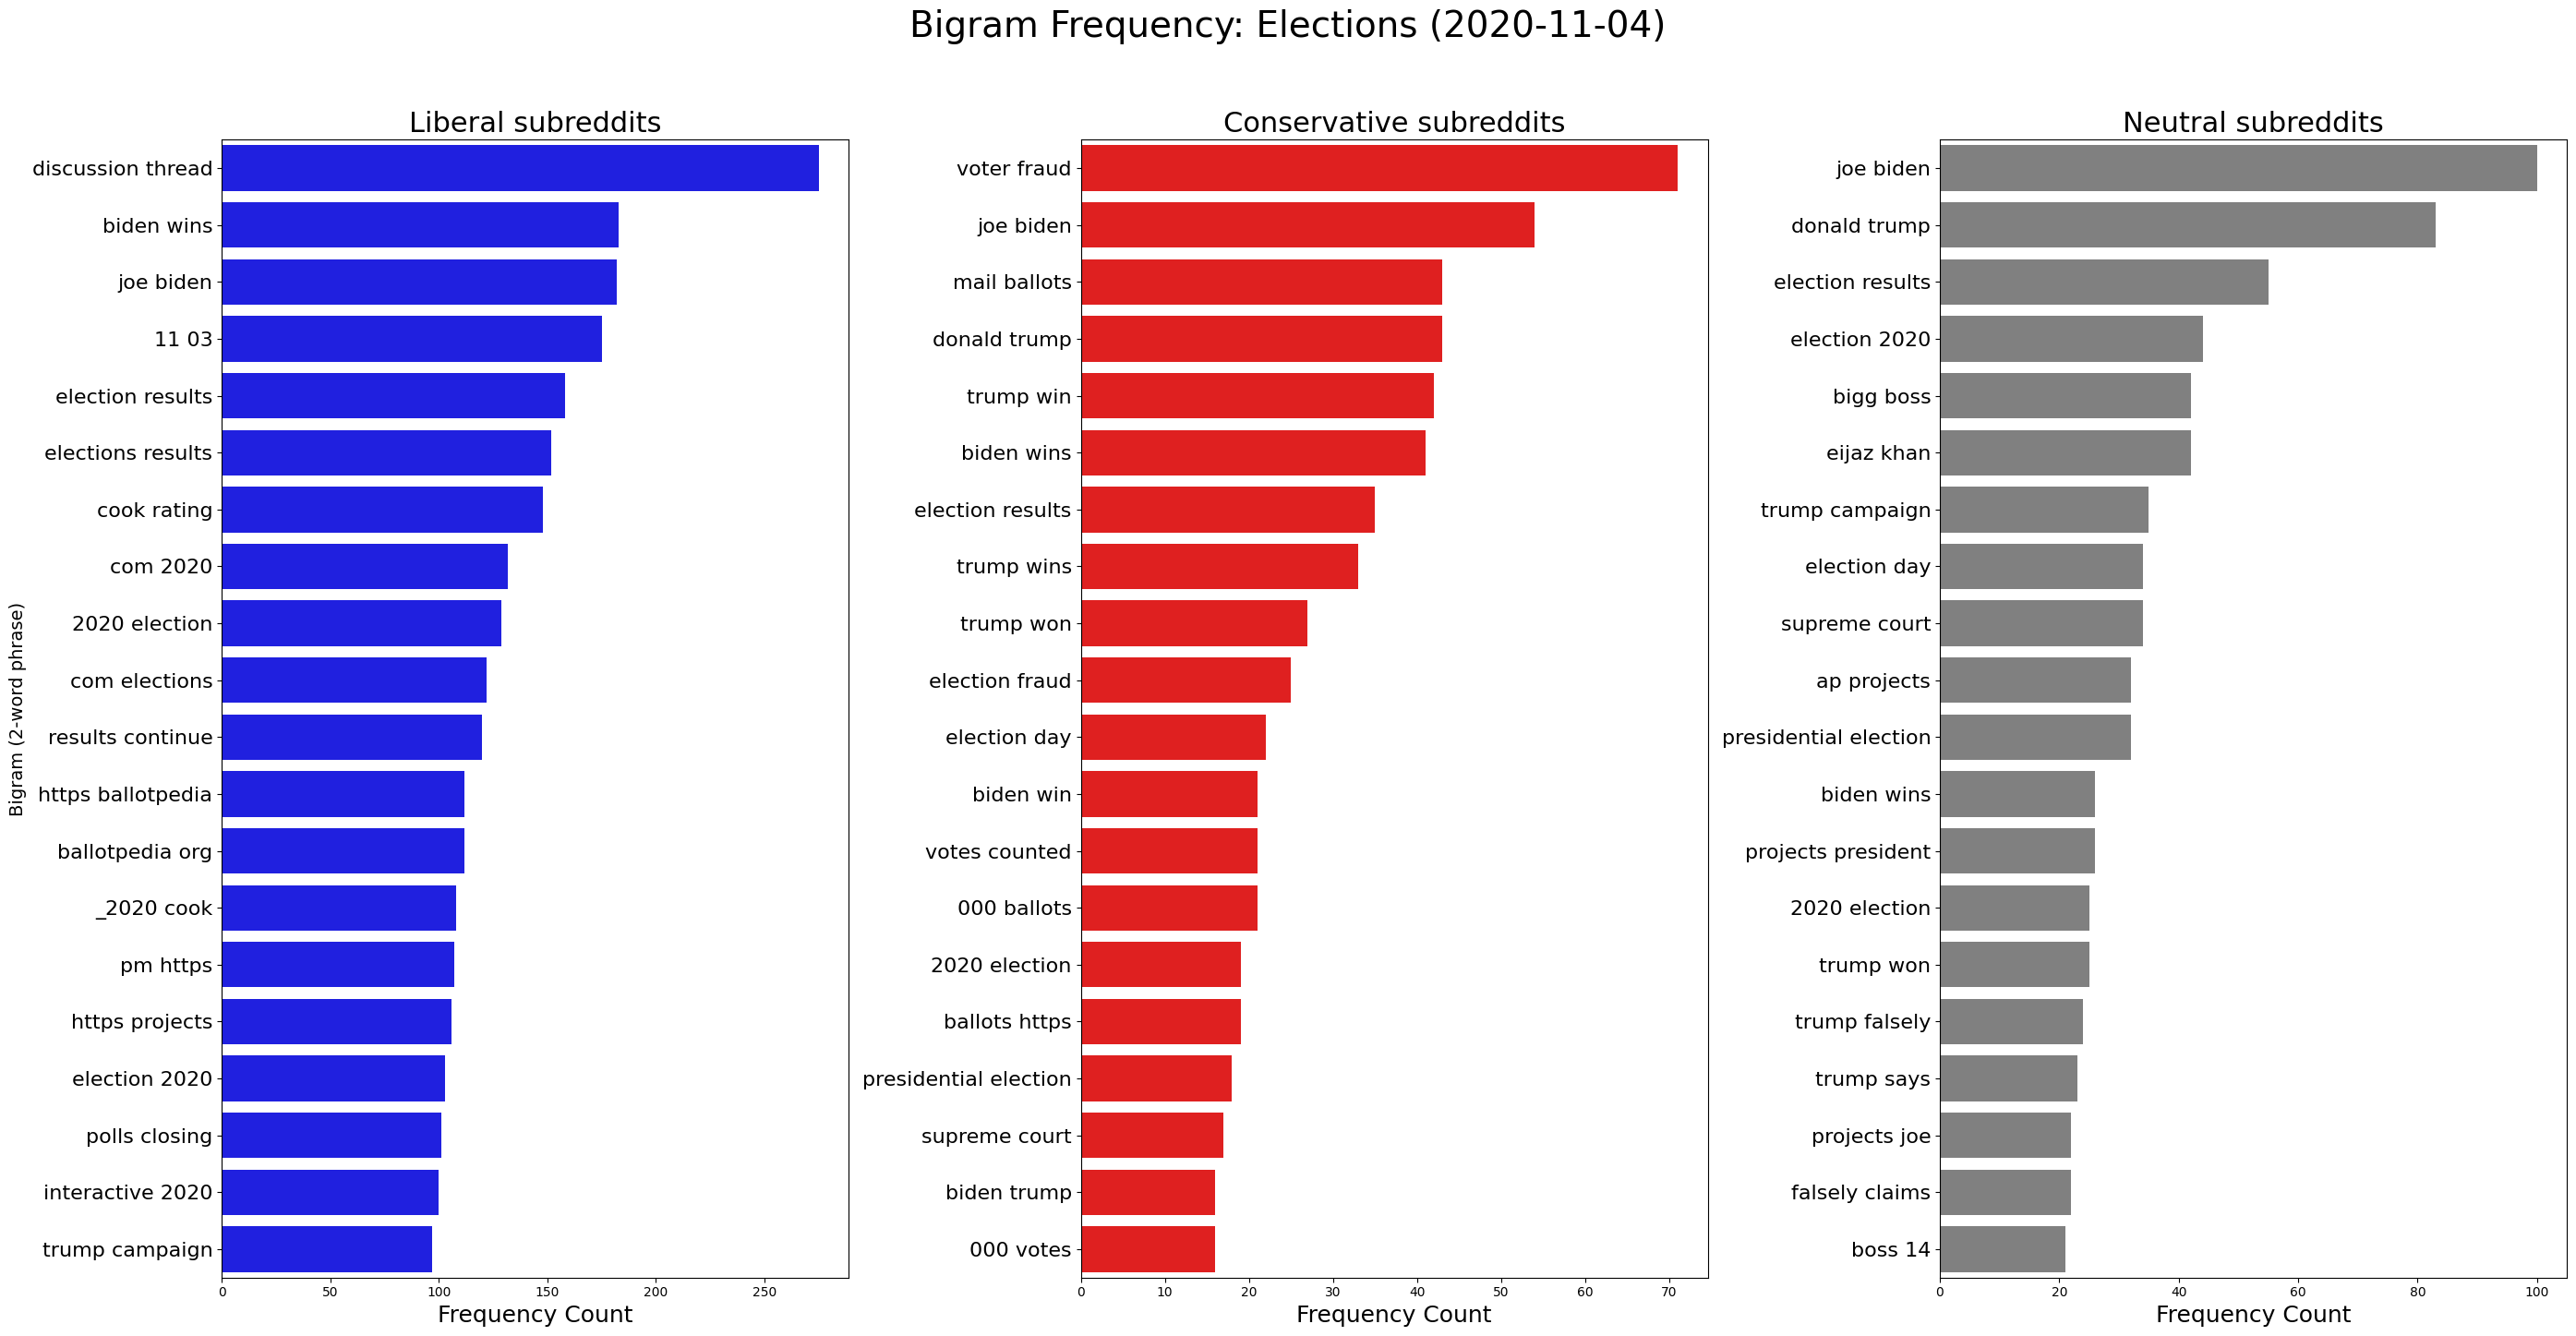

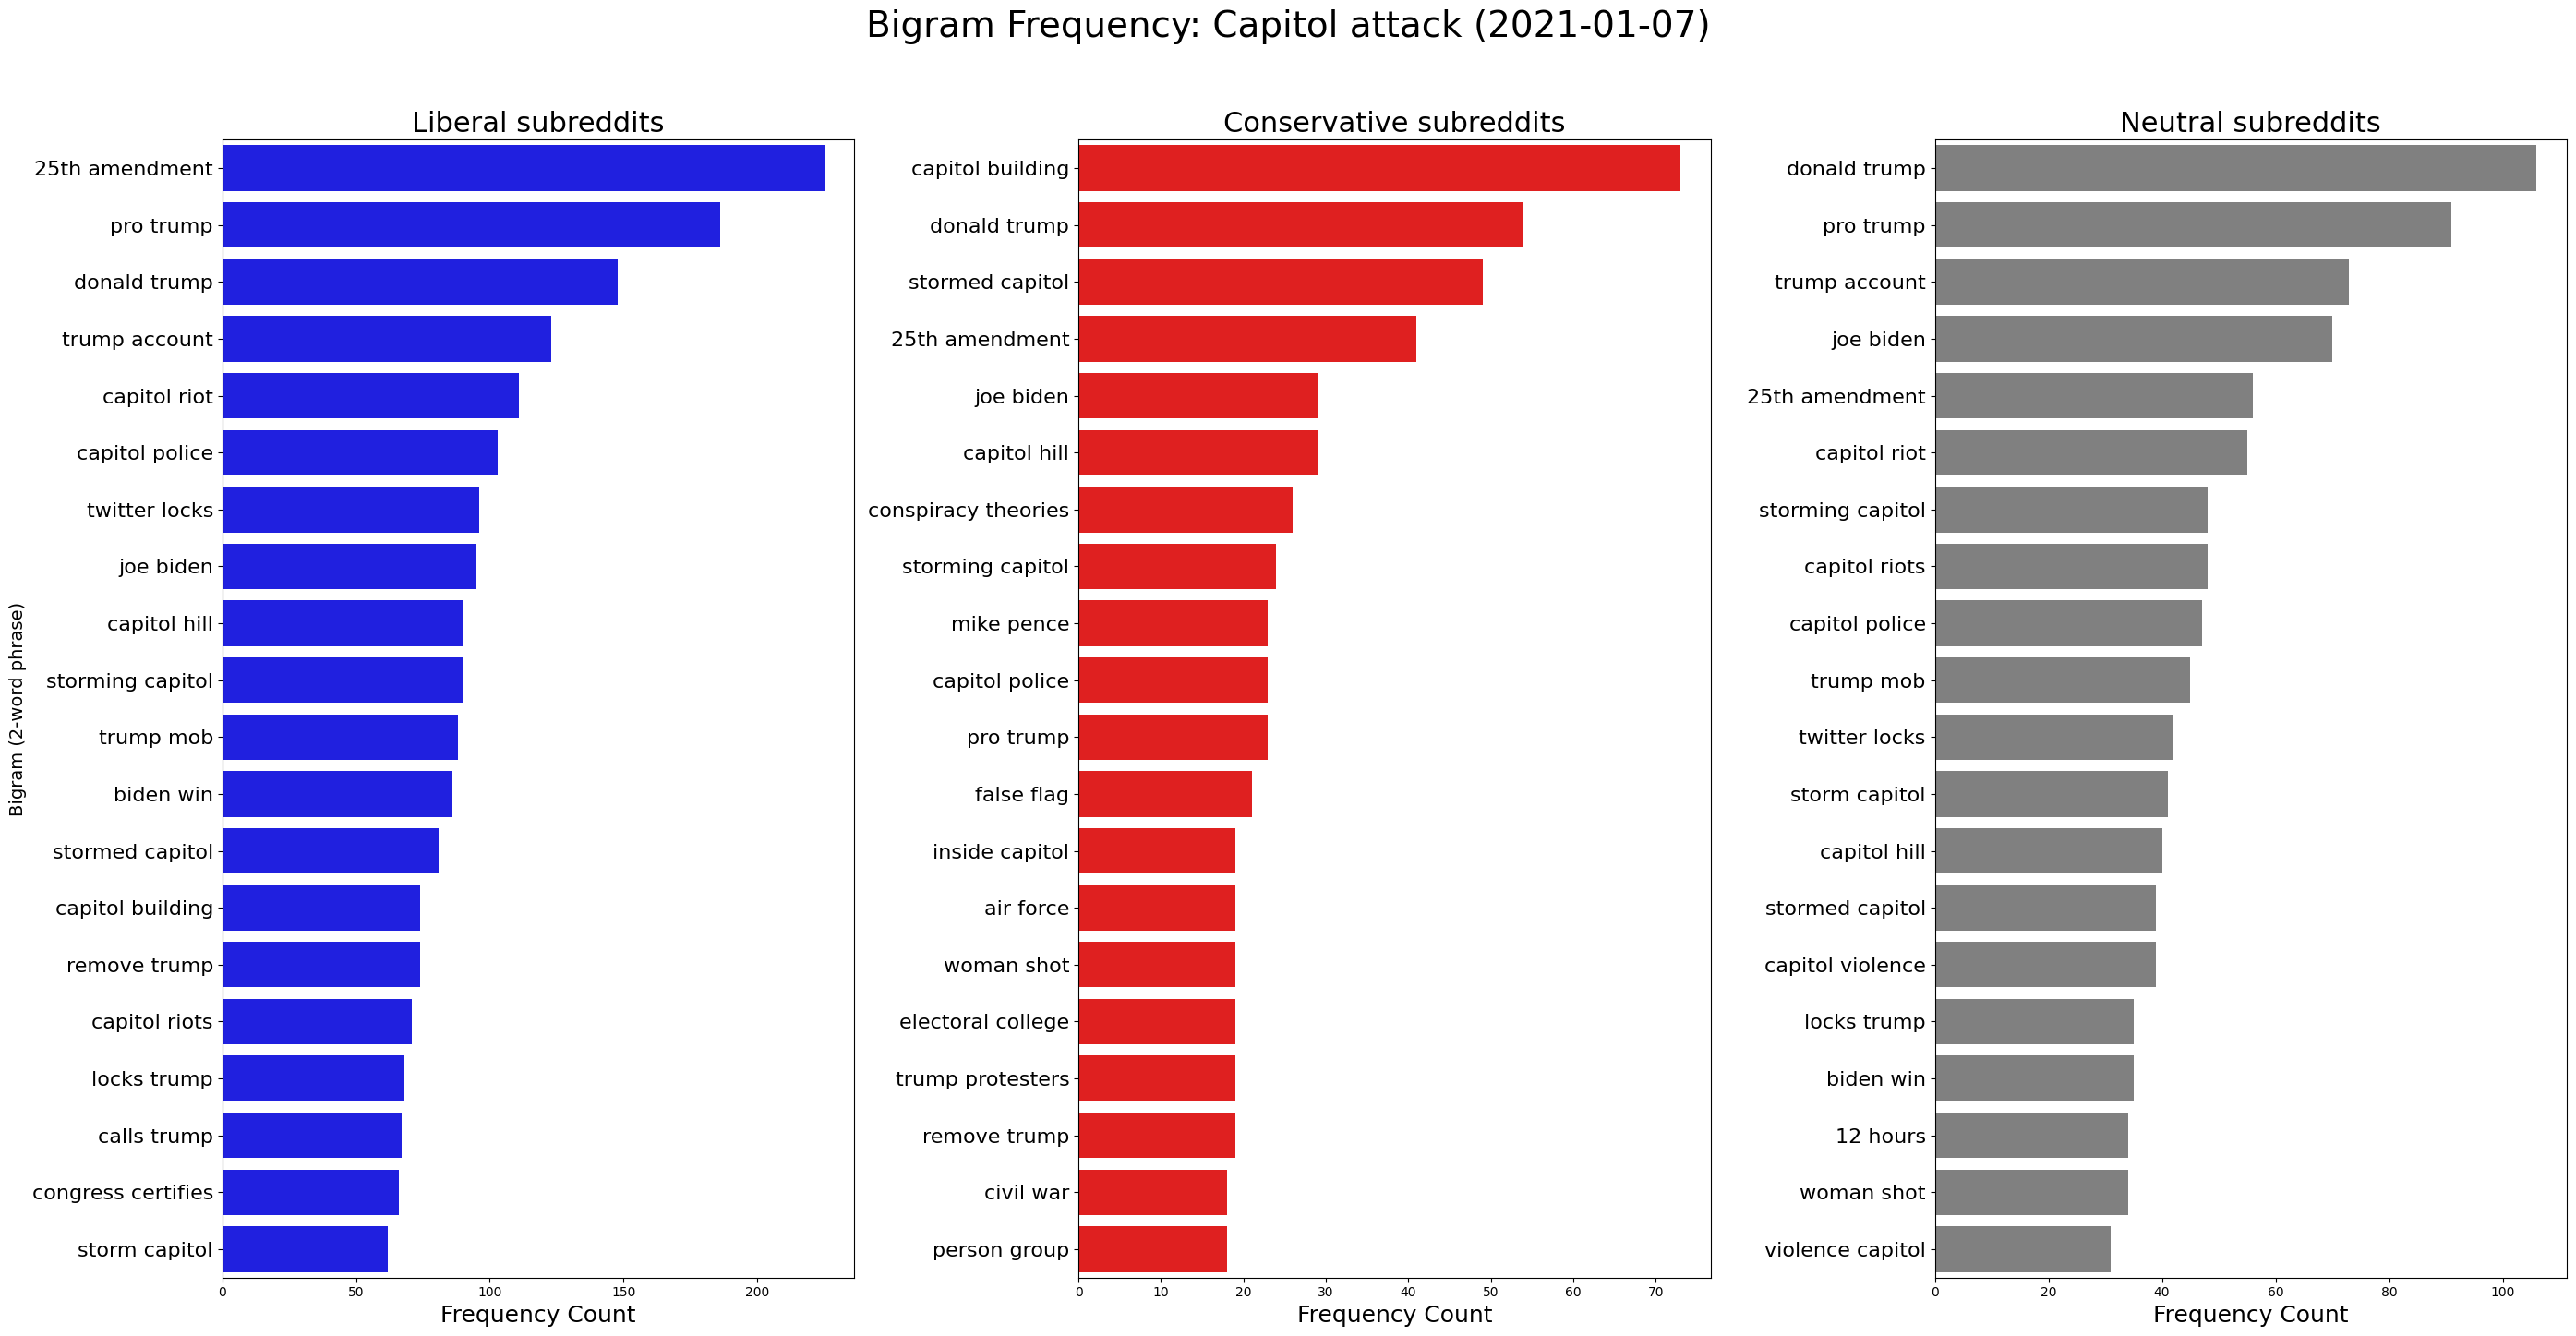

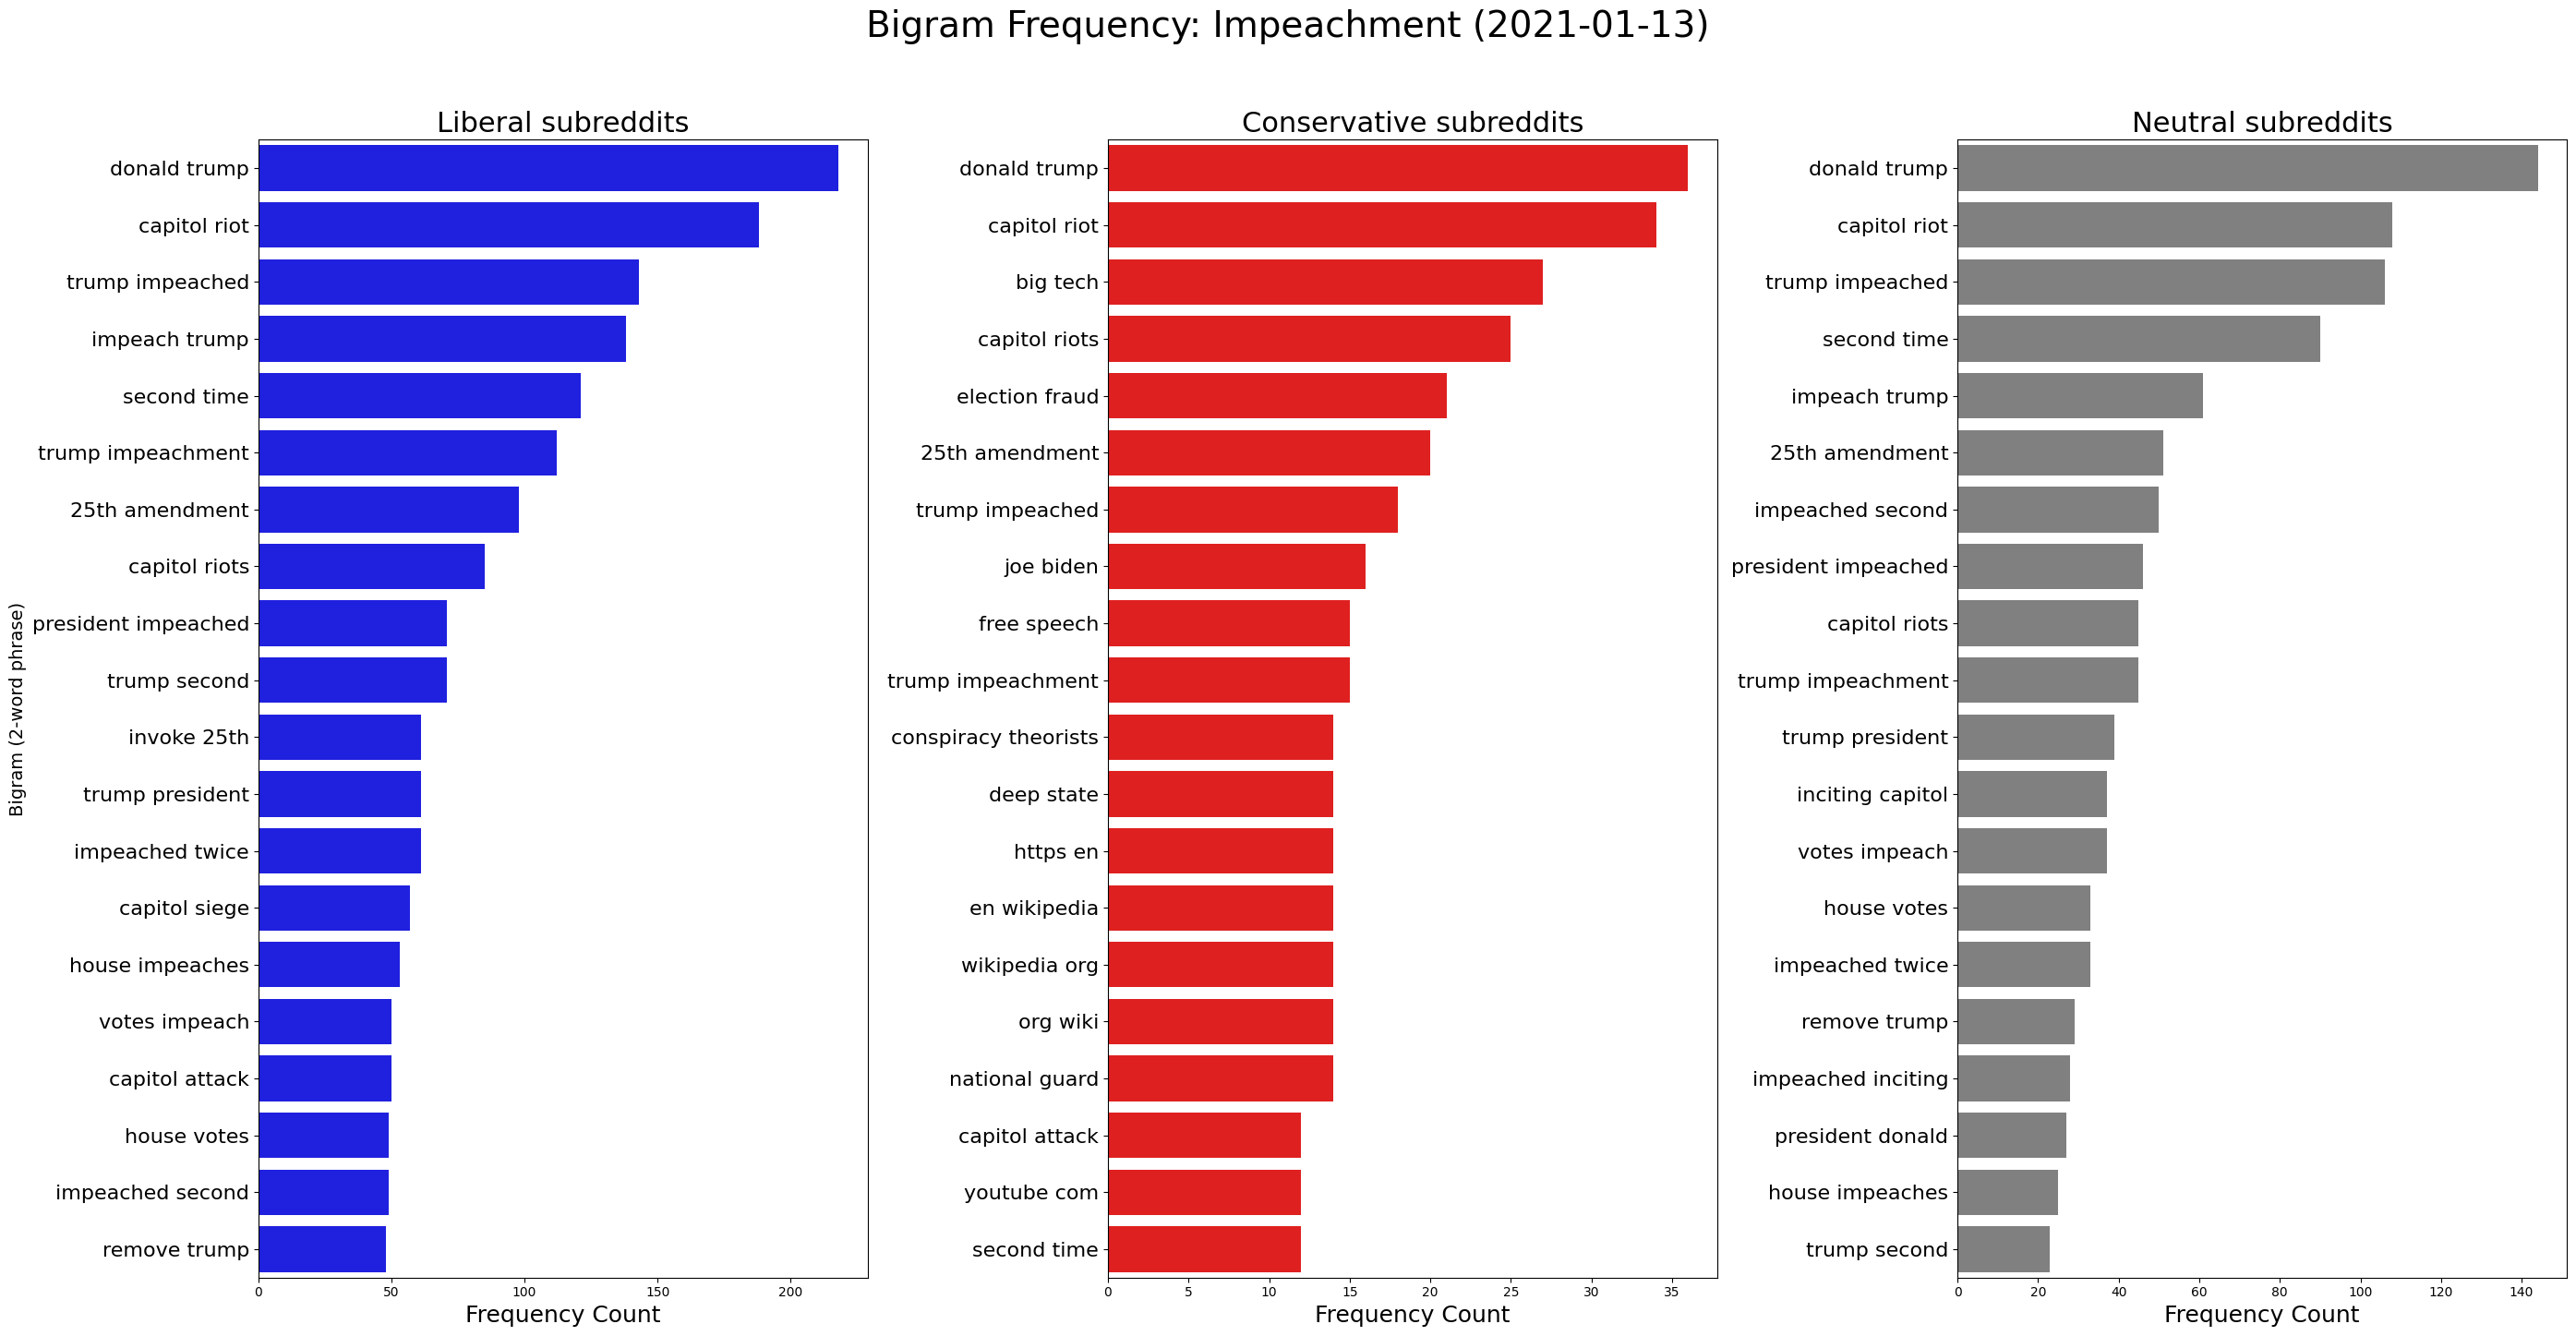

In [ ]:
df_subs['combined_text'] = df_subs['title'] + ' ' + df_subs['selftext']

MAIN_TITLE_TEXT = "Comparative Analysis of Top 20 Bigrams of titles of submissions in each political group:"
create_title_figure(MAIN_TITLE_TEXT)
print('\n' * 2)

for date_name, target_date in DATES.items():
    analyze_and_plot_comments_biagrams(df_subs, date_name, target_date, 'combined_text')
    print('\n' * 2)

**This analysis of the titles of submissions highlights a significant divergence in political narratives and how they developed over time**

* Liberal Subreddits: The focus shifts from validating the election ("biden wins," "joe biden") to calling for immediate political consequences during the attack ("25th amendment," "pro trump") and finally to establishing accountability ("capitol riot," "trump impeached").

* Conservative Subreddits: The narrative begins by contesting the election ("voter fraud," "trump win"). This shifts to a more descriptive focus on the event during the attack ("capitol building," "stormed capitol"), and finally converges on the central figure and event during the impeachment ("donald trump," "capitol riot").

* Neutral Subreddits: This group's titles consistently focus on the key individuals involved. The focus starts with "joe biden" and "donald trump" (Elections), narrows to "donald trump" and "pro trump" (Capitol Attack), and solidifies around "donald trump" and "capitol riot" (Impeachment).






**2. Sentiment analysis**

Here we are analyzing the sentiment of the content to answer the question of what emotional response different groups have to these events.

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon') #--------- uncomment to download sentiment data
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    if pd.isna(text) or text is None:
        return 0.0
    text = str(text)
    scores = sid.polarity_scores(text)
    return scores['compound']

def get_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
events_date = [
    pd.to_datetime('2021-01-07').date(),
    pd.to_datetime('2020-11-04').date(),
    pd.to_datetime('2021-01-13').date()
]
df_subs_prepared = df_subs[df_subs['time_created'].dt.date.isin(events_date)].copy()
df_coms_prepared = df_coms[df_coms['time_created'].dt.date.isin(events_date)].copy()

In [ ]:
#!pip install swifter
import swifter

df_coms_prepared['sentiment_score'] = df_coms_prepared['text'].swifter.apply(analyze_sentiment)
df_coms_prepared['sentiment_label'] = df_coms_prepared['sentiment_score'].swifter.apply(get_sentiment_label)
df_subs_prepared['combined_text'] = df_subs_prepared['title'] + ' ' + df_subs_prepared['selftext']

df_subs_prepared['sentiment_score'] = df_subs_prepared['combined_text'].swifter.apply(analyze_sentiment)
df_subs_prepared['sentiment_label'] = df_subs_prepared['sentiment_score'].swifter.apply(get_sentiment_label)

Pandas Apply:   0%|          | 0/443801 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/443801 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/14730 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/14730 [00:00<?, ?it/s]

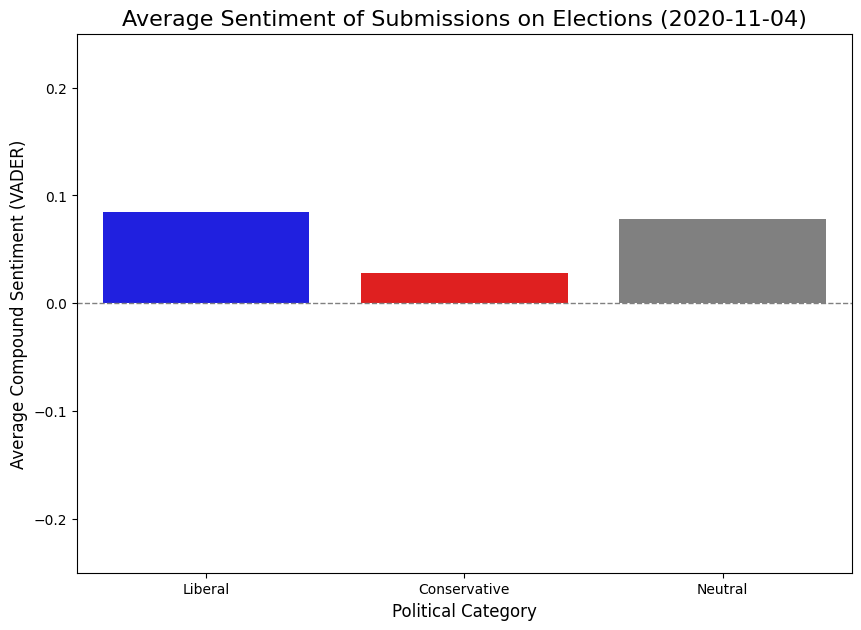

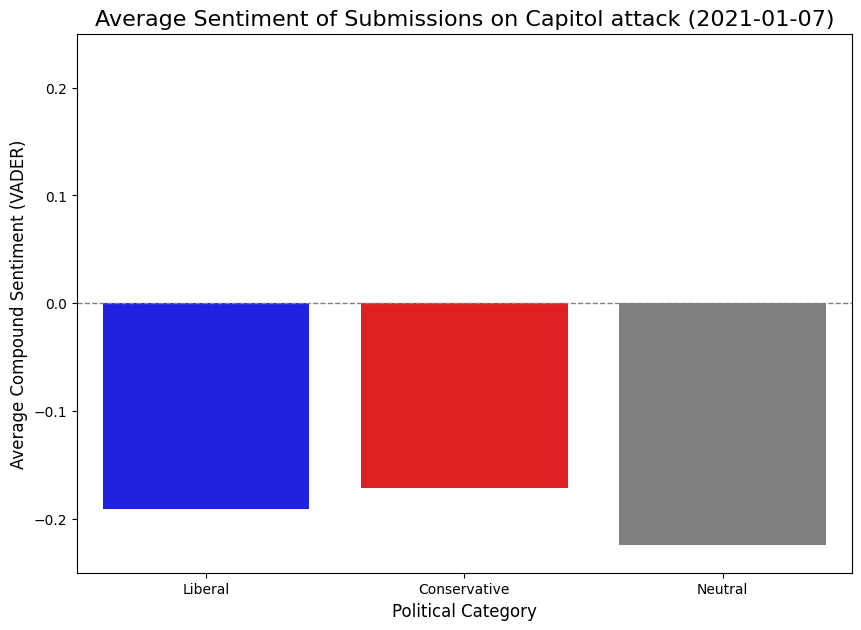

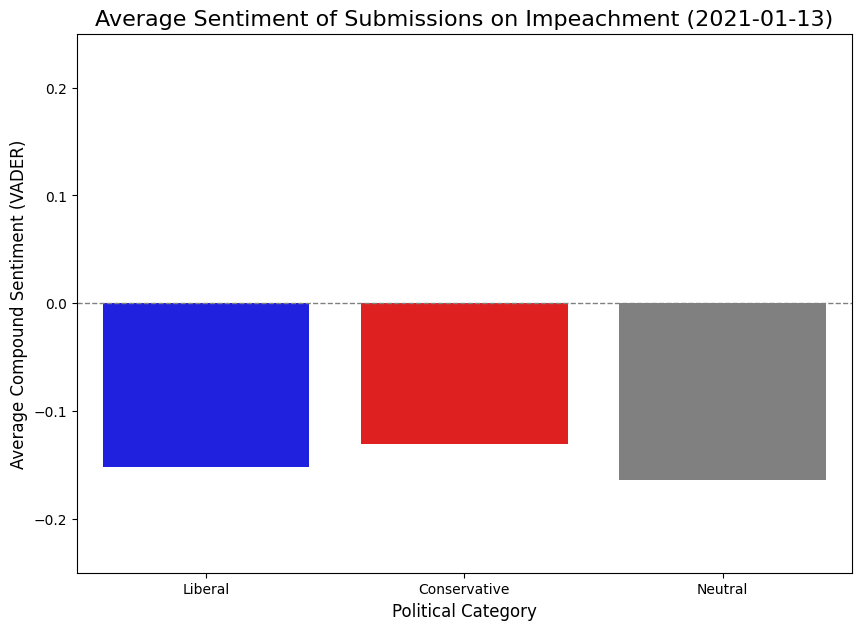

In [ ]:
def plot_average_sentiment(df, df_name, date_name, target_date):
    df_date_data = df[df['time_created'].dt.date == target_date].copy()
    sentiment_results = {}
    for category, subreddits in SUBREDDIT_MAP.items():
        df_cat = df_date_data[df_date_data['subreddit'].isin(subreddits)]
        avg_sentiment = df_cat['sentiment_score'].mean()
        sentiment_results[category] = avg_sentiment
    df_sentiment_summary = pd.DataFrame(
        sentiment_results.items(),
        columns=['Category', 'Average Sentiment Score']
    )
    COLOR_MAP = {'Liberal': 'blue', 'Conservative': 'red', 'Neutral': 'grey'}
    plt.figure(figsize=(10, 7))
    sns.barplot(data=df_sentiment_summary, x='Category', y='Average Sentiment Score',
                palette=[COLOR_MAP[cat] for cat in df_sentiment_summary['Category']])
    plt.title(f'Average Sentiment of {df_name} on {date_name} ({target_date})', fontsize=16)
    plt.ylabel('Average Compound Sentiment (VADER)', fontsize=12)
    plt.xlabel('Political Category', fontsize=12)
    plt.ylim(-0.25, 0.25)
    plt.axhline(0, color='grey', linestyle='--', linewidth=1)
    plt.show()
for date_name, target_date in DATES.items():
    plot_average_sentiment(df_subs_prepared, "Submissions", date_name, target_date)
    print('\n' * 2)

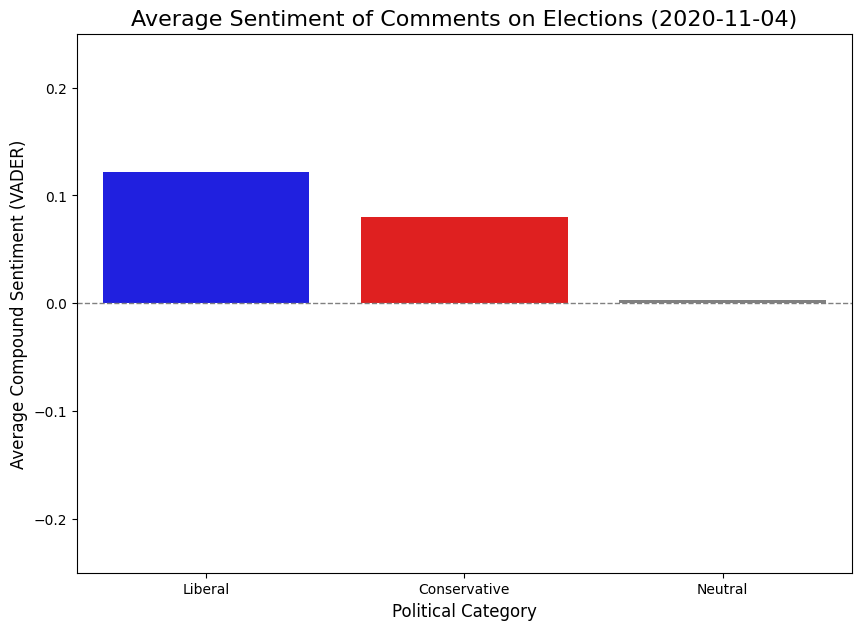

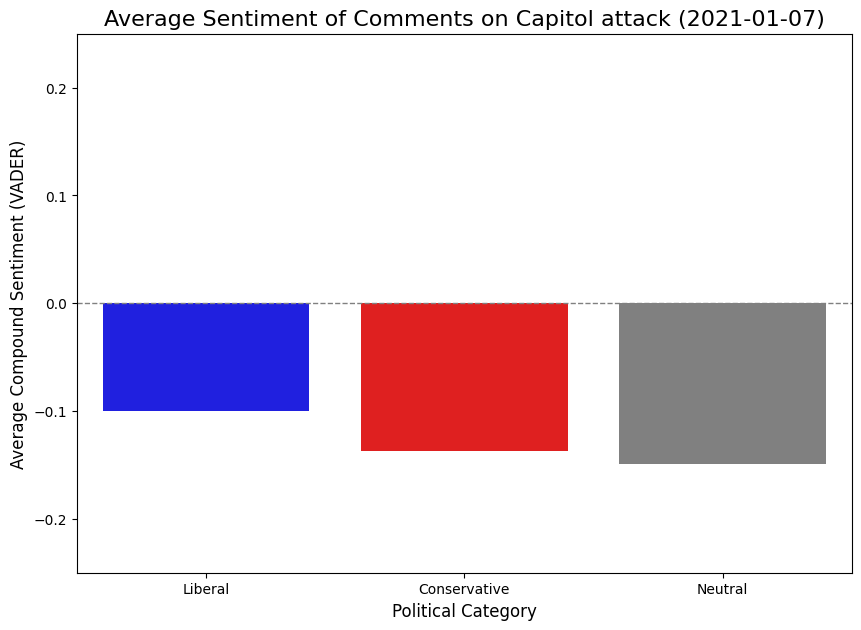

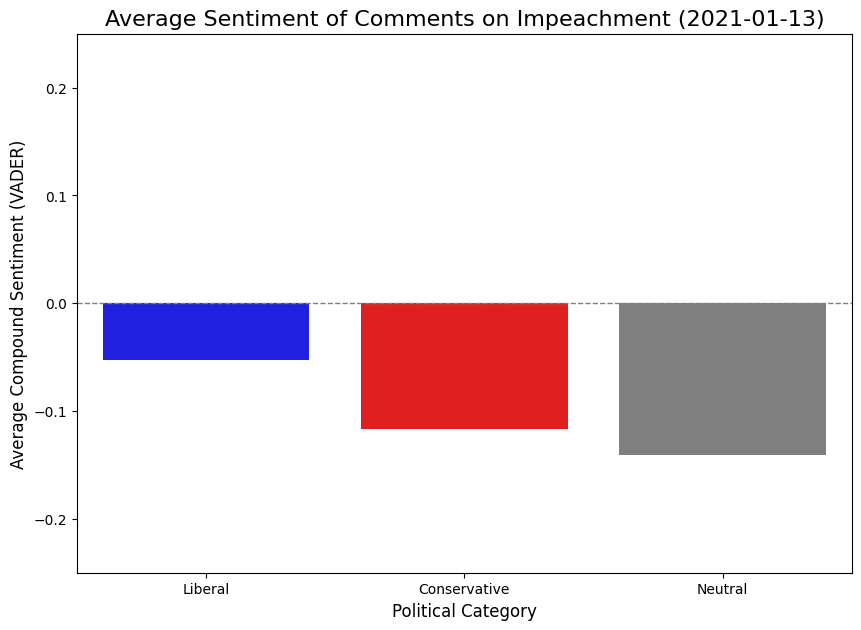

In [ ]:
for date_name, target_date in DATES.items():
    plot_average_sentiment(df_coms_prepared, "Comments", date_name, target_date)
    print('\n' * 2)

But we need more context to find what the sentiment was related to. We can get this by analyzing bigrams.

In [ ]:
def analyze_and_plot_bigram_sentiment(df, df_name, date_name, target_date, text_col):
    df_date_data = df[df['time_created'].dt.date == target_date].copy()
    fig, axes = plt.subplots(1, 3, figsize=(28, 14))
    fig.suptitle(f'Bigram Sentiment Analysis: {df_name} on {date_name} ({target_date})',
                 fontsize=28, y=1.03)
    COLOR_MAP = {'Liberal': 'blue', 'Conservative': 'red', 'Neutral': 'grey'}

    for i, (category, subreddits) in enumerate(SUBREDDIT_MAP.items()):
        ax = axes[i]
        category_text = df_date_data[df_date_data['subreddit'].isin(subreddits)][text_col]
        df_top_bigrams = get_top_bigrams(category_text, n=100)

        if not df_top_bigrams.empty:
            df_top_bigrams = df_top_bigrams[
                ~df_top_bigrams['Bigram'].str.contains(UNWANTED_BIGRAMS, regex=True, case=False)
            ].head(20).copy()

        sentiment_list = []
        for bigram in df_top_bigrams['Bigram']:
            df_containing_bigram = df_date_data[
                (df_date_data['subreddit'].isin(subreddits)) &
                (df_date_data[text_col].str.contains(bigram, case=False, na=False))
            ]
            avg_sentiment = df_containing_bigram['sentiment_score'].mean()
            sentiment_list.append({'Bigram': bigram, 'Average Sentiment': avg_sentiment})

        df_sentiment_summary = pd.DataFrame(sentiment_list)
        if not df_sentiment_summary.empty:
            sns.barplot(data=df_sentiment_summary, x='Average Sentiment', y='Bigram',
                        ax=ax, color=COLOR_MAP[category])
            ax.set_title(f'{category} subreddits (Avg Sentiment)', fontsize=22)
            ax.axvline(0, color='grey', linestyle='--', linewidth=1)
            ax.set_xlim(-0.6, 0.6)
        else:
            ax.text(0.5, 0.5, 'No valid bigrams found.', ha='center', va='center', fontsize=14, color='gray')
            ax.set_title(f'{category} subreddits', fontsize=22)

        ax.set_xlabel('Average Sentiment Score (VADER)', fontsize=18)
        ax.set_ylabel('Bigram (2-word phrase)' if i == 0 else '', fontsize=14)
        ax.tick_params(axis='y', labelsize=16)

    plt.tight_layout()
    plt.show()

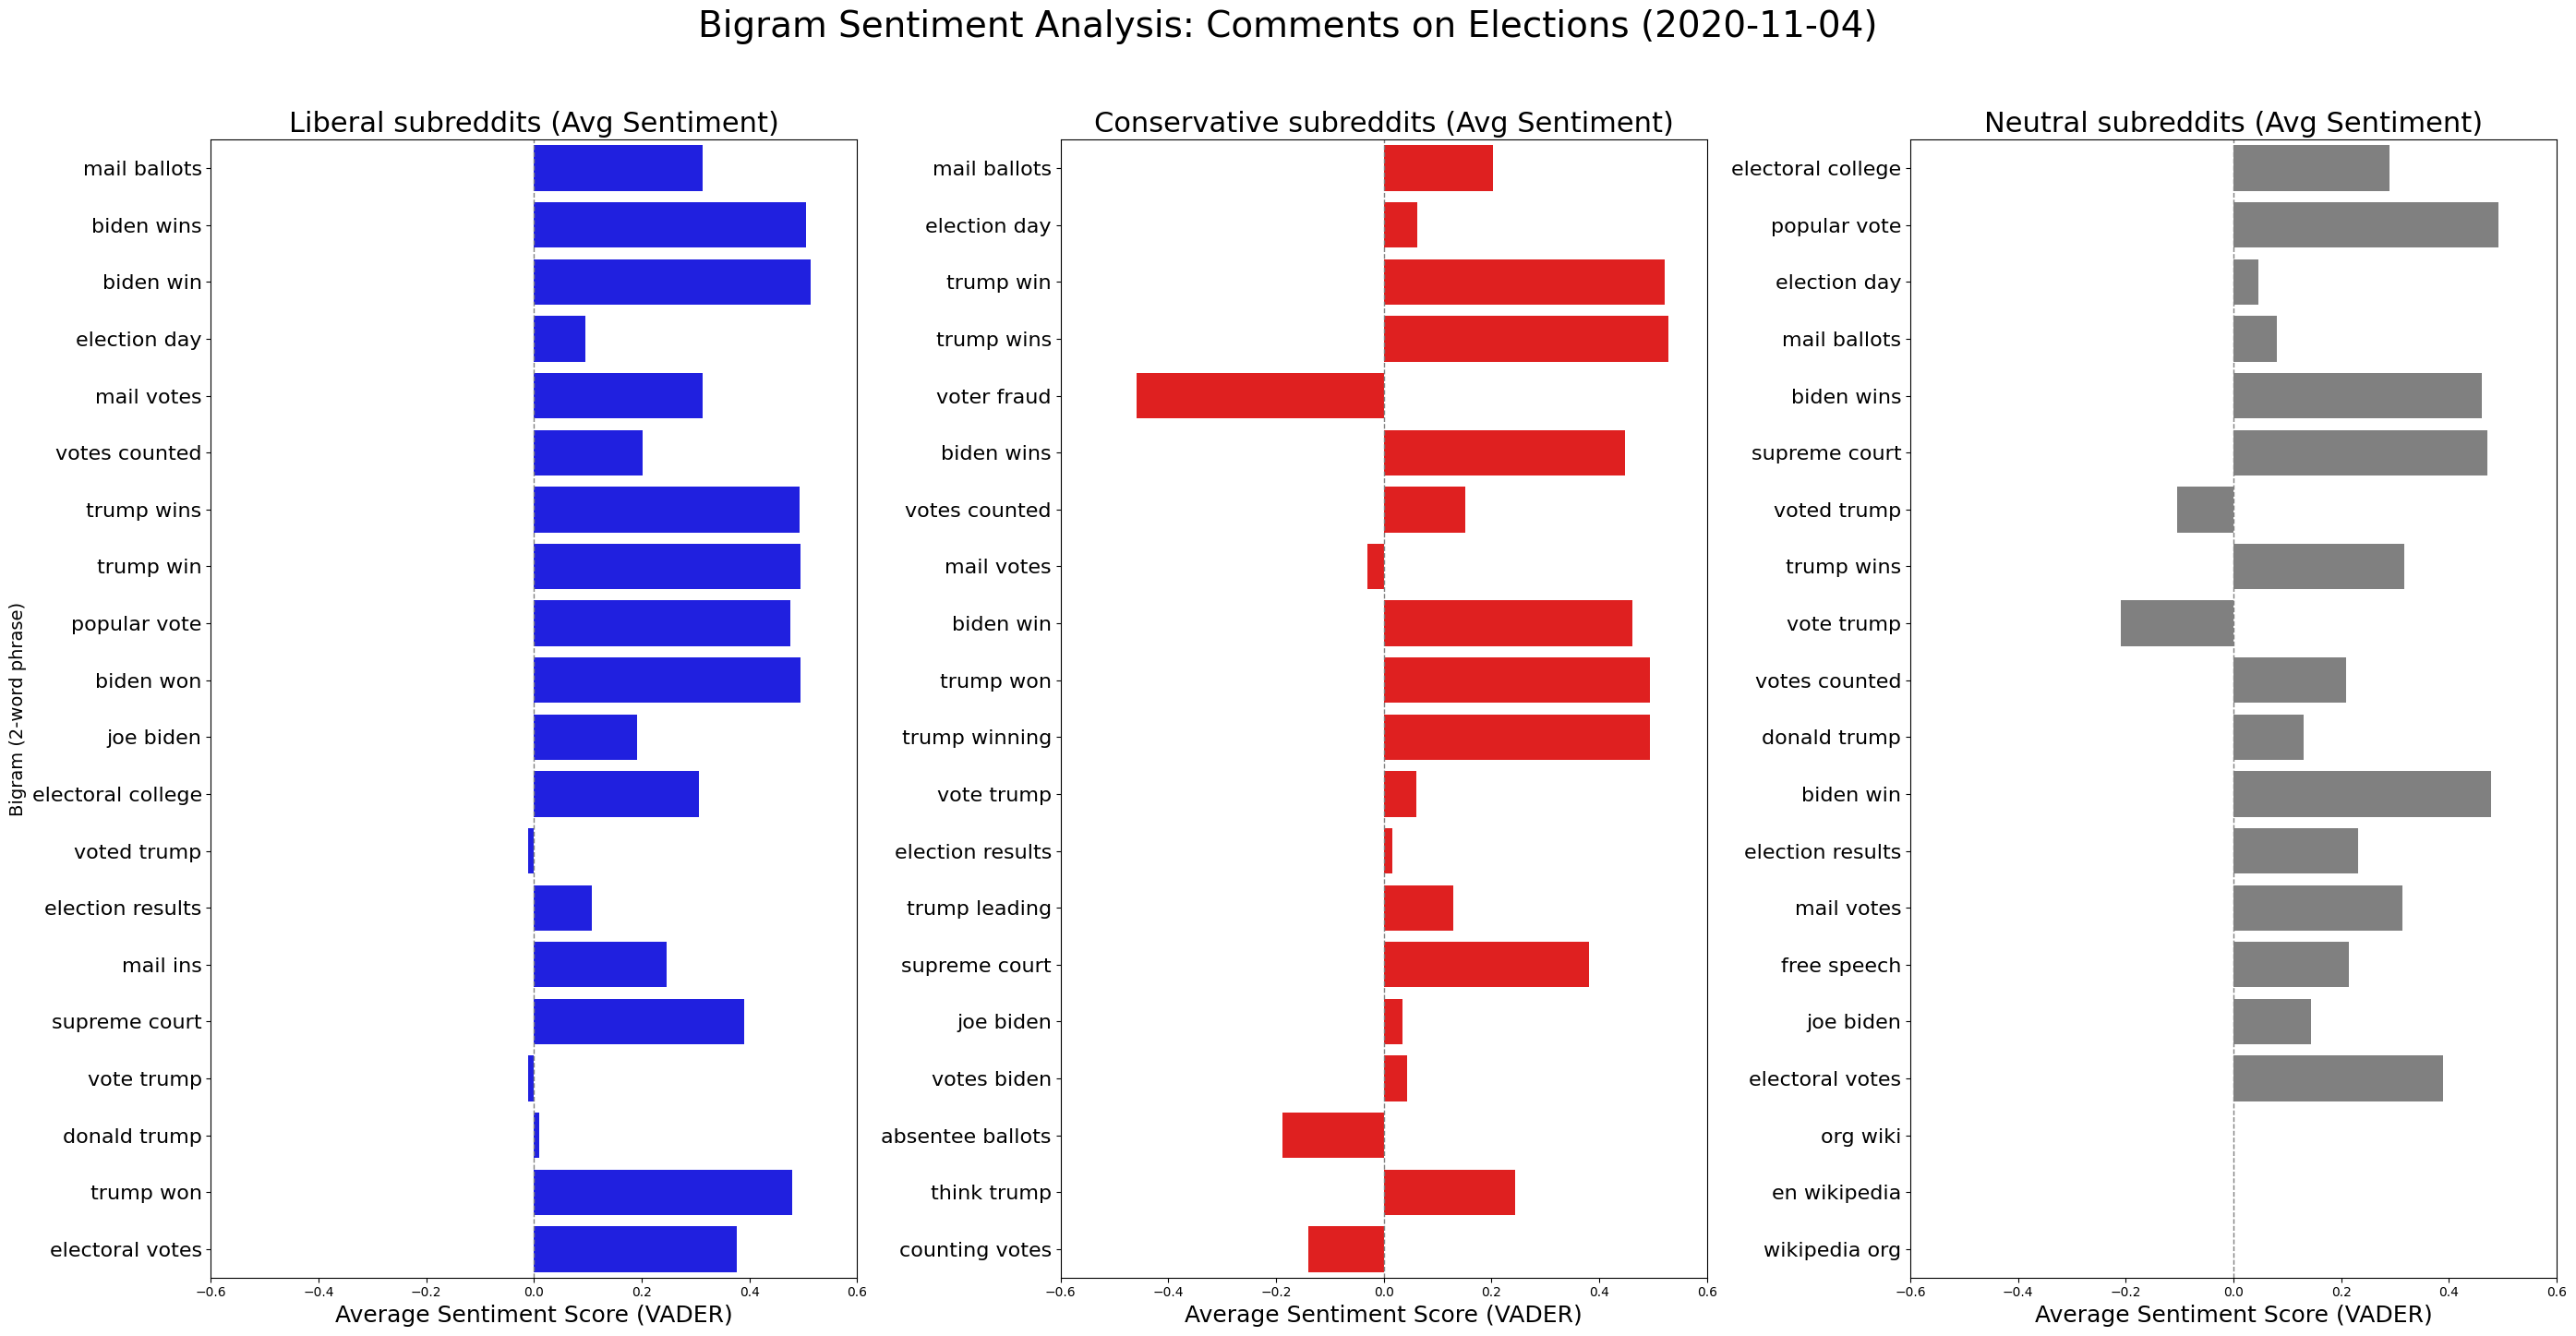

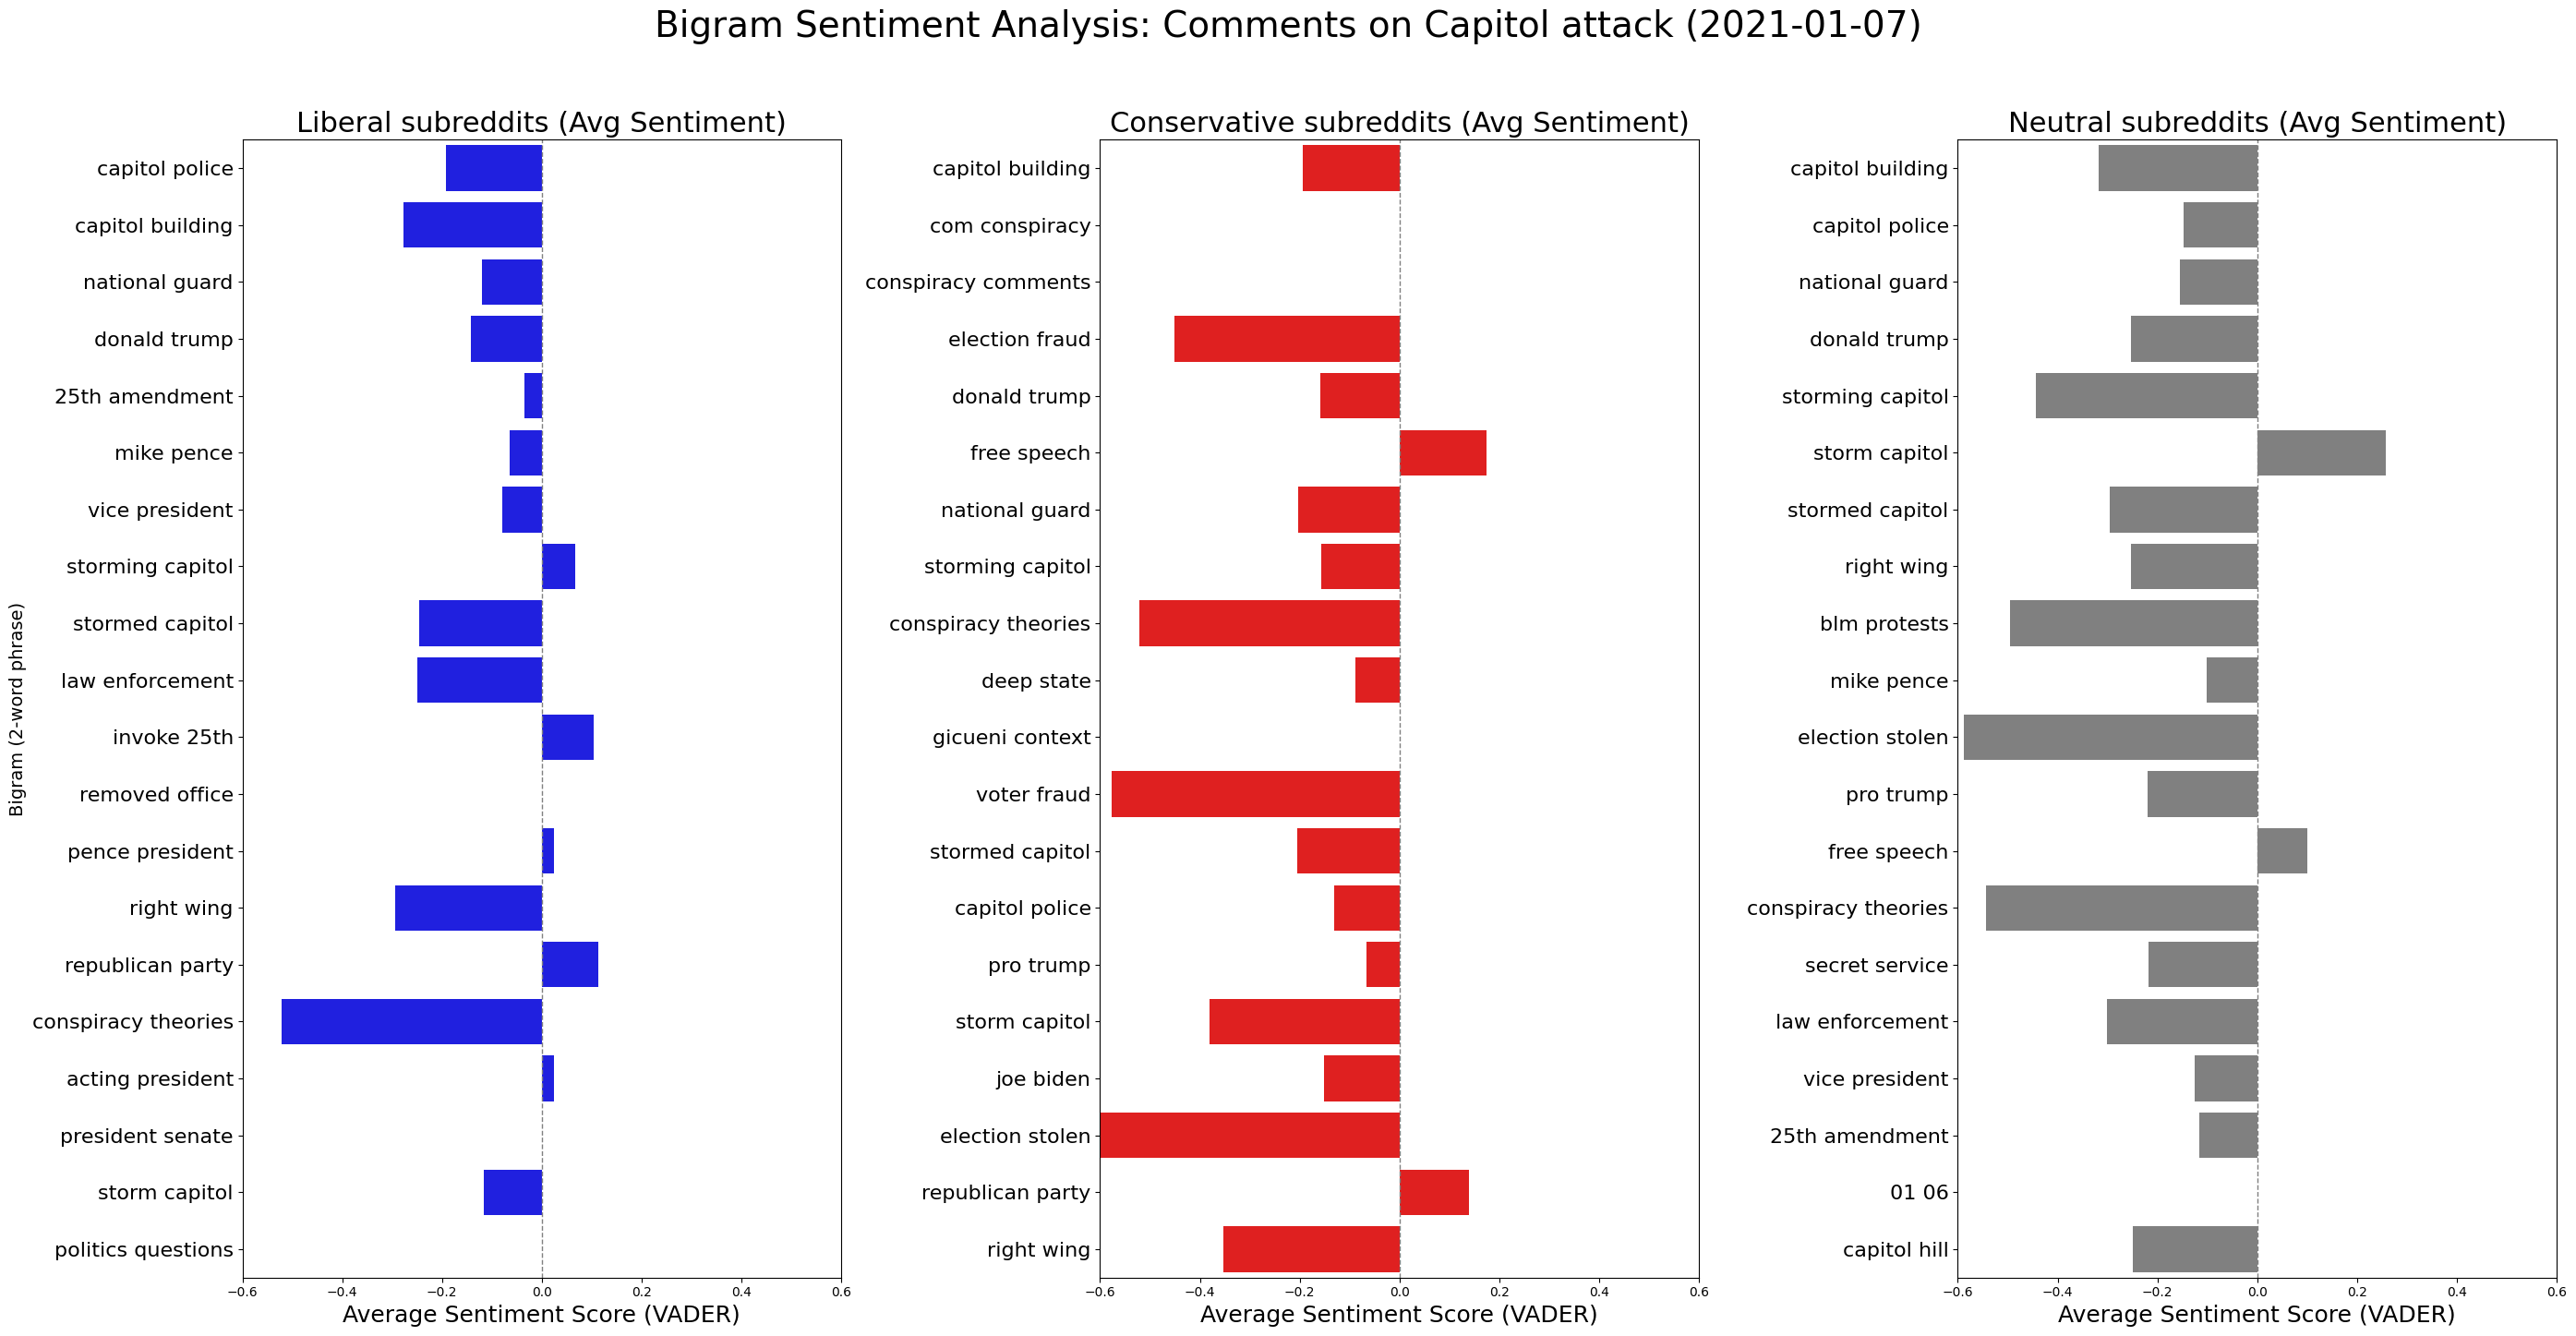

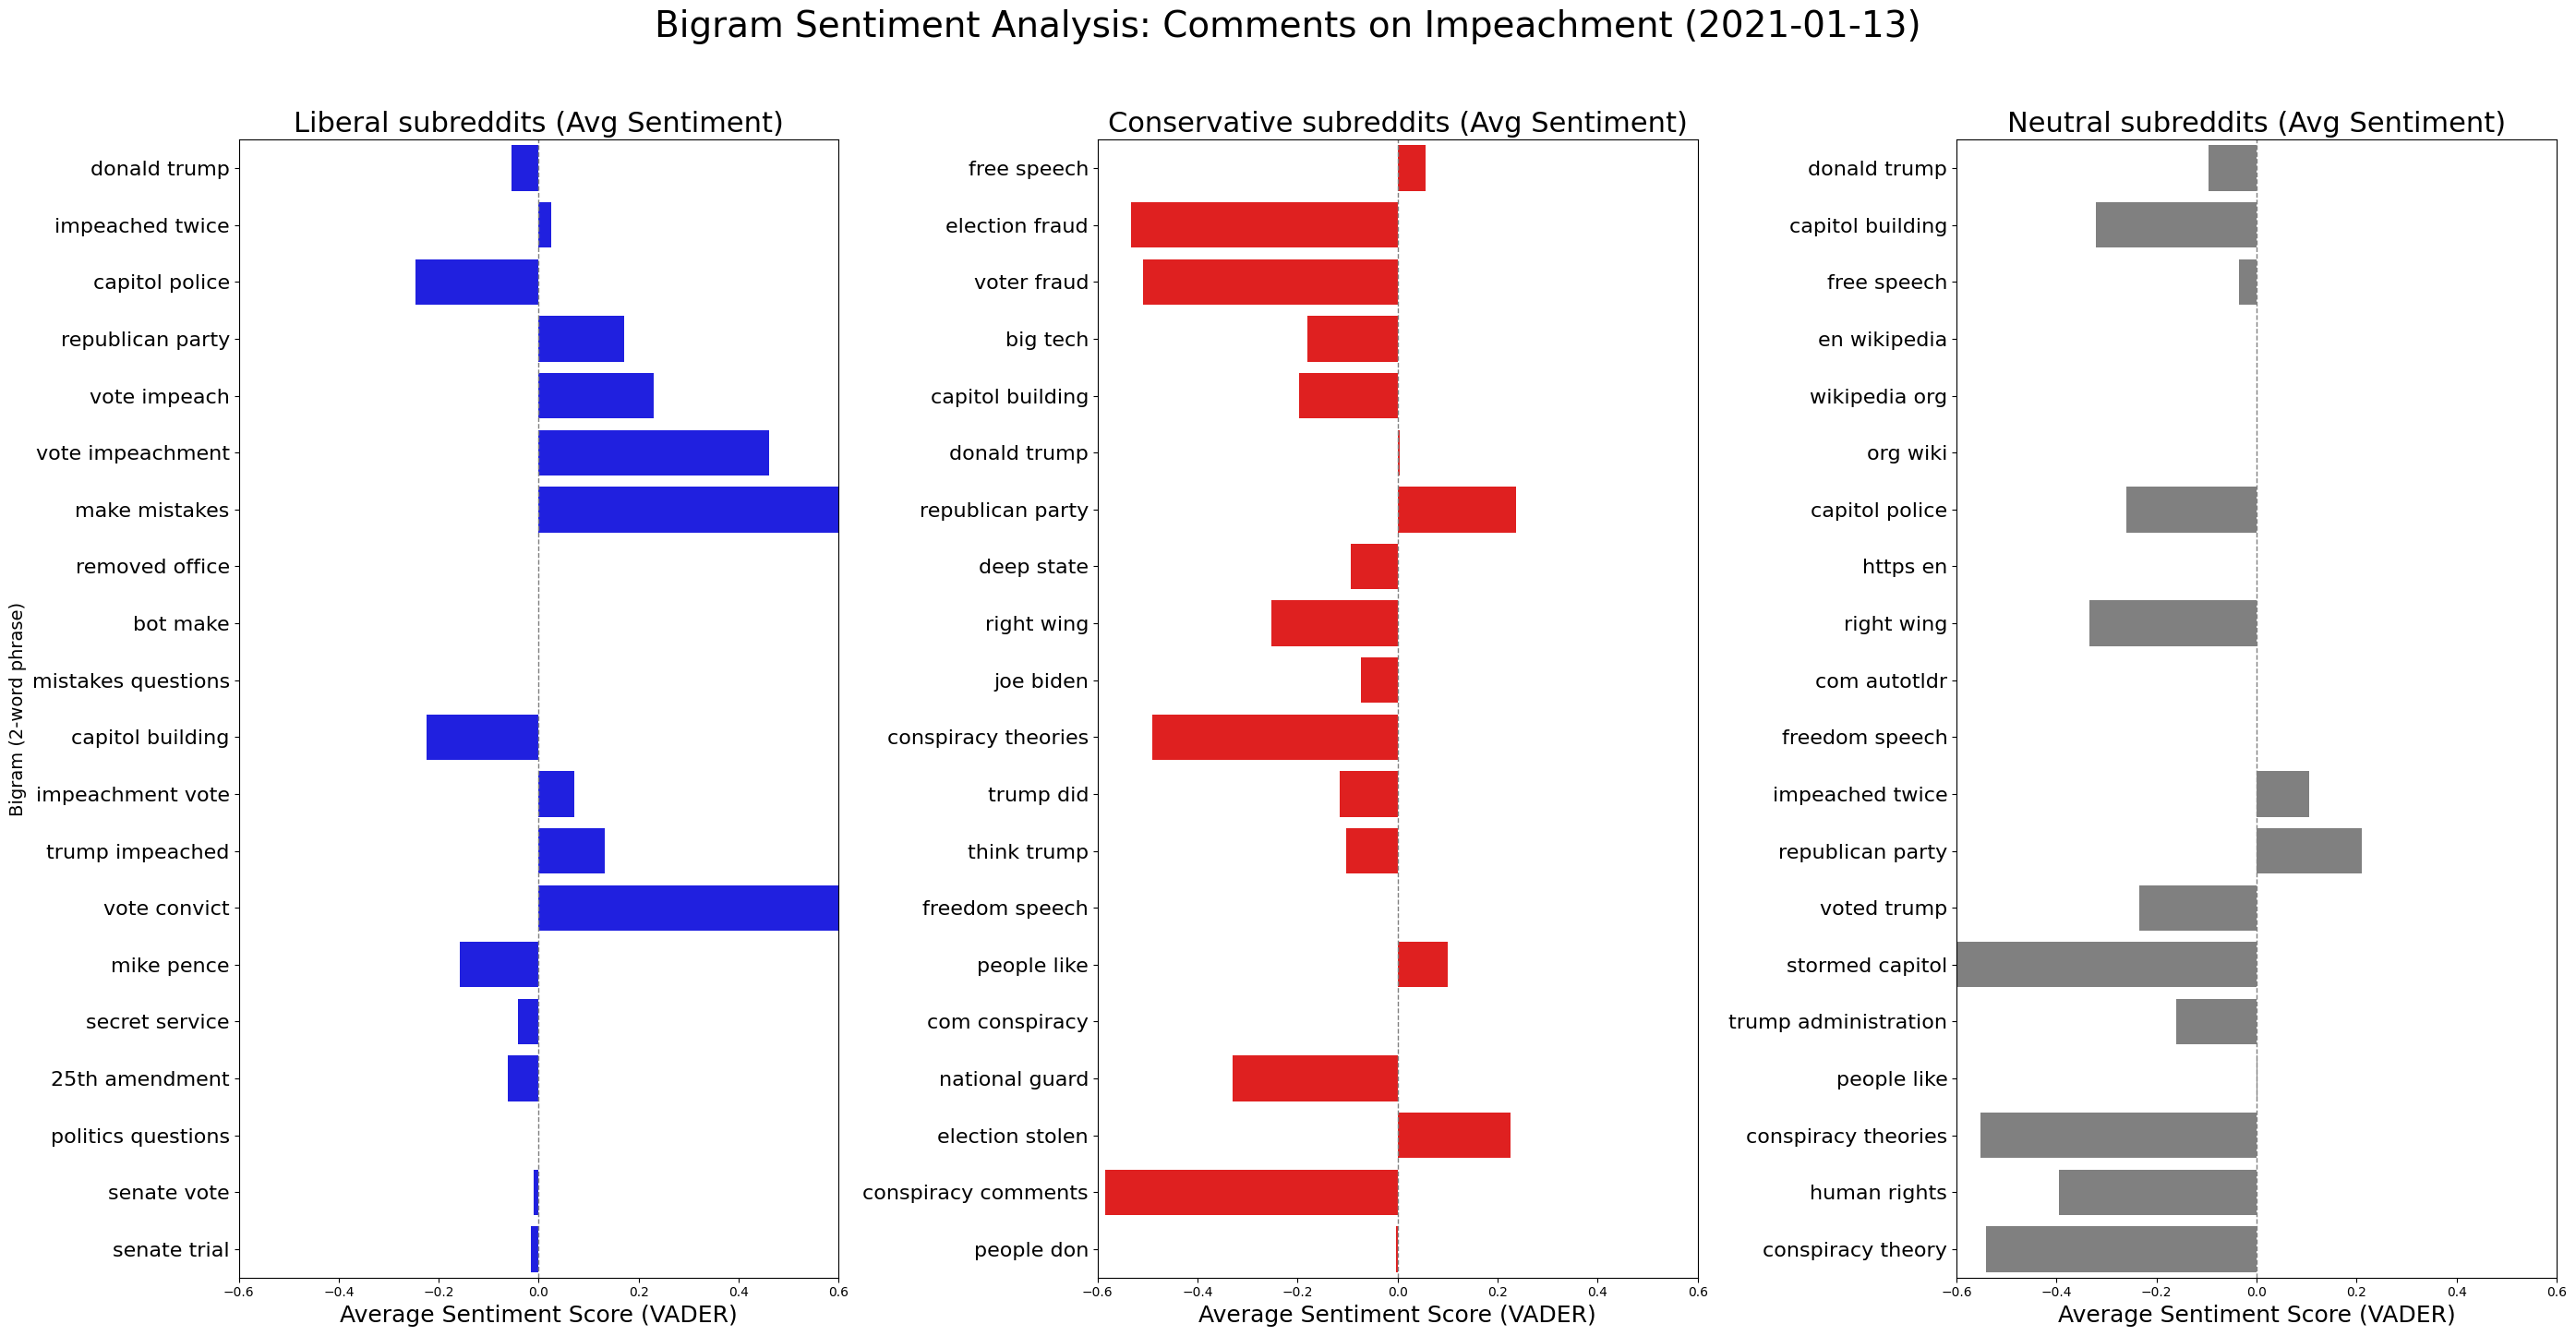

In [ ]:
for date_name, target_date in DATES.items():
    analyze_and_plot_bigram_sentiment(df_coms_prepared, "Comments", date_name, target_date, 'text')
    print('\n' * 2)

**Sentiment Conclusions: Comments**



**Elections (2020-11-04)**

* Liberal Group: Main sentiment was Positive (High). This was driven by phrases like "biden wins," "mail ballots," and "joe biden". The pattern was Affirmation of Outcome.

* Conservative Group: Sentiment was Positive (Low). It was conflicted, influenced positively by "trump winning" and "trump win," but negatively by "voter fraud". The pattern was Conflicted Hope.

* Neutral Group: Sentiment was Neutral. Key phrases included "electoral college," "popular vote," and "en wikipedia". The pattern was Factual Observation

**Capitol Attack (2021-01-07)**

* Liberal Group: Main sentiment was Negative (Medium). Drivers included "25th amendment," "capitol police," and "law enforcement". The pattern was institutional outrage.

* Conservative Group: Sentiment was Negative (High). It was driven by strong negative emotion around "election fraud," "conspiracy theories," and "deep state". The pattern was conspiracy driven deflection.

* Neutral Group: Sentiment was Negative (Medium). Key phrases were "storming capitol," "capitol building," and "mike pence". The pattern was event solemnity.

**Impeachment (2021-01-13)**

* Liberal Group: Main sentiment was Negative (Medium). The focus was on accountability using terms like "impeached twice," "vote convict," and "senate trial". The pattern was accountability demand.

* Conservative Group: Sentiment was Negative (High). The narrative shifted to defense using strongly negative-associated terms like "free speech" and "big tech". The pattern was ideological reframing.

* Neutral Group: Sentiment was Negative (Low). Key terms included "donald trump," "impeached twice," and procedural references. The pattern was focusing on reporting the political process.


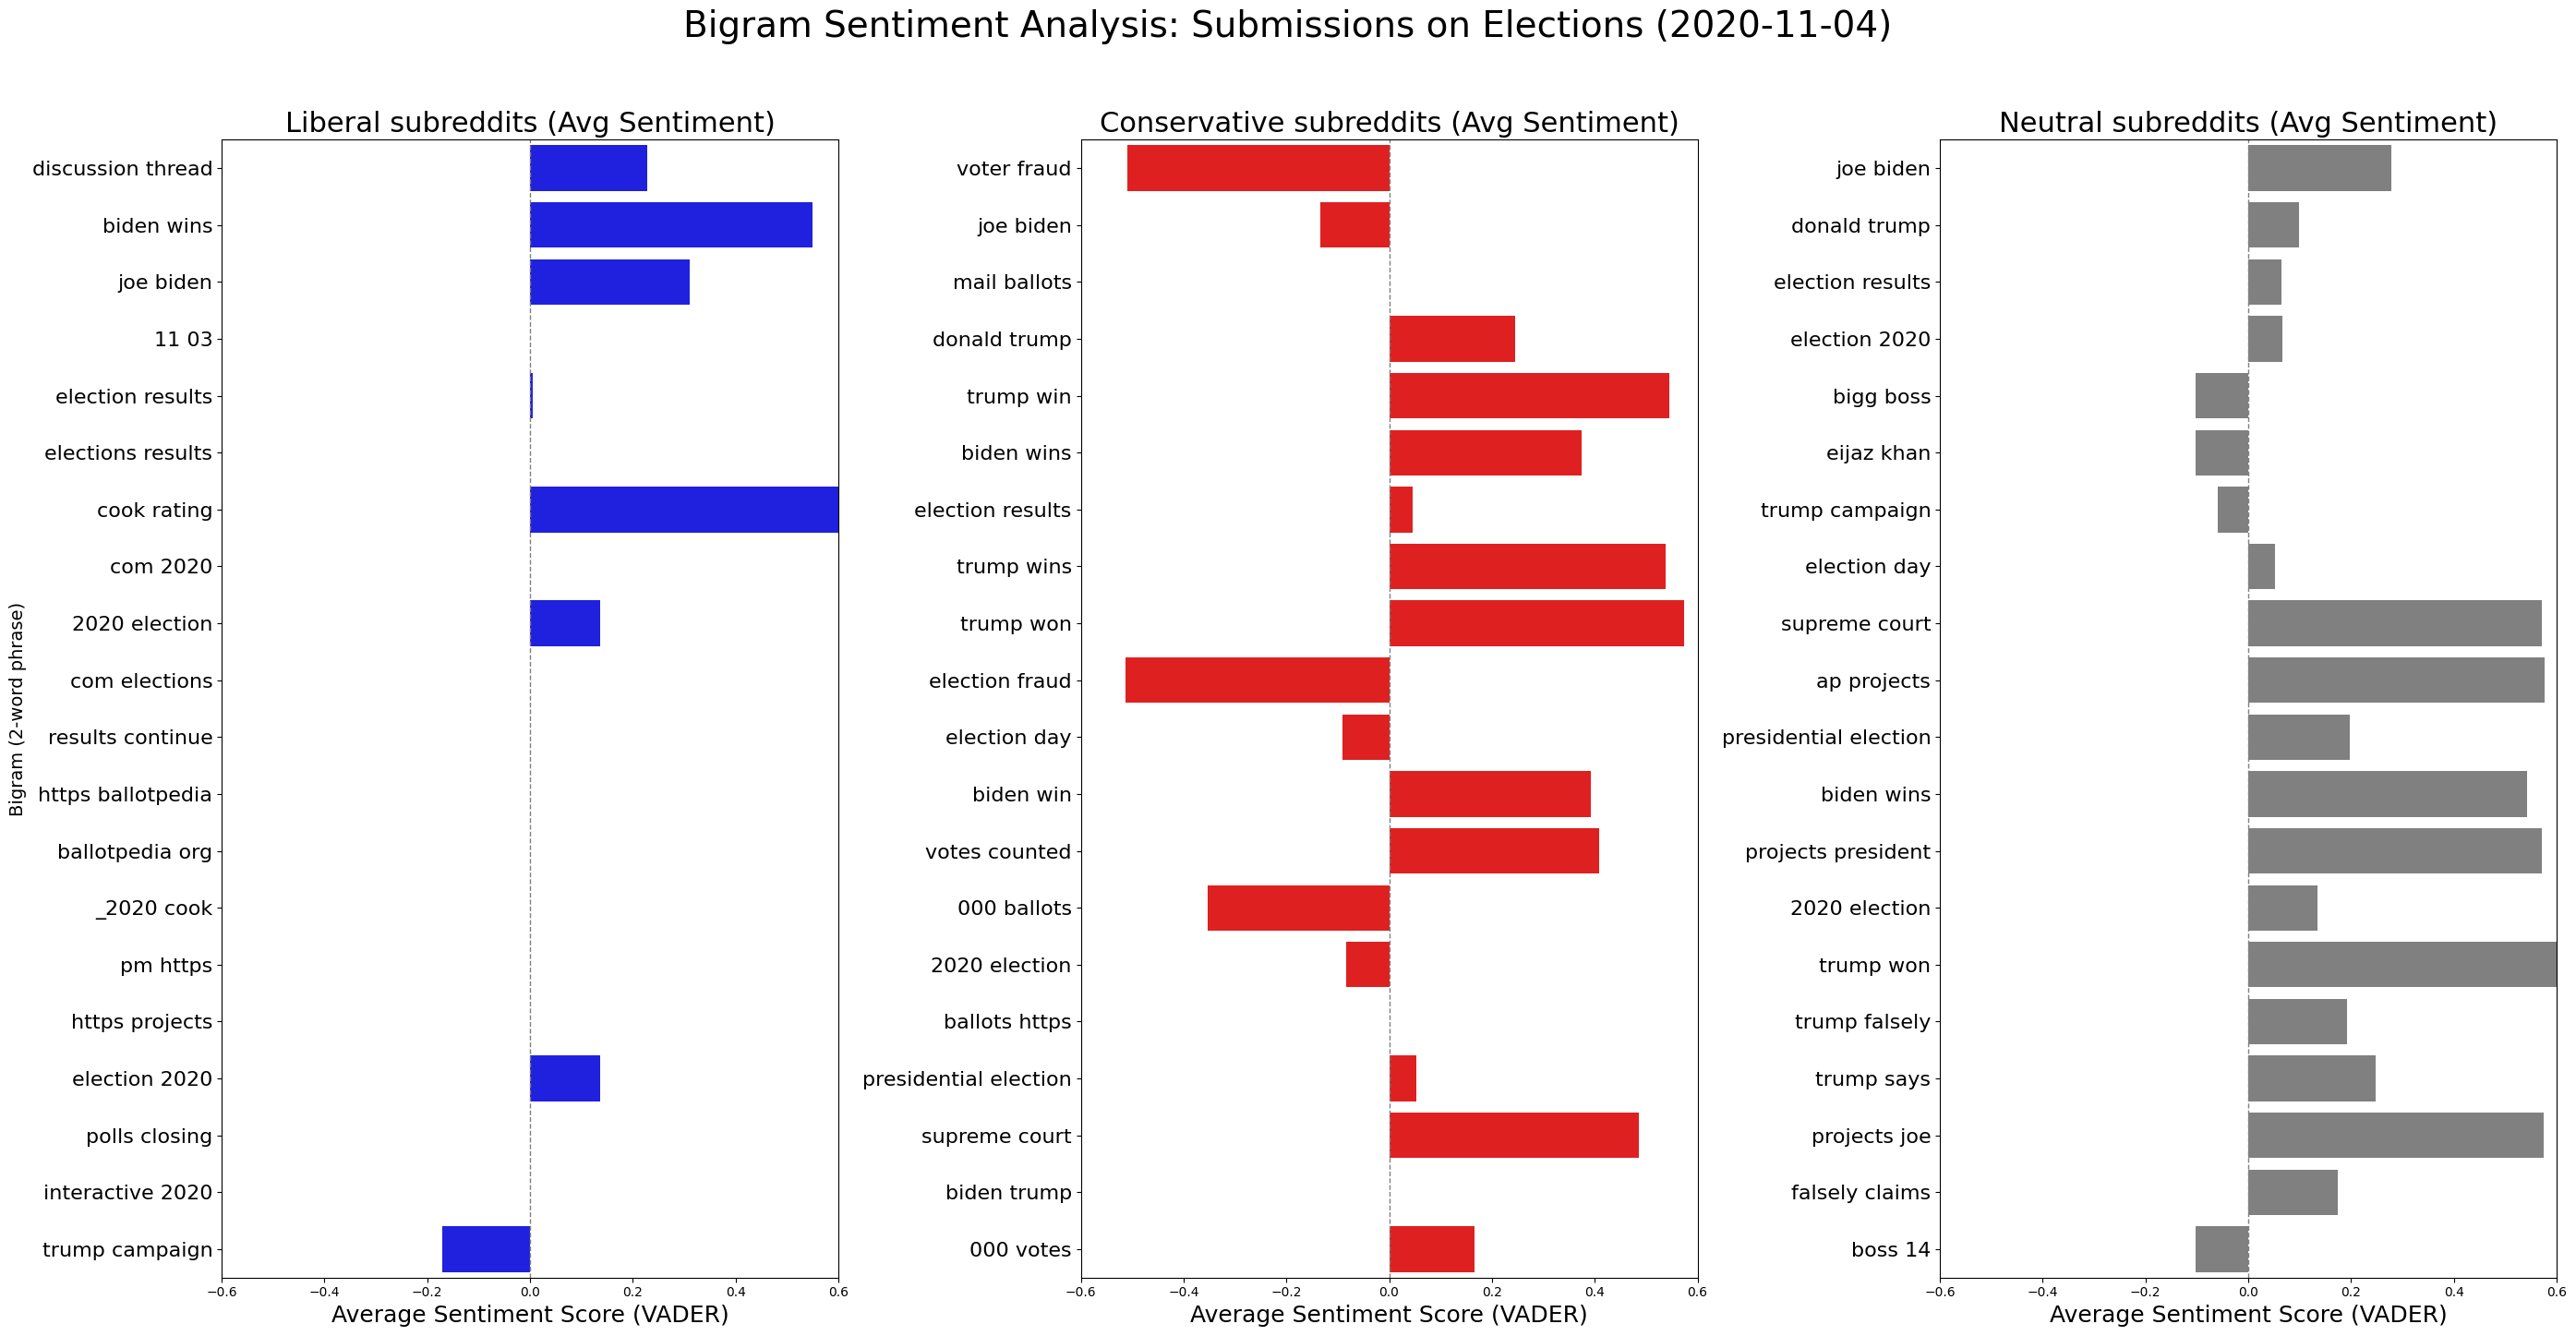

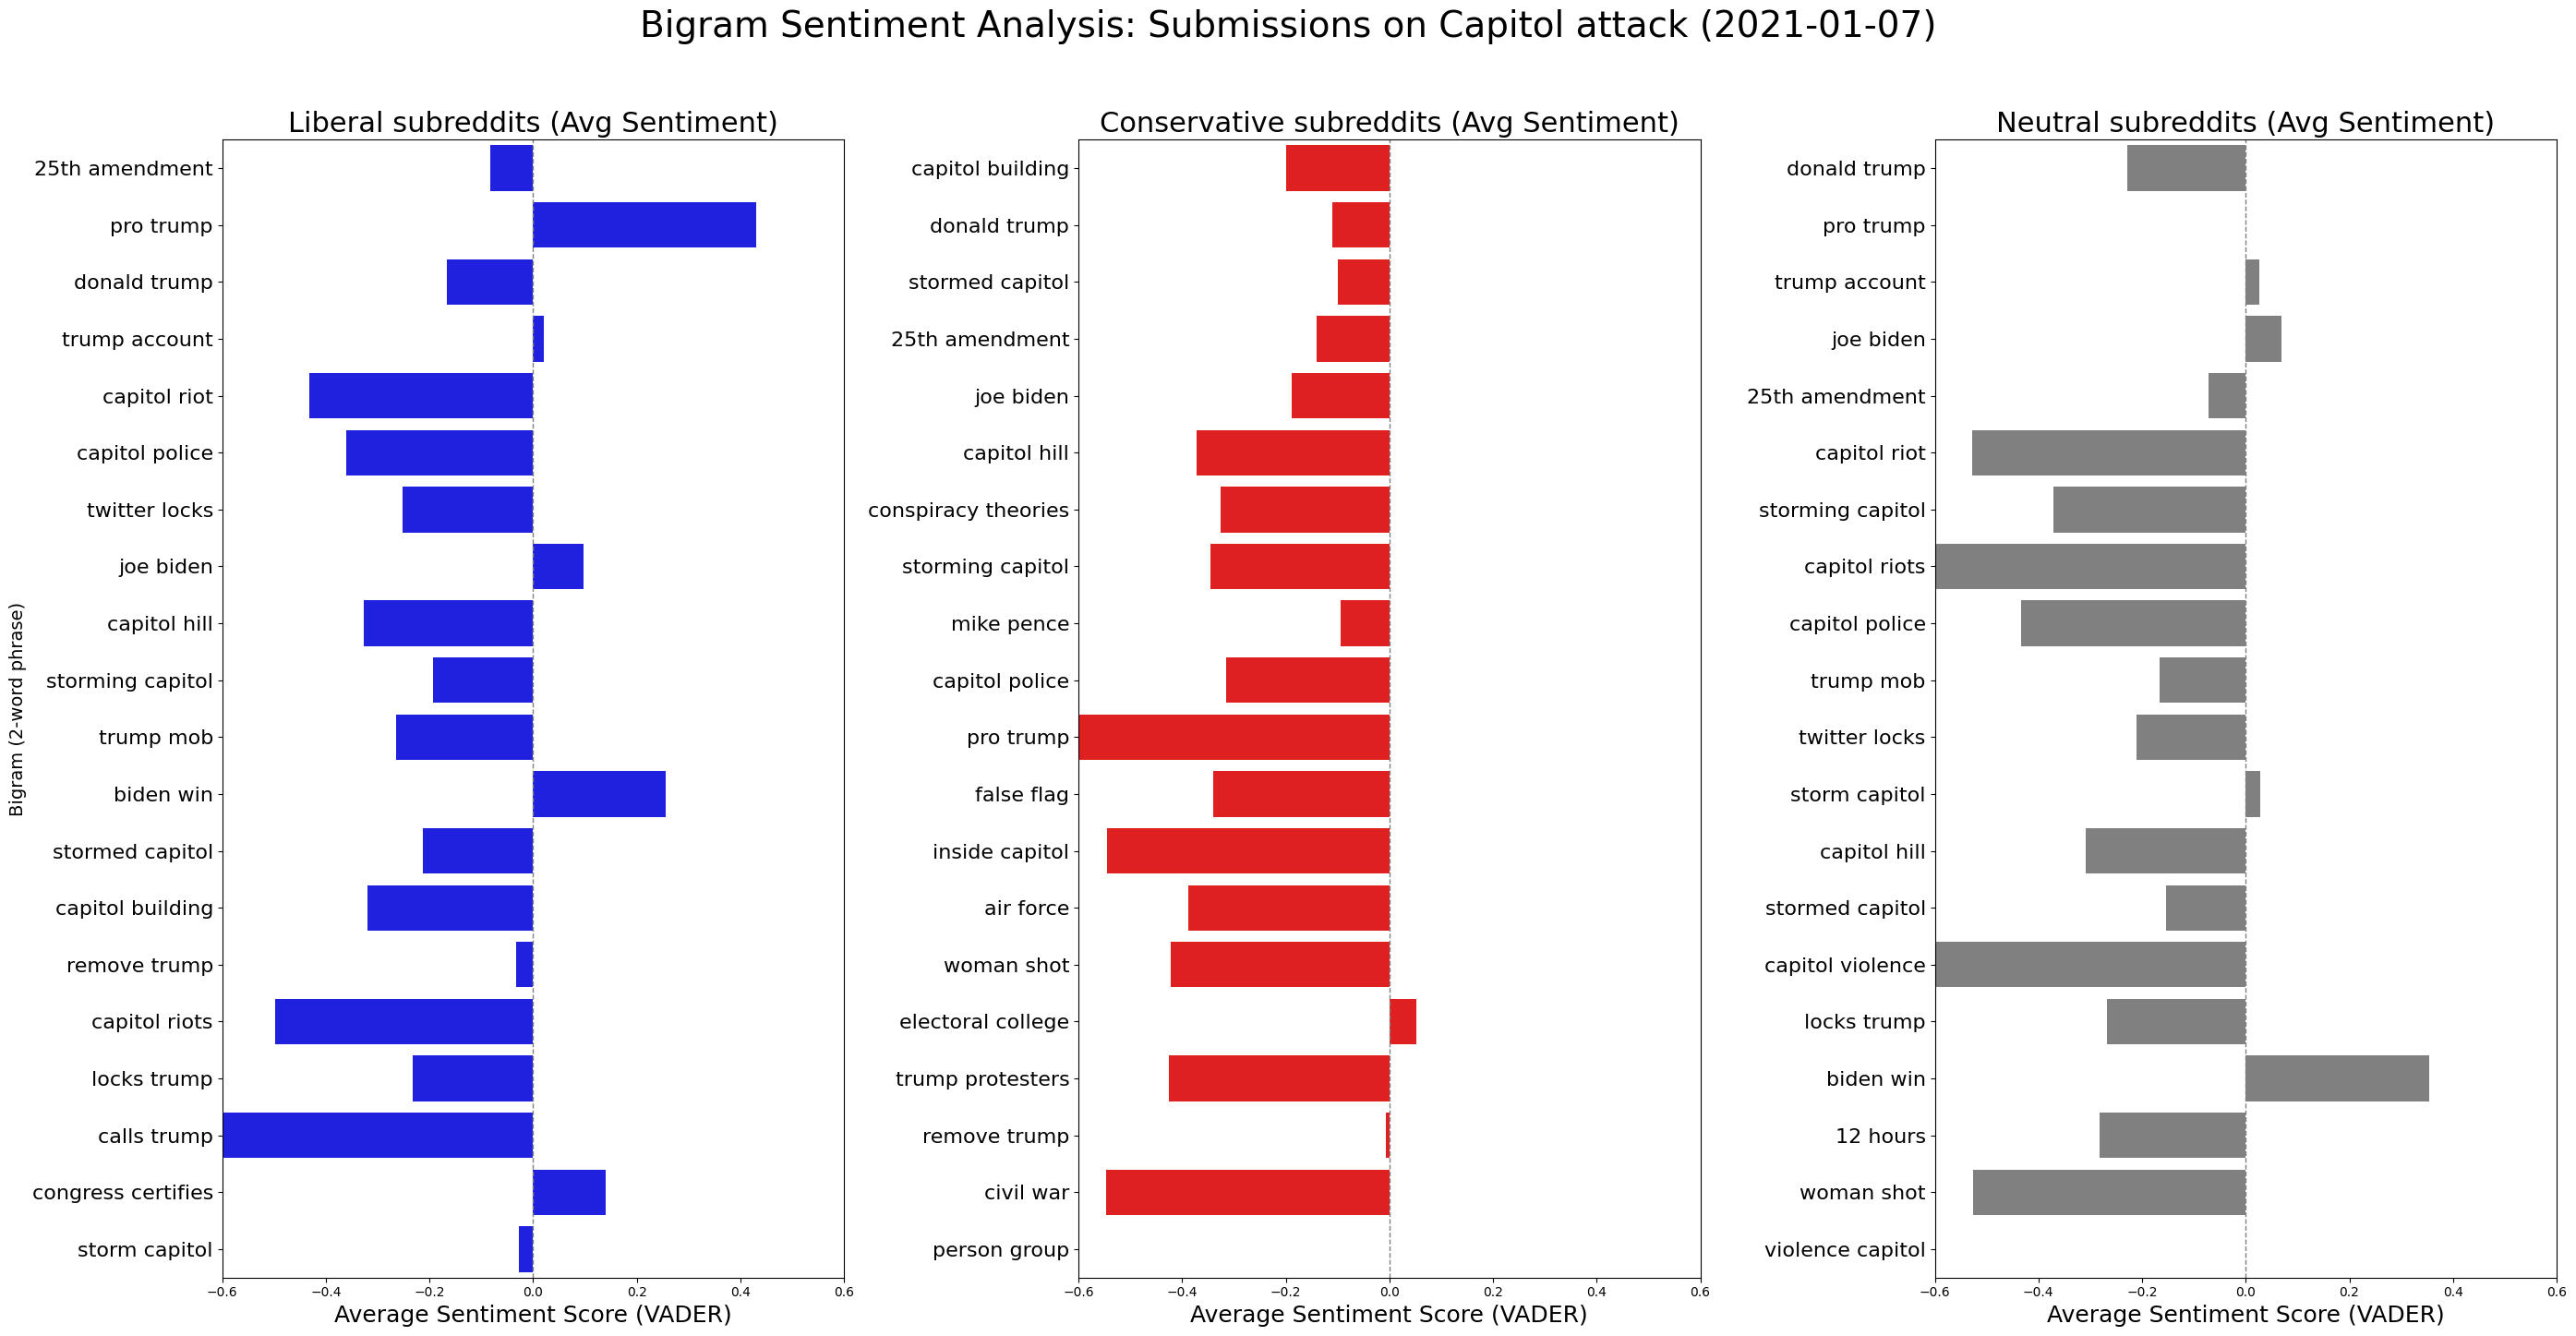

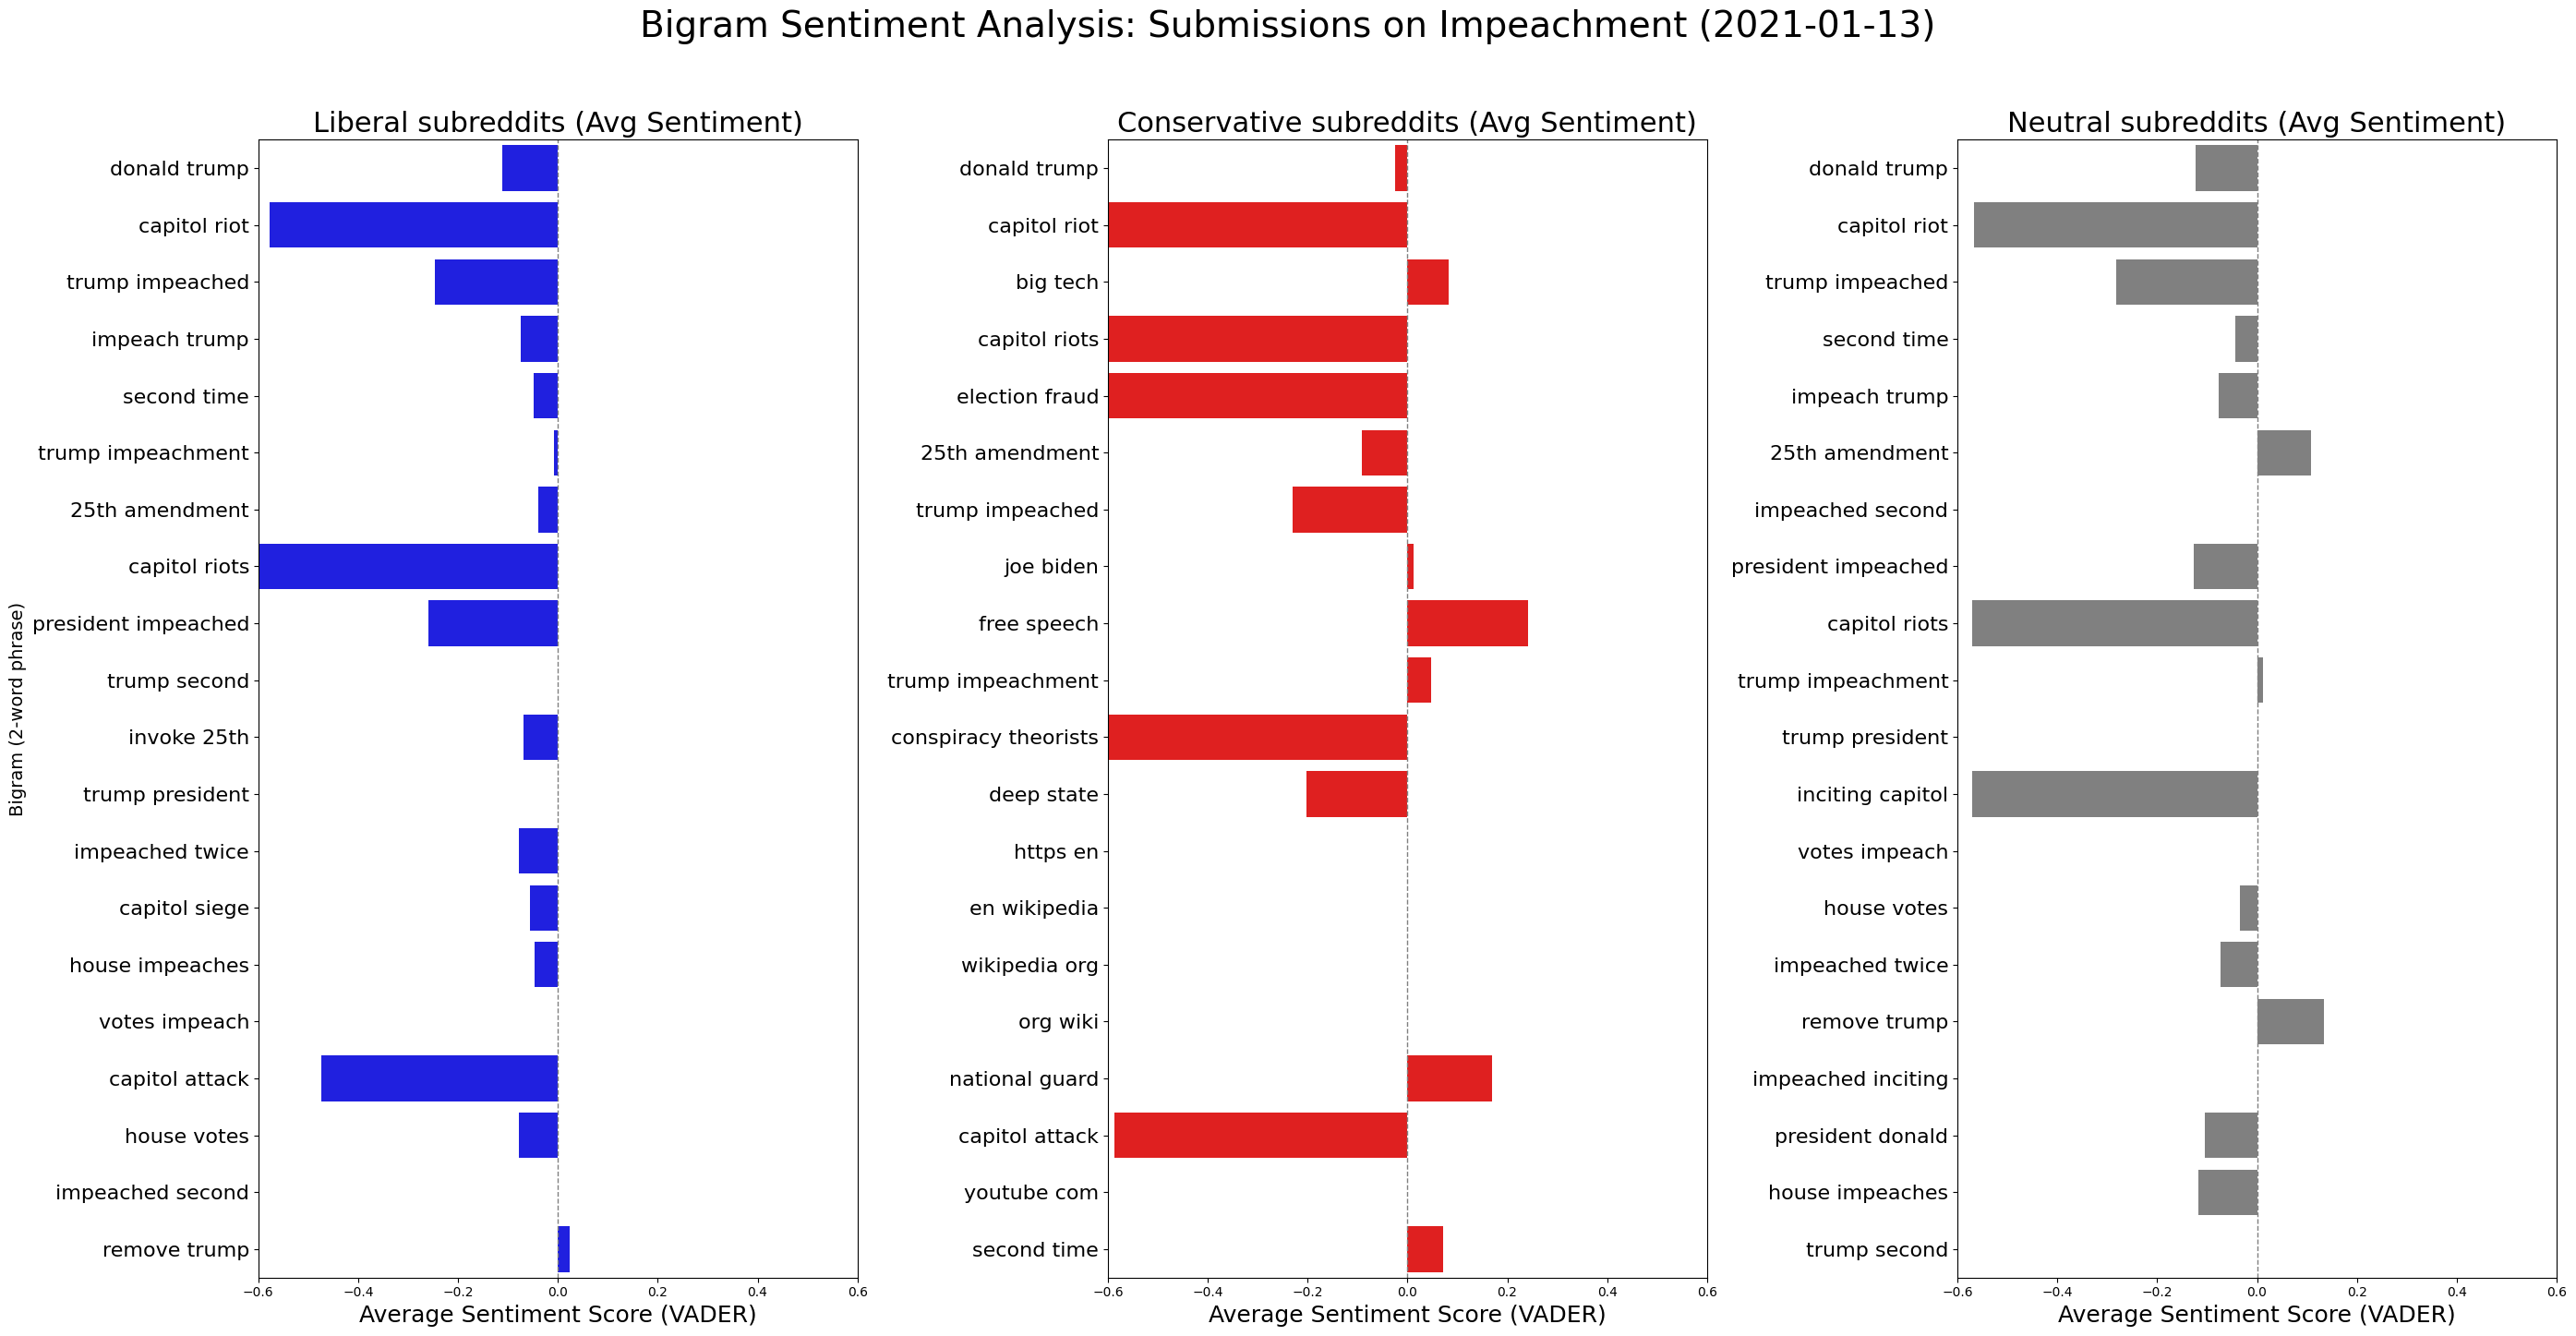

In [ ]:

for date_name, target_date in DATES.items():
    analyze_and_plot_bigram_sentiment(
        df_subs_prepared,
        "Submissions",
        date_name,
        target_date,
        'combined_text'
    )
    print('\n' * 2)

**Sentiment Conclusions: Submissions**

**Elections (2020-11-04)**

* Liberal Group: Sentiment was Positive (High). Submissions emphasized "biden wins" and "joe biden". The pattern was Declarative Victory.

* Conservative Group: Sentiment was Negative (Medium). Submissions focused on "voter fraud" and "election fraud". The pattern was protest of legitimacy.

* Neutral Group: Sentiment was Neutral (Low Pos). Submissions focused on "joe biden" and "donald trump". The pattern was focus on the person.

**Capitol Attack (2021-01-07)**

* Liberal Group: Sentiment was Negative (High). Submissions demanded action, using "25th amendment" and "remove trump". The pattern was demand for consequence.

* Conservative Group: Sentiment was Negative (High). Submissions were descriptive: "capitol building" and "stormed capitol". The pattern was event description.

* Neutral Group: Sentiment was Negative (Medium). Submissions focused on "donald trump" and "capitol riot". The pattern was factual summary.

**Impeachment (2021-01-13)**

* Liberal Group: Sentiment was Negative (High). Submissions confirmed the process: "trump impeached" and "house impeaches". The pattern was Finalizing Accountability.

* Conservative Group: Sentiment was Negative (Medium). Submissions defended against the narrative using "big tech" and "free speech". The pattern was defense of principle.

* Neutral Group: Sentiment was Negative (Low). Submissions confirmed the event: "donald trump" and "capitol riot". The pattern was confirmation of process.

**3.Topics**

After we made bigrams, analyzed them, we will analyze topics using LDA algorithm which will give us particular groups of words.

In [ ]:
import gensim
from gensim import corpora
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import gc

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
DATE_RANGES = {
    'Capitol attack': ('2021-01-07', '2021-01-07'),
    'Election': ('2020-11-03', '2020-11-03'),
    'Impechment': ('2021-01-13', '2021-01-13'),
    }

LDA_PARAMS = {
    'coms': {'num_topics': 10, 'no_below': 150, 'no_above': 0.2, 'passes': 10},
    'subs': {'num_topics': 10, 'no_below': 10, 'no_above': 0.5, 'passes': 10}
}

lemmatizer = WordNetLemmatizer()
custom_stopwords = set(stopwords.words('english'))
unwanted_words_list = UNWANTED_BIGRAMS.replace('|', ' ').split()
custom_stopwords.update(unwanted_words_list)
custom_stopwords.update(['amp', 'x200b', 'gt', 'lt', 'https', 'www', 'com',
                         'reddit', 'politics', 'submission', 'article',
                         'removed', 'deleted', 'wa', 'ha', 'would', 'could',
                         'one', 'use', 'like', 'just', 'get', 'say', 'think'])

def preprocess_text(text):
    tokens = [word.lower() for word in gensim.utils.simple_preprocess(str(text)) if word not in string.punctuation]
    tokens = [word for word in tokens if word not in custom_stopwords and len(word) >= 3]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

def run_lda_model(dataframe, text_column, num_topics, no_below, no_above, passes):
    texts_to_analyze = dataframe[text_column].fillna('')
    processed_data = [preprocess_text(doc) for doc in texts_to_analyze]
    processed_data = [doc for doc in processed_data if len(doc) > 0]


    id2word = corpora.Dictionary(processed_data)
    id2word.filter_extremes(no_below=no_below, no_above=no_above)
    corpus = [id2word.doc2bow(text) for text in processed_data]

    print(len(corpus))
    print(len(id2word))

    lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=passes)

    topics = lda_model.print_topics(num_words=10)
    for topic_id, topic_words in topics:
        print(f"{topic_id}: {topic_words}")

    return lda_model, corpus

def filter_data_by_period(df, period_name):
    start_date_str, end_date_str = DATE_RANGES[period_name]
    start_date = pd.to_datetime(start_date_str).date()
    end_date = pd.to_datetime(end_date_str).date()

    df_filtered = df[
        (df['time_created'].dt.date >= start_date) &
        (df['time_created'].dt.date <= end_date)
    ].copy()

    return df_filtered

In [ ]:
print("--- Topics for comments: ---")
for event, (start, end) in DATE_RANGES.items():
    print(f"\n Event: {event} ({start} - {end})")
    df_coms_filtered = filter_data_by_period(df_coms, event)
    run_lda_model(df_coms_filtered, 'text', **LDA_PARAMS['coms'])

print("\n\n--- Topics for submissions: ---")
for event, (start, end) in DATE_RANGES.items():
    print(f"\n Event: {event} ({start} - {end})")
    df_subs_filtered = filter_data_by_period(df_subs, event)
    run_lda_model(df_subs_filtered, 'title', **LDA_PARAMS['subs'])


--- Topics for comments: ---

 Event: Capitol attack (2021-01-07 - 2021-01-07)
117468
2174
0: 0.010*"even" + 0.010*"country" + 0.008*"american" + 0.007*"much" + 0.007*"way" + 0.007*"make" + 0.006*"really" + 0.006*"actually" + 0.006*"also" + 0.006*"thing"
1: 0.095*"penny" + 0.064*"impeachment" + 0.033*"office" + 0.028*"senate" + 0.024*"congress" + 0.022*"impeach" + 0.020*"remove" + 0.017*"amendment" + 0.016*"vote" + 0.016*"cabinet"
2: 0.037*"please" + 0.031*"source" + 0.028*"form" + 0.021*"domain" + 0.021*"action" + 0.020*"may" + 0.019*"link" + 0.018*"must" + 0.018*"account" + 0.018*"concern"
3: 0.058*"republican" + 0.047*"vote" + 0.030*"party" + 0.029*"biden" + 0.021*"fraud" + 0.018*"voter" + 0.017*"voted" + 0.017*"gop" + 0.016*"democrat" + 0.015*"state"
4: 0.028*"law" + 0.020*"make" + 0.017*"power" + 0.017*"government" + 0.014*"already" + 0.014*"however" + 0.014*"bot" + 0.013*"within" + 0.013*"constitution" + 0.013*"court"
5: 0.019*"time" + 0.016*"pardon" + 0.013*"impeached" + 0.012*"

Now let's make plots about output topics with matched words

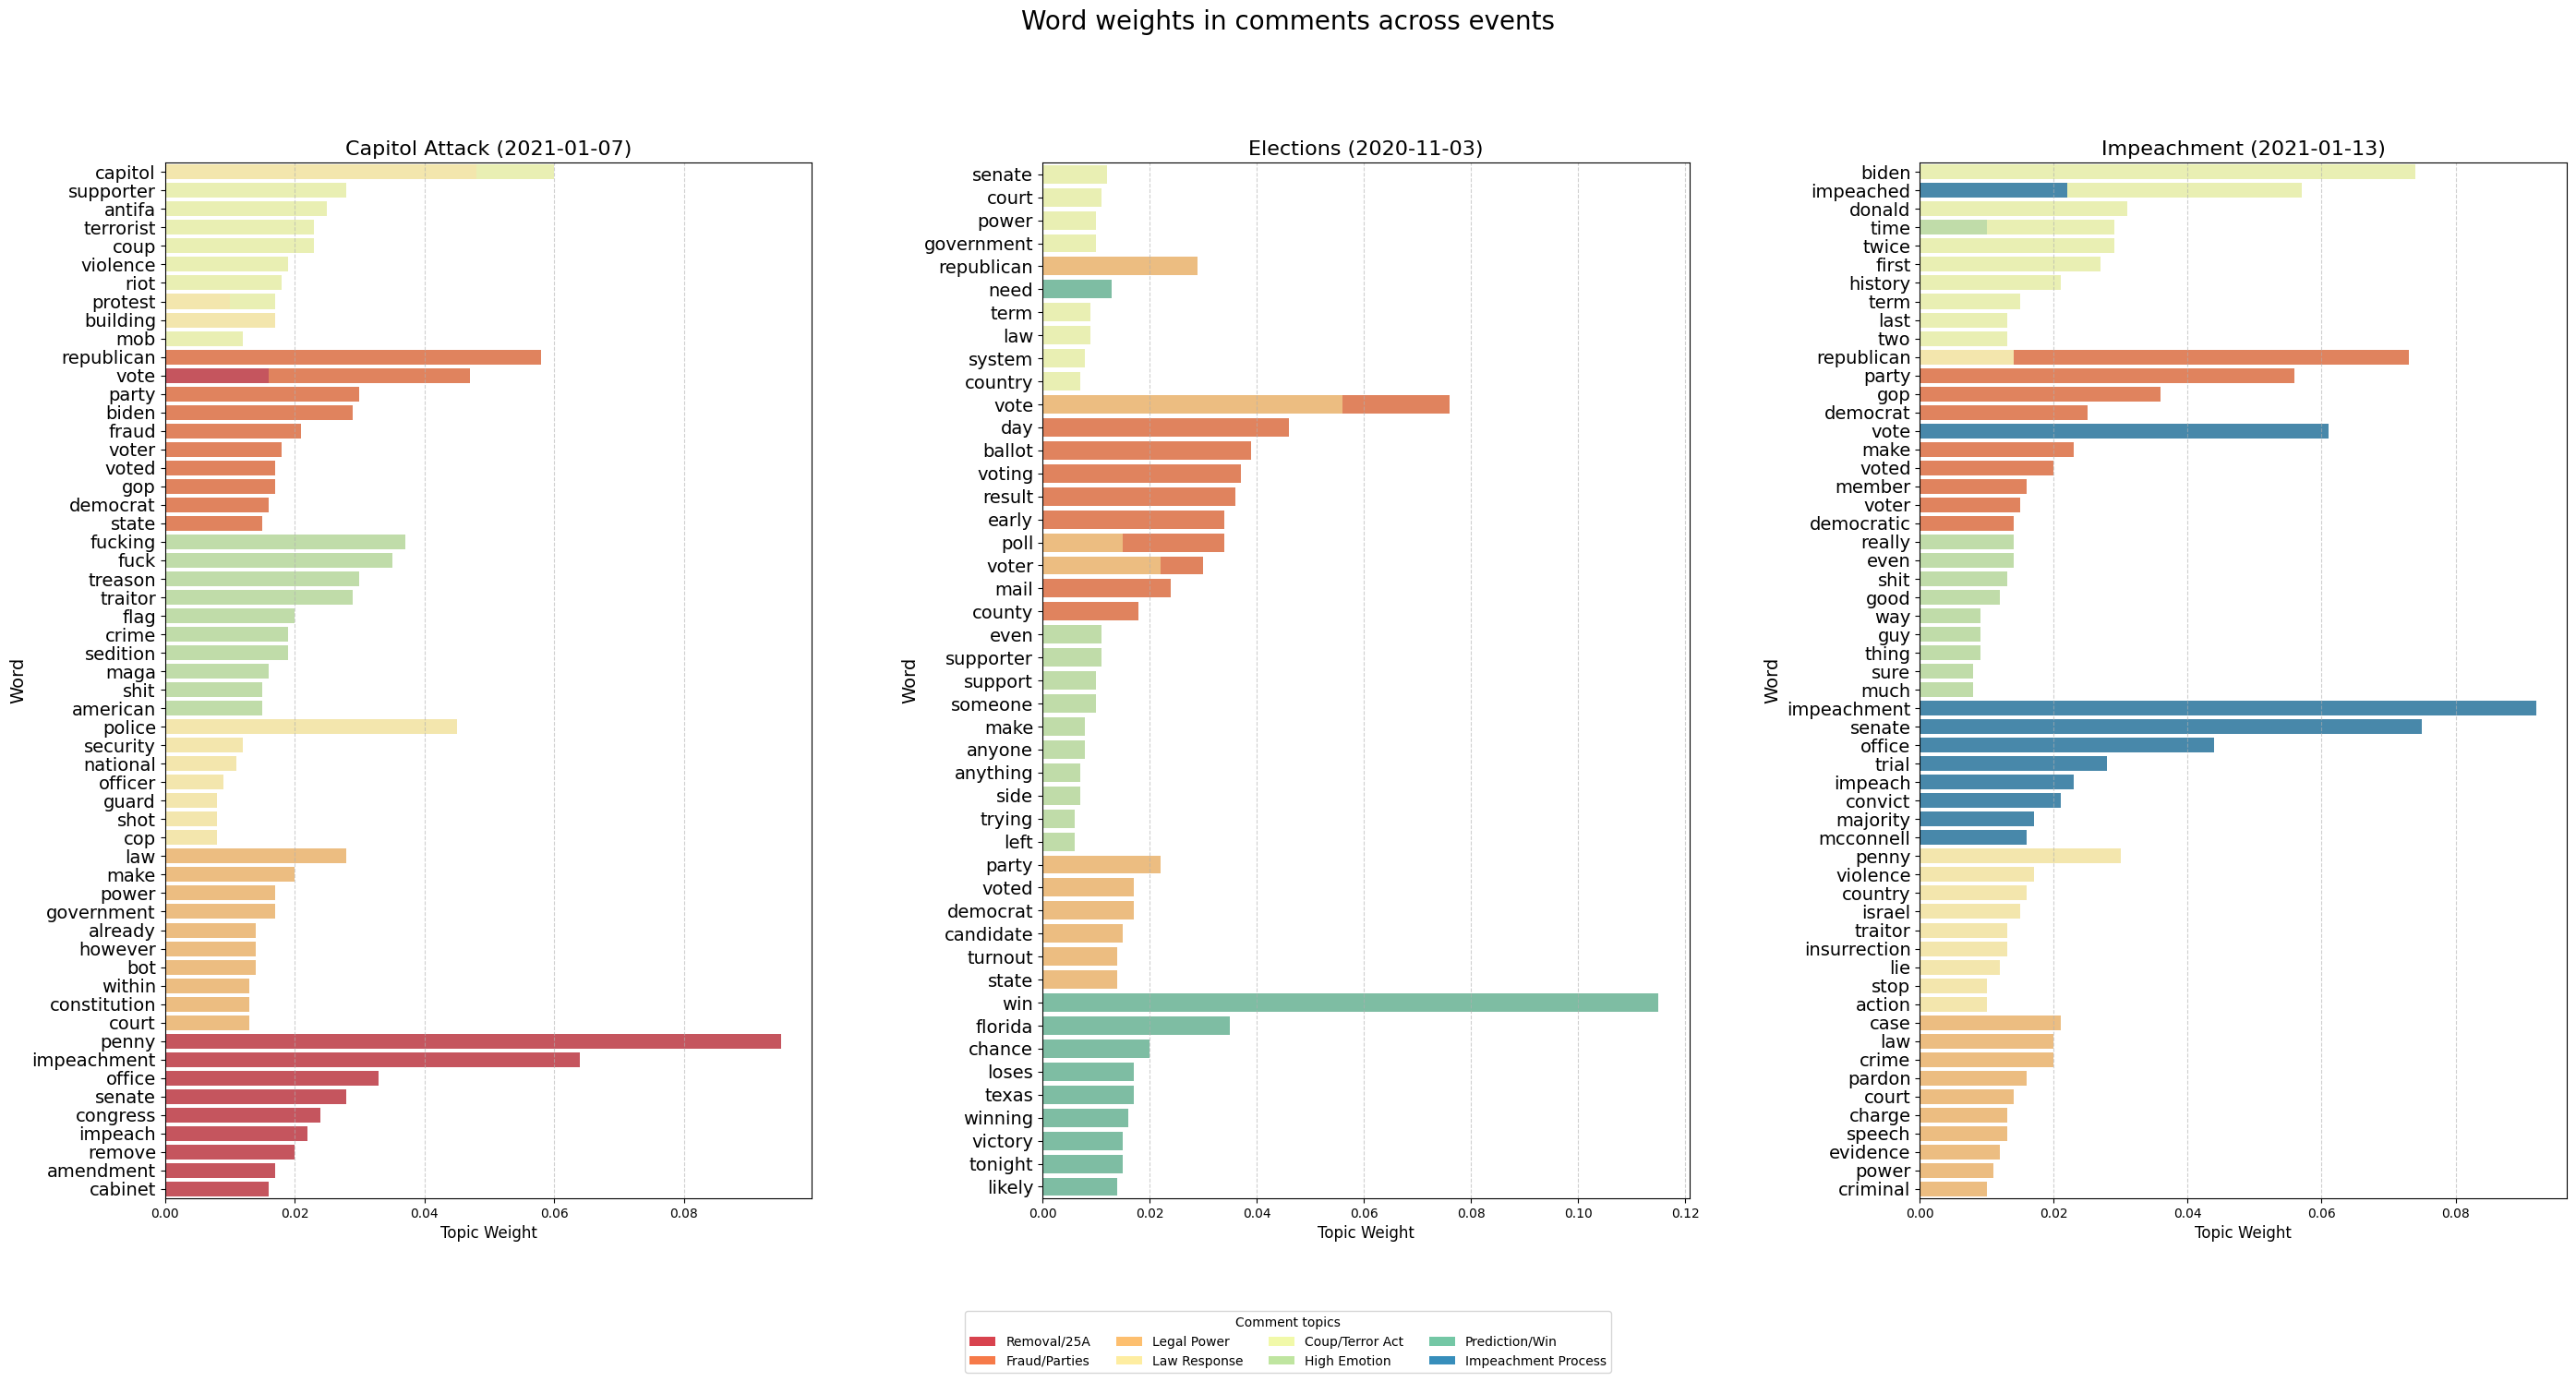

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ALL_LDA_OUTPUT = {
    'Capitol Attack': {
        'date': '2021-01-07',
        'output': {
            1: '0.095*"penny" + 0.064*"impeachment" + 0.033*"office" + 0.028*"senate" + 0.024*"congress" + 0.022*"impeach" + 0.020*"remove" + 0.017*"amendment" + 0.016*"vote" + 0.016*"cabinet"',
            3: '0.058*"republican" + 0.047*"vote" + 0.030*"party" + 0.029*"biden" + 0.021*"fraud" + 0.018*"voter" + 0.017*"voted" + 0.017*"gop" + 0.016*"democrat" + 0.015*"state"',
            4: '0.028*"law" + 0.020*"make" + 0.017*"power" + 0.017*"government" + 0.014*"already" + 0.014*"however" + 0.014*"bot" + 0.013*"within" + 0.013*"constitution" + 0.013*"court"',
            6: '0.048*"capitol" + 0.045*"police" + 0.017*"building" + 0.012*"security" + 0.011*"national" + 0.010*"protest" + 0.009*"officer" + 0.008*"guard" + 0.008*"shot" + 0.008*"cop"',
            8: '0.060*"capitol" + 0.028*"supporter" + 0.025*"antifa" + 0.023*"terrorist" + 0.023*"coup" + 0.019*"violence" + 0.018*"riot" + 0.017*"protest" + 0.016*"building" + 0.012*"mob"',
            9: '0.037*"fucking" + 0.035*"fuck" + 0.030*"treason" + 0.029*"traitor" + 0.020*"flag" + 0.019*"crime" + 0.019*"sedition" + 0.016*"maga" + 0.015*"shit" + 0.015*"american"'
        }
    },
    'Elections': {
        'date': '2020-11-03',
        'output': {
            3: '0.076*"vote" + 0.046*"day" + 0.039*"ballot" + 0.037*"voting" + 0.036*"result" + 0.034*"early" + 0.034*"poll" + 0.030*"voter" + 0.024*"mail" + 0.018*"county"',
            4: '0.056*"vote" + 0.029*"republican" + 0.022*"voter" + 0.022*"party" + 0.017*"voted" + 0.017*"democrat" + 0.015*"candidate" + 0.015*"poll" + 0.014*"turnout" + 0.014*"state"',
            7: '0.115*"win" + 0.035*"florida" + 0.020*"chance" + 0.017*"loses" + 0.017*"texas" + 0.016*"winning" + 0.015*"victory" + 0.015*"tonight" + 0.014*"likely" + 0.013*"need"',
            8: '0.012*"senate" + 0.011*"court" + 0.010*"power" + 0.010*"government" + 0.010*"republican" + 0.009*"need" + 0.009*"term" + 0.009*"law" + 0.008*"system" + 0.007*"country"',
            9: '0.011*"even" + 0.011*"supporter" + 0.010*"support" + 0.010*"someone" + 0.008*"make" + 0.008*"anyone" + 0.007*"anything" + 0.007*"side" + 0.006*"trying" + 0.006*"left"'
        }
    },
    'Impeachment': {
        'date': '2021-01-13',
        'output': {
            2: '0.092*"impeachment" + 0.075*"senate" + 0.061*"vote" + 0.044*"office" + 0.028*"trial" + 0.023*"impeach" + 0.022*"impeached" + 0.021*"convict" + 0.017*"majority" + 0.016*"mcconnell"',
            3: '0.073*"republican" + 0.056*"party" + 0.036*"gop" + 0.025*"democrat" + 0.023*"vote" + 0.023*"make" + 0.020*"voted" + 0.016*"member" + 0.015*"voter" + 0.014*"democratic"',
            4: '0.021*"case" + 0.020*"law" + 0.020*"crime" + 0.016*"pardon" + 0.014*"court" + 0.013*"charge" + 0.013*"speech" + 0.012*"evidence" + 0.011*"power" + 0.010*"criminal"',
            6: '0.030*"penny" + 0.017*"violence" + 0.016*"country" + 0.015*"israel" + 0.014*"republican" + 0.013*"traitor" + 0.013*"insurrection" + 0.012*"lie" + 0.010*"stop" + 0.010*"action"',
            8: '0.074*"biden" + 0.057*"impeached" + 0.031*"donald" + 0.029*"time" + 0.029*"twice" + 0.027*"first" + 0.021*"history" + 0.015*"term" + 0.013*"last" + 0.013*"two"',
            9: '0.014*"really" + 0.014*"even" + 0.013*"shit" + 0.012*"good" + 0.010*"time" + 0.009*"way" + 0.009*"guy" + 0.009*"thing" + 0.008*"sure" + 0.008*"much"'
        }
    }
}

TOPIC_BASE_NAMES = {
    1: 'Removal/25A', 3: 'Fraud/Parties', 4: 'Legal Power', 6: 'Law Response', 8: 'Coup/Terror Act', 9: 'High Emotion',
    7: 'Prediction/Win',
    2: 'Impeachment Process',
    5: 'General Time/Pardon', 0: 'General Sentiment/Filler'
}

FULL_BASE_TOPICS_LIST = [
    'Removal/25A', 'Fraud/Parties', 'Legal Power', 'Law Response', 'Coup/Terror Act', 'High Emotion',
    'Prediction/Win', 'Impeachment Process'
]


def create_legend_handles(base_names, color_palette_name='Spectral'):
    base_colors = sns.color_palette(color_palette_name, len(base_names))
    handles = []
    labels = []
    for i, name in enumerate(base_names):
        handle = plt.Rectangle((0, 0), 1, 1, fc=base_colors[i], edgecolor='none')
        handles.append(handle)
        labels.append(name)

    return handles, labels, base_colors

def parse_lda_data_with_event_prefix(lda_output_dict, event_name):
    plotting_data = []

    if event_name == 'Capitol Attack':
        relevant_ids = [1, 3, 4, 6, 8, 9]
    elif event_name == 'Elections':
        relevant_ids = [3, 4, 7, 8, 9]
    elif event_name == 'Impeachment':
        relevant_ids = [2, 3, 4, 6, 8, 9]
    else:
        return pd.DataFrame()

    for topic_id, words_string in lda_output_dict['output'].items():
        if topic_id in relevant_ids:
            base_name = TOPIC_BASE_NAMES.get(topic_id, f"Topic {topic_id}")
            full_topic_name = f'{event_name}: {base_name}'

            parts = words_string.split(' + ')
            for part in parts:
                if '*' in part:
                    weight, word = part.split('*')
                    plotting_data.append({
                        'Event': event_name,
                        'Topic_Name': full_topic_name,
                        'Base_Name': base_name,
                        'Word': word.replace('"', ''),
                        'Weight': float(weight)
                    })
    return pd.DataFrame(plotting_data)

all_data_frames = []
for event_name, event_data in ALL_LDA_OUTPUT.items():
    df = parse_lda_data_with_event_prefix(event_data, event_name)
    all_data_frames.append(df)

df_all_events = pd.concat(all_data_frames, ignore_index=True)

handles, labels, base_colors_list = create_legend_handles(FULL_BASE_TOPICS_LIST)

base_topic_to_color = {name: base_colors_list[i % len(base_colors_list)] for i, name in enumerate(FULL_BASE_TOPICS_LIST)}
final_color_map = {}
for full_name in df_all_events['Topic_Name'].unique():
    base_name = full_name.split(': ')[1]
    final_color_map[full_name] = base_topic_to_color[base_name]

fig, axes = plt.subplots(1, 3, figsize=(28, 14), sharex=False, sharey=False)
fig.suptitle('Word weights in comments across events', fontsize=20, y=1.01)

for i, event_name in enumerate(ALL_LDA_OUTPUT.keys()):
    ax = axes[i]
    df_event = df_all_events[df_all_events['Event'] == event_name].copy()

    df_event_sorted = df_event.sort_values(by=['Topic_Name', 'Weight'], ascending=[True, False])

    sns.barplot(
        data=df_event_sorted,
        x='Weight',
        y='Word',
        hue='Topic_Name',
        dodge=False,
        ax=ax,
        palette=final_color_map,
        order=df_event_sorted['Word'].unique()
    )


    ax.set_title(f'{event_name} ({ALL_LDA_OUTPUT[event_name]["date"]})', fontsize=16)
    ax.set_xlabel('Topic Weight', fontsize=12)
    ax.set_ylabel('Word', fontsize=14)
    ax.tick_params(axis='y', labelsize=14)

    if i == 2:
        current_handles, current_labels = ax.get_legend_handles_labels()

        legend_labels = []
        legend_handles = []

        sorted_labels = sorted(final_color_map.keys())

        for name in FULL_BASE_TOPICS_LIST:
             base_color = base_topic_to_color[name]
             full_names_list = [l for l in current_labels if name in l]

             if full_names_list:
                 legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=base_color, edgecolor='none'))
                 legend_labels.append(name)

        fig.legend(handles=handles,
                   labels=labels,
                   title="Comment topics",
                   loc='lower center',
                   bbox_to_anchor=(0.5, -0.05),
                   ncol=4,
                   fontsize=10)

        ax.legend([], [], frameon=False)

    else:
        ax.legend([], [], frameon=False)

    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95], w_pad=5)
plt.subplots_adjust(bottom=0.09)
plt.show()

**Topic Modeling Conclusions: Comments**

**Elections (2020-11-03)**
* Dominant Theme: The primary focus was on the logistics of voting and the immediate results as they were being reported.
* Key Topic Words: vote, day, ballot, voting, result, poll and win, florida, texas, winning.
* Pattern: Real-time Event Tracking.

**Capitol Attack (2021-01-07)**
* Dominant Theme: The discussion was a chaotic mix of immediate accountability, defining the event, and assigning blame.
* Key Topic Words: penny, impeachment, amendment, capitol, terrorist, coup, antifa and treason, traitor, crime.
* Pattern: Crisis Response & Accountability Demand.

**Impeachment (2021-01-13)**
* Dominant Theme: The focus shifted to the formal political process and its historical significance.
* Key Topic Words: impeachment, senate, vote, trial, convict, mcconnell and impeached, twice, first, history.
* Pattern: Formalizing the Consequence.

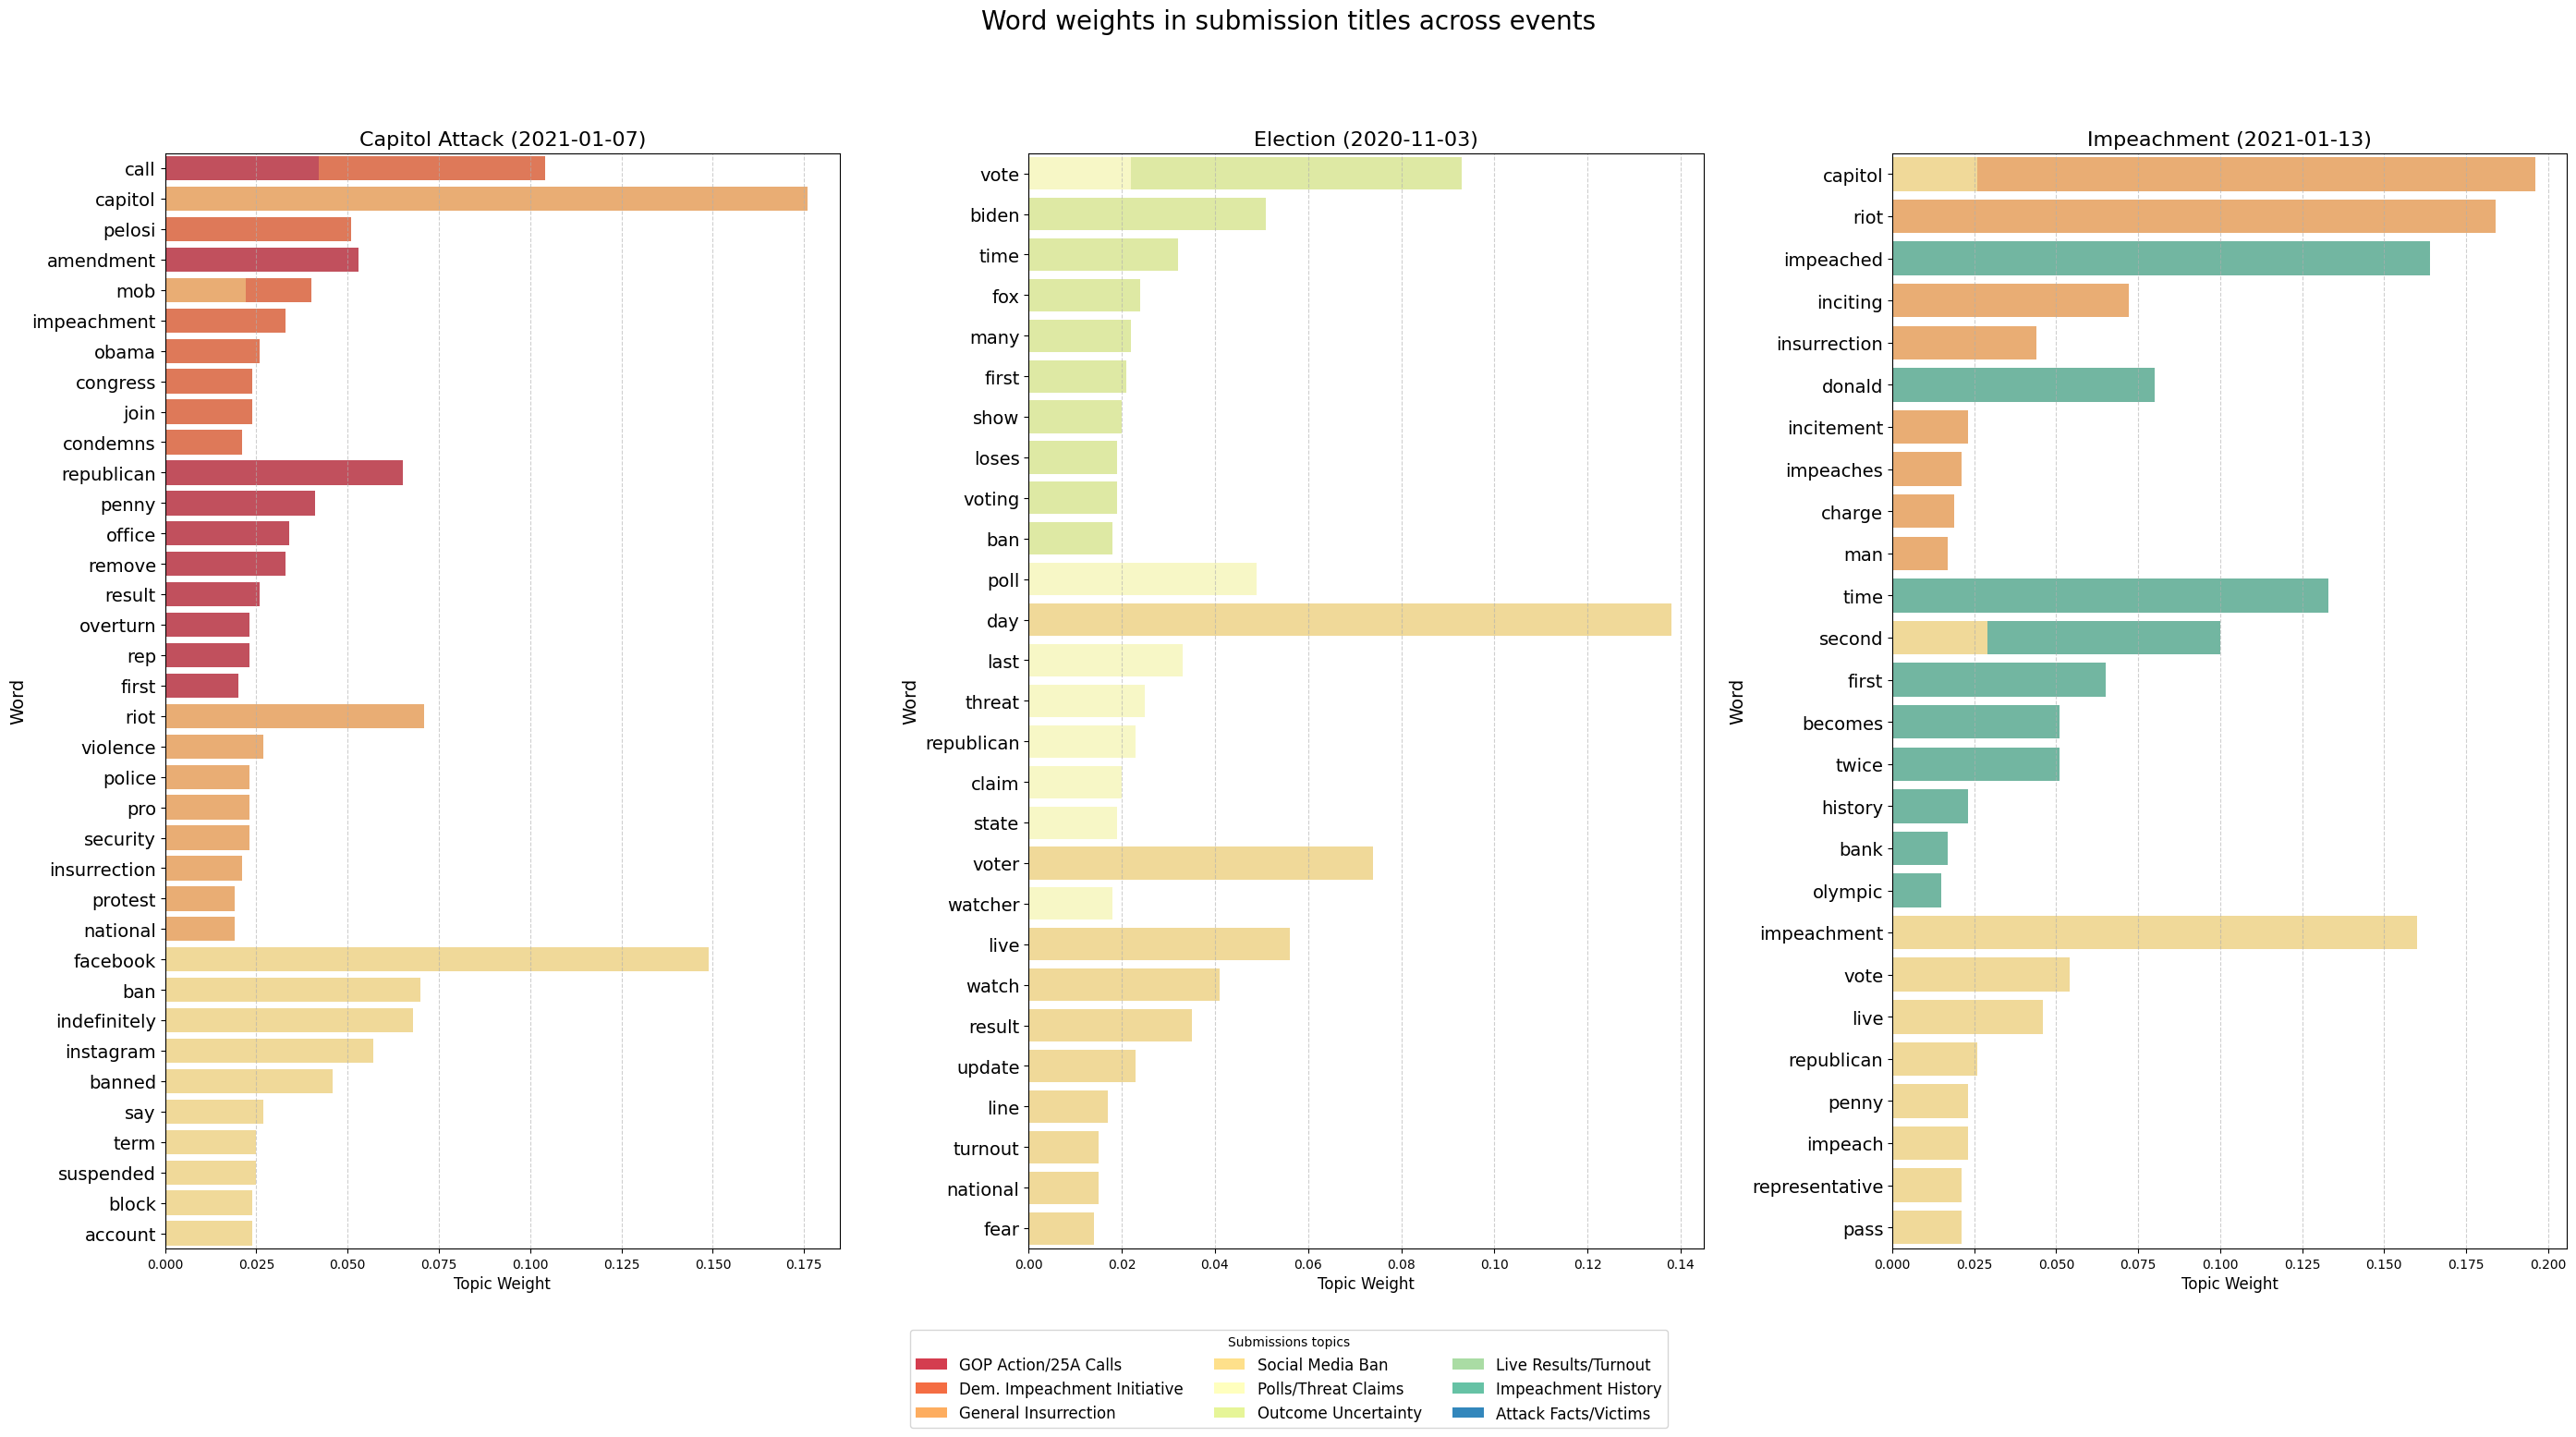

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
SUBMISSIONS_LDA_OUTPUT = {
    'Capitol Attack': {
        'date': '2021-01-07',
        'output': {
            2: '0.065*"republican" + 0.053*"amendment" + 0.042*"call" + 0.041*"penny" + 0.034*"office" + 0.033*"remove" + 0.026*"result" + 0.023*"overturn" + 0.023*"rep" + 0.020*"first"',
            3: '0.104*"call" + 0.059*"capitol" + 0.051*"pelosi" + 0.041*"amendment" + 0.040*"mob" + 0.033*"impeachment" + 0.026*"obama" + 0.024*"congress" + 0.024*"join" + 0.021*"condemns"',
            5: '0.176*"capitol" + 0.071*"riot" + 0.027*"violence" + 0.023*"police" + 0.023*"pro" + 0.023*"security" + 0.022*"mob" + 0.021*"insurrection" + 0.019*"protest" + 0.019*"national"',
            8: '0.149*"facebook" + 0.070*"ban" + 0.068*"indefinitely" + 0.057*"instagram" + 0.046*"banned" + 0.027*"say" + 0.025*"term" + 0.025*"suspended" + 0.024*"block" + 0.024*"account"',
        }
    },
    'Election': {
        'date': '2020-11-03',
        'output': {
            4: '0.049*"poll" + 0.048*"day" + 0.033*"last" + 0.025*"threat" + 0.023*"republican" + 0.022*"vote" + 0.020*"claim" + 0.019*"state" + 0.019*"voter" + 0.018*"watcher"',
            7: '0.093*"vote" + 0.051*"biden" + 0.032*"time" + 0.024*"fox" + 0.022*"many" + 0.021*"first" + 0.020*"show" + 0.019*"loses" + 0.019*"voting" + 0.018*"ban"',
            8: '0.138*"day" + 0.074*"voter" + 0.056*"live" + 0.041*"watch" + 0.035*"result" + 0.023*"update" + 0.017*"line" + 0.015*"turnout" + 0.015*"national" + 0.014*"fear"',
        }
    },
    'Impeachment': {
        'date': '2021-01-13',
        'output': {
            5: '0.196*"capitol" + 0.184*"riot" + 0.078*"impeached" + 0.072*"inciting" + 0.044*"insurrection" + 0.026*"donald" + 0.023*"incitement" + 0.021*"impeaches" + 0.019*"charge" + 0.017*"man"',
            6: '0.164*"impeached" + 0.133*"time" + 0.100*"second" + 0.080*"donald" + 0.065*"first" + 0.051*"becomes" + 0.051*"twice" + 0.023*"history" + 0.017*"bank" + 0.015*"olympic"',
            8: '0.160*"impeachment" + 0.054*"vote" + 0.046*"live" + 0.029*"second" + 0.026*"capitol" + 0.026*"republican" + 0.023*"penny" + 0.023*"impeach" + 0.021*"representative" + 0.021*"pass"',
        }
    }
}

SUBMISSIONS_BASE_TOPICS_MAP = {
    2: 'GOP Action/25A Calls', 3: 'Dem. Impeachment Initiative', 5: 'General Insurrection',
    8: 'Social Media Ban', 4: 'Polls/Threat Claims', 7: 'Outcome Uncertainty',
    9: 'Live Results/Turnout', 6: 'Impeachment History', 1: 'Attack Facts/Victims'
}
SUBMISSIONS_FULL_BASE_TOPICS_LIST = list(SUBMISSIONS_BASE_TOPICS_MAP.values())


def create_legend_handles(base_names, color_palette_name='Spectral'):
    """Creates fixed legend handles for all base topics for the unified legend."""
    base_colors = sns.color_palette(color_palette_name, len(base_names))
    handles = []
    labels = []
    for i, name in enumerate(base_names):
        handle = plt.Rectangle((0, 0), 1, 1, fc=base_colors[i], edgecolor='none')
        handles.append(handle)
        labels.append(name)
    return handles, labels, base_colors

def parse_lda_data_with_event_prefix(lda_output_dict, event_name):
    plotting_data = []
    topic_id_map = SUBMISSIONS_BASE_TOPICS_MAP

    relevant_ids = lda_output_dict['output'].keys()

    for topic_id in relevant_ids:
        words_string = lda_output_dict['output'][topic_id]

        base_name = topic_id_map.get(topic_id, f"Topic {topic_id}")
        full_topic_name = f'{event_name}: {base_name}'

        parts = words_string.split(' + ')
        for part in parts:
            if '*' in part:
                weight, word = part.split('*')
                plotting_data.append({
                    'Event': event_name,
                    'Topic_Name': full_topic_name,
                    'Base_Name': base_name,
                    'Word': word.replace('"', ''),
                    'Weight': float(weight)
                })
    return pd.DataFrame(plotting_data)


all_data_frames = []
for event_name, event_data in SUBMISSIONS_LDA_OUTPUT.items():
    df = parse_lda_data_with_event_prefix(event_data, event_name)
    all_data_frames.append(df)

df_all_events = pd.concat(all_data_frames, ignore_index=True)

handles, labels, base_colors_list = create_legend_handles(SUBMISSIONS_FULL_BASE_TOPICS_LIST)

base_topic_to_color = {name: base_colors_list[i % len(base_colors_list)] for i, name in enumerate(SUBMISSIONS_FULL_BASE_TOPICS_LIST)}
final_color_map = {}
for full_name in df_all_events['Topic_Name'].unique():
    base_name = full_name.split(': ')[1]
    final_color_map[full_name] = base_topic_to_color[base_name]


fig, axes = plt.subplots(1, 3, figsize=(28, 14), sharex=False, sharey=False)
fig.suptitle('Word weights in submission titles across events', fontsize=20, y=1.003)

for i, event_name in enumerate(SUBMISSIONS_LDA_OUTPUT.keys()):
    ax = axes[i]
    df_event = df_all_events[df_all_events['Event'] == event_name].copy()

    df_event_sorted = df_event.sort_values(by=['Topic_Name', 'Weight'], ascending=[True, False])

    df_event_sorted['Y_Label'] = df_event_sorted['Word']

    sns.barplot(
        data=df_event_sorted,
        x='Weight',
        y='Y_Label',
        hue='Topic_Name',
        dodge=False,
        ax=ax,
        palette=final_color_map,
        order=df_event_sorted['Y_Label'].unique()
    )

    ax.set_title(f'{event_name} ({SUBMISSIONS_LDA_OUTPUT[event_name]["date"]})', fontsize=16)
    ax.set_xlabel('Topic Weight', fontsize=12)
    ax.set_ylabel('Word', fontsize=14)
    ax.tick_params(axis='y', labelsize=14)

    ax.legend([], [], frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)


plt.subplots_adjust(bottom=0.40)
plt.tight_layout(rect=[0, 0, 1, 0.95], w_pad=2)

fig.legend(handles=handles,
           labels=labels,
           title="Submissions topics",
           loc='lower center',
           bbox_to_anchor=(0.5, -0.10),
           ncol=3,
           fontsize=12)

plt.show()

**Topic Modeling Conclusions: Submissions**

**Elections (2020-11-03)**
* Dominant Theme: Headlines focused on the key players (Biden) and the live reporting of results.
* Key Topic Words: biden, joe, win and day, voter, live, watch, result .
* Pattern: Key Player & Live Reporting.

**Capitol Attack (2021-01-07)**
* Dominant Theme: The news agenda was dominated by the corporate/social media fallout and calls for institutional action.
* Key Topic Words: facebook, ban, indefinitely, instagram and republican, amendment, penny, remove.
* Pattern: Institutional & Corporate Fallout.

**Impeachment (2021-01-13)**
* Dominant Theme: Headlines focused on the causality of the attack (incitement) and the historical nature of the event.
* Key Topic Words: capitol, riot, impeached, inciting, insurrection and impeached, time, second, twice, history.
* Pattern: Historical Documentation & Causality.

# **Interesting findings**

**Comparing the top 100 bigrams from the Liberal and Conservative subreddit groups for the day of Capitol attack**

In [ ]:
def calculate_jaccard(df_coms, target_date, sub_map, N=100):
    date_filter = pd.to_datetime(target_date).date()
    df_day = df_coms[df_coms['time_created'].dt.date == date_filter].copy()

    liberal_text = df_day[df_day['subreddit'].isin(sub_map.get('Liberal', []))]['text']
    conservative_text = df_day[df_day['subreddit'].isin(sub_map.get('Conservative', []))]['text']

    df_liberal_bigrams = get_top_bigrams(liberal_text, n=N)
    set_liberal = set(df_liberal_bigrams['Bigram'])

    df_conservative_bigrams = get_top_bigrams(conservative_text, n=N)
    set_conservative = set(df_conservative_bigrams['Bigram'])


    shared_bigrams = set_liberal.intersection(set_conservative)
    union_bigrams = set_liberal.union(set_conservative)

    intersection = len(shared_bigrams)
    union = len(union_bigrams)

    jaccard_index = intersection / union if union > 0 else 0.0

    return jaccard_index, shared_bigrams

In [ ]:
TARGET_DATE = '2021-01-07'

jaccard_score, shared_bigrams = calculate_jaccard(df_coms, TARGET_DATE, SUBREDDIT_MAP, N=100)

print(f"jakkard similarity index (top 100 bigrams): {jaccard_score:.4f}")
print(f"Percentage of similarity: {jaccard_score * 100:.2f}%")
print(f"Amount of same bigrams: {len(shared_bigrams)}")


jakkard similarity index (top 100 bigrams): 0.2195
Percentage of similarity: 21.95%
Amount of same bigrams: 36


Low Jaccard similarity index of 0.2195 indicates a significant divergence in the most frequent two-word phrases used by the Liberal and Conservative subreddit groups. Only 36 bigrams were similar, suggesting that the communities are primarily focusing on different topics or using distinct language and narratives

/tmp/ipython-input-2689845461.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


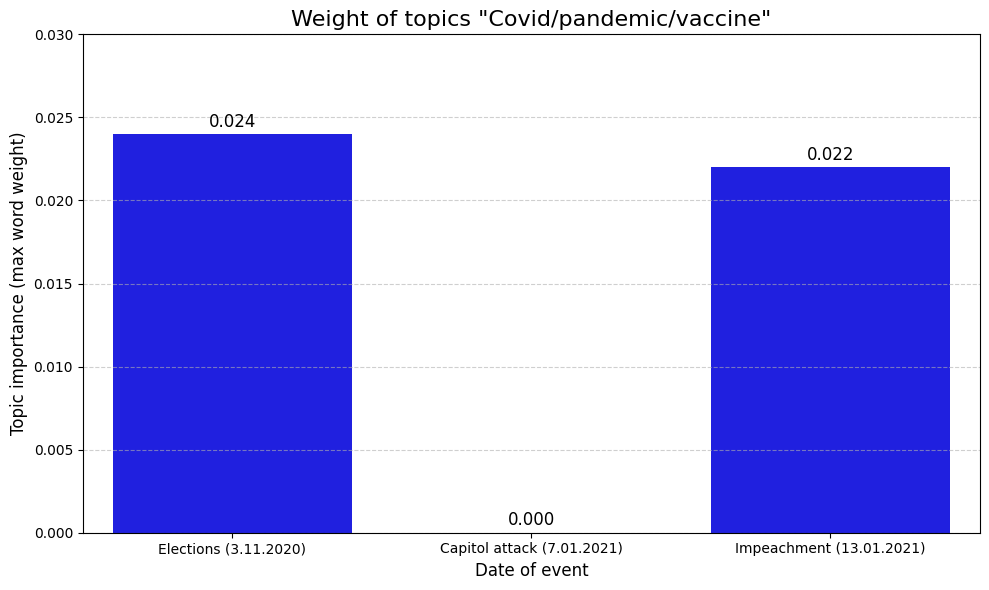

In [ ]:
data = {
    'Event': ['Elections (3.11.2020)', 'Capitol attack (7.01.2021)', 'Impeachment (13.01.2021)'],
    'Topic Weight (Proxy)': [       # we took this data from output text in which there are words connected to topic
        0.024,  # weight of "covid" in topic №6 (subm. 3.11)
        0.000,  # "Covid" or "vaccine" didn't appear on top-topics on 7.01
        0.022   # weight of "covid" in topic №0 (subm. 13.01)
    ]
}
df_silence = pd.DataFrame(data)

plt.figure(figsize=(14, 8))

ax = sns.barplot(
    data=df_silence,
    x='Event',
    y='Topic Weight (Proxy)',
    palette=['blue', '#d62728', 'blue']
)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 9),
               textcoords='offset points', fontsize=12)

plt.title('Weight of topics "Covid/pandemic/vaccine"', fontsize=16)
plt.xlabel('Date of event', fontsize=12)
plt.ylabel('Topic importance (max word weight)', fontsize=12)
plt.ylim(0, 0.03)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

The plot shows that the topic "COVID/Pandemic" was an important topic of discussion during the Election (weight 0.024) and the Impeachment (weight 0.022), which is the normal "baseline" for a global health crisis.

On January 7th, the day after the Capitol storming, this topic completely disappears (weight 0.000). It was pushed out of the top 10 words of every LDA topic.

This visually proves that the Capitol storming was such a massive, all-consuming event that it instantly drowned out discussion of even a global crisis like a pandemic.

<Figure size 1400x800 with 0 Axes>

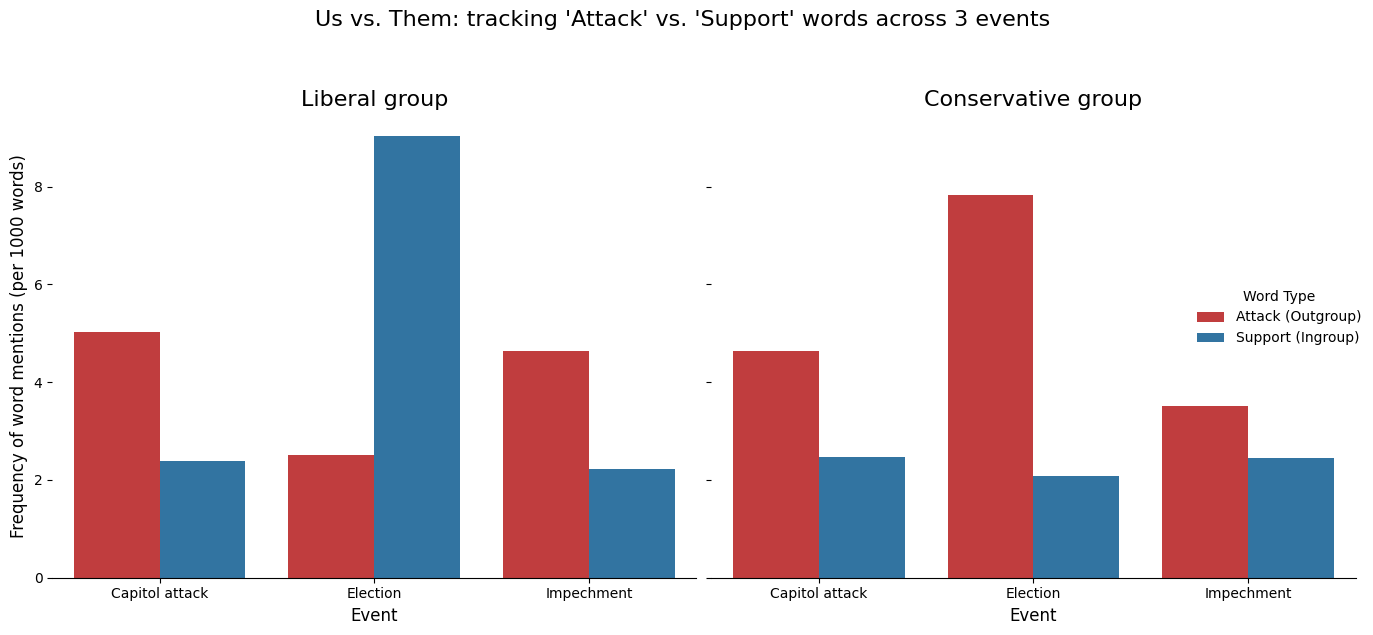

In [ ]:
def calculate_relative_frequency(text_series, target_words):
    text_series = text_series.fillna('')
    total_vectorizer = CountVectorizer()
    total_matrix = total_vectorizer.fit_transform(text_series)
    total_word_count = total_matrix.sum()
    if total_word_count == 0:
        return 0.0
    target_vectorizer = CountVectorizer(vocabulary=list(target_words))
    target_matrix = target_vectorizer.fit_transform(text_series)
    target_word_count = target_matrix.sum()
    relative_frequency = (target_word_count / total_word_count) * 1000
    return relative_frequency


liberal_outgroup = {'maga', 'republican', 'fascist', 'traitor', 'treason', 'sedition', 'fraud', 'gop', 'antifa'}
liberal_ingroup = {'progressive', 'democrat', 'biden', 'pelosi'}
conservative_outgroup = {'antifa', 'democrat', 'biden', 'pelosi', 'blm', 'lib', 'socialist'}
conservative_ingroup = {'patriot', 'conservative', 'gop', 'republican', 'maga'}

results = []

for event_name, (start_date_str, end_date_str) in DATE_RANGES.items():

    start_date = pd.to_datetime(start_date_str).date()
    end_date = pd.to_datetime(end_date_str).date()

    df_day = df_coms[
        (df_coms['time_created'].dt.date >= start_date) &
        (df_coms['time_created'].dt.date <= end_date)
    ].copy()

    text_liberal = df_day[df_day['subreddit'].isin(SUBREDDIT_MAP['Liberal'])]['text']
    text_conservative = df_day[df_day['subreddit'].isin(SUBREDDIT_MAP['Conservative'])]['text']

    results.append({
        'Event': event_name,
        'Group': 'Liberal',
        'Word Type': 'Attack (Outgroup)',
        'Frequency': calculate_relative_frequency(text_liberal, liberal_outgroup)
    })
    results.append({
        'Event': event_name,
        'Group': 'Liberal',
        'Word Type': 'Support (Ingroup)',
        'Frequency': calculate_relative_frequency(text_liberal, liberal_ingroup)
    })
    results.append({
        'Event': event_name,
        'Group': 'Conservative',
        'Word Type': 'Attack (Outgroup)',
        'Frequency': calculate_relative_frequency(text_conservative, conservative_outgroup)
    })
    results.append({
        'Event': event_name,
        'Group': 'Conservative',
        'Word Type': 'Support (Ingroup)',
        'Frequency': calculate_relative_frequency(text_conservative, conservative_ingroup)
    })


df_plot_all_events = pd.DataFrame(results)

plt.figure(figsize=(14, 8))

g = sns.catplot(
    data=df_plot_all_events,
    kind='bar',
    x='Event',
    y='Frequency',
    hue='Word Type',
    col='Group',
    palette={'Attack (Outgroup)': '#d62728', 'Support (Ingroup)': '#1f77b4'},
    height=6,
    aspect=1
)

g.fig.suptitle("Us vs. Them: tracking 'Attack' vs. 'Support' words across 3 events", y=1.05, fontsize=16)
g.set_axis_labels("Event", "Frequency of word mentions (per 1000 words)", fontsize=12 )
g.set_titles("{col_name} group", size=16)
g.despine(left=True)
plt.tight_layout()
plt.show()

In all three crises, both Liberal and Conservative groups used significantly more "Attack (Outgroup)" language (red bars) than "Support (Ingroup)" language (blue bars). This suggests political discussion is driven more by criticizing the opposition than supporting one's own side.

The "Capitol Attack" event saw the absolute highest spike in "Attack" language for both groups. This indicates a massive surge in polarization and anger in direct response to the crisis.

After the attack, the level of "Attack" language during the "Impeachment" event did not return to the previous "Election" baseline. It remained exceptionally high, showing the crisis established a new, more polarized level of rhetoric.

**Not obvious group sentiment differences**

Shared Negative Sentiment on Crisis: Both the Liberal and Conservative groups experienced a significant shift from polarized sentiment during the election to uniformly negative sentiment during the Capitol Attack and Impeachment (in both comments and submissions).

This suggests that they had different context. While liberals during raid channeled negative emotions into institutional outrage and the immediate demand for consequences and security response, conservative believed in a conspiracy-driven deflection, maintaining the counter-narrative that the events were a result of deeper, unproven political issues.

During impeachment liberals sentiment was directed at the subject of the impeachment and tied to the process of holding the leader to accountability. While negative emotion of conservatives used to reframe the event as an ideological attack and censorship (linked to "big tech", "free speech"), rather than an outcome of the Capitol Attack.

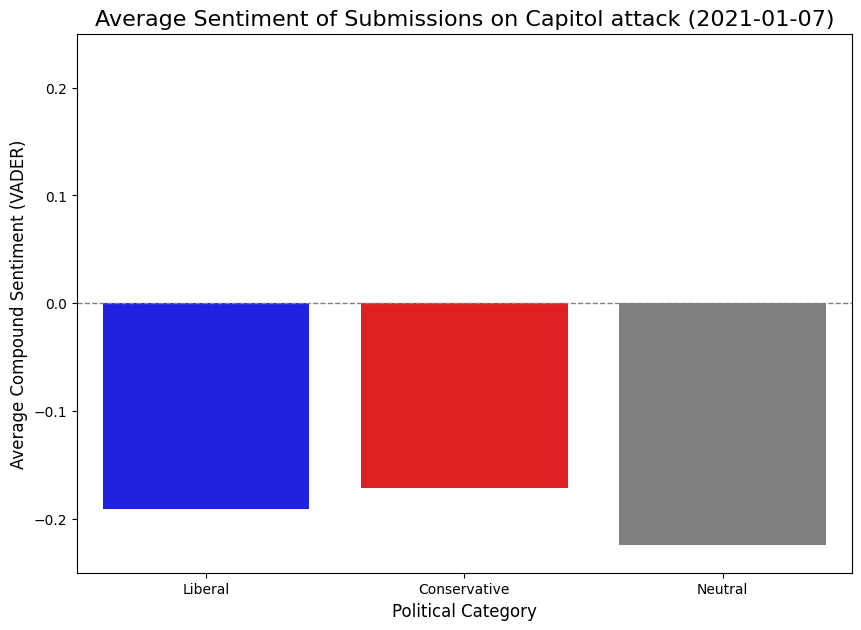

In [ ]:
from IPython.display import Image

Image('/content/drive/MyDrive/Trump2020_CSS_course_project/visualization_photos/sentiment_groups.png')

**Why did conservarives not have peak activity during the raid or impeachment?**

It is easily explained by looking at sentiment. We can see that after losing in election, the January events were about defense and consequences. Impeachment is an act of political loss, and the Capitol Attack involved mixed emotions (shock, defense, justification), making it harder to mobilize under a single, high-volume narrative.

The total grouped activity declined, but specific subreddits spiked: While the grouped activity dropped, the most dedicated subreddits had significant proportional activity. For instance, r/republicans subreddit saw activity increase nearly 15-fold (from 31 to 464 comments) between the Election Day and the Capitol Attack.

This suggests that the discussion during the crises became more segmented and focused on smaller, ideologically pure communities, where the conversation was intense but not massive enough to rival the overall activity spike from the election period.

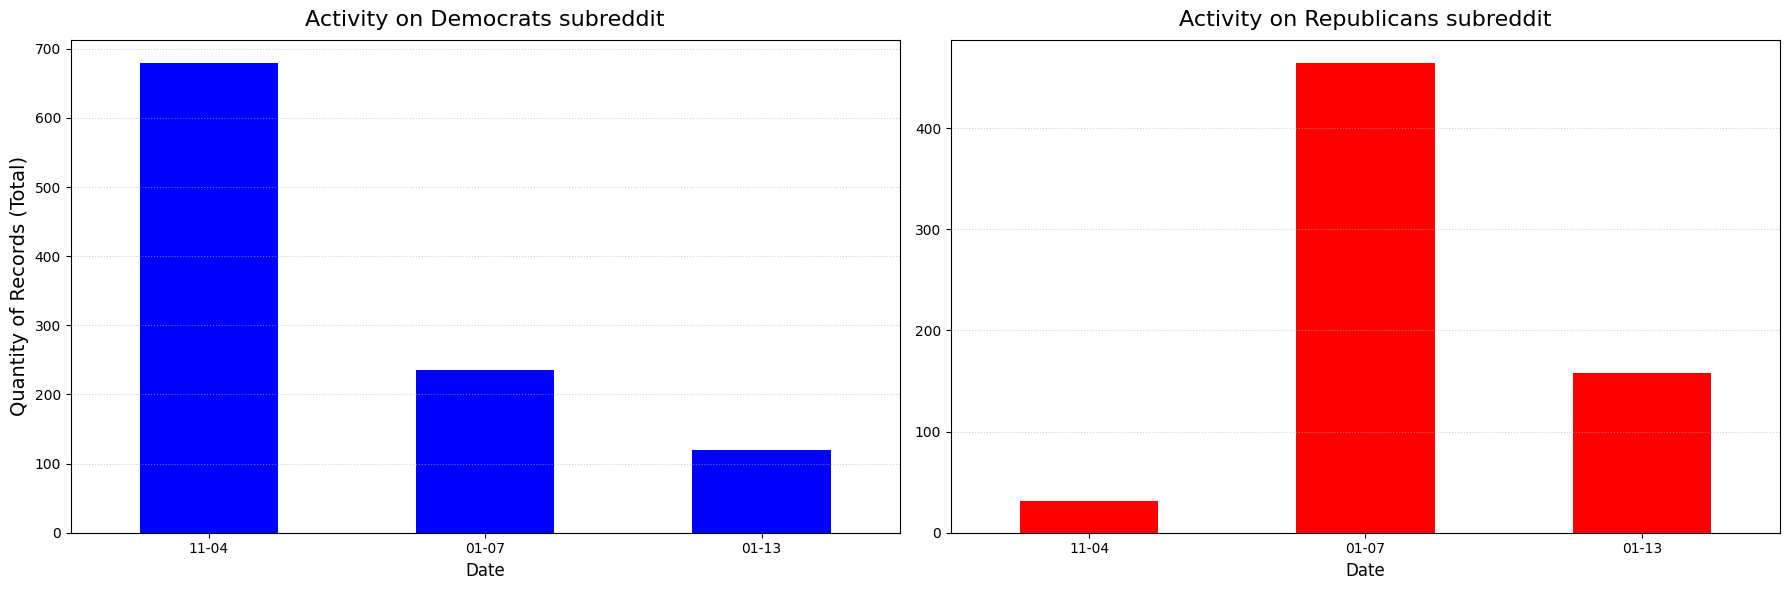

In [ ]:
Image('/content/drive/MyDrive/Trump2020_CSS_course_project/visualization_photos/diff.png')

**Why neutral group had the biggest activity during January events?**

Because Neutral group saw the highest total activity (21,702 records), surpassing the Conservative group. This suggests that users, including those who may lean conservative, shifted to news-focused or neutral subreddits (like r/news or r/worldnews) to obtain descriptive information about the chaotic event.

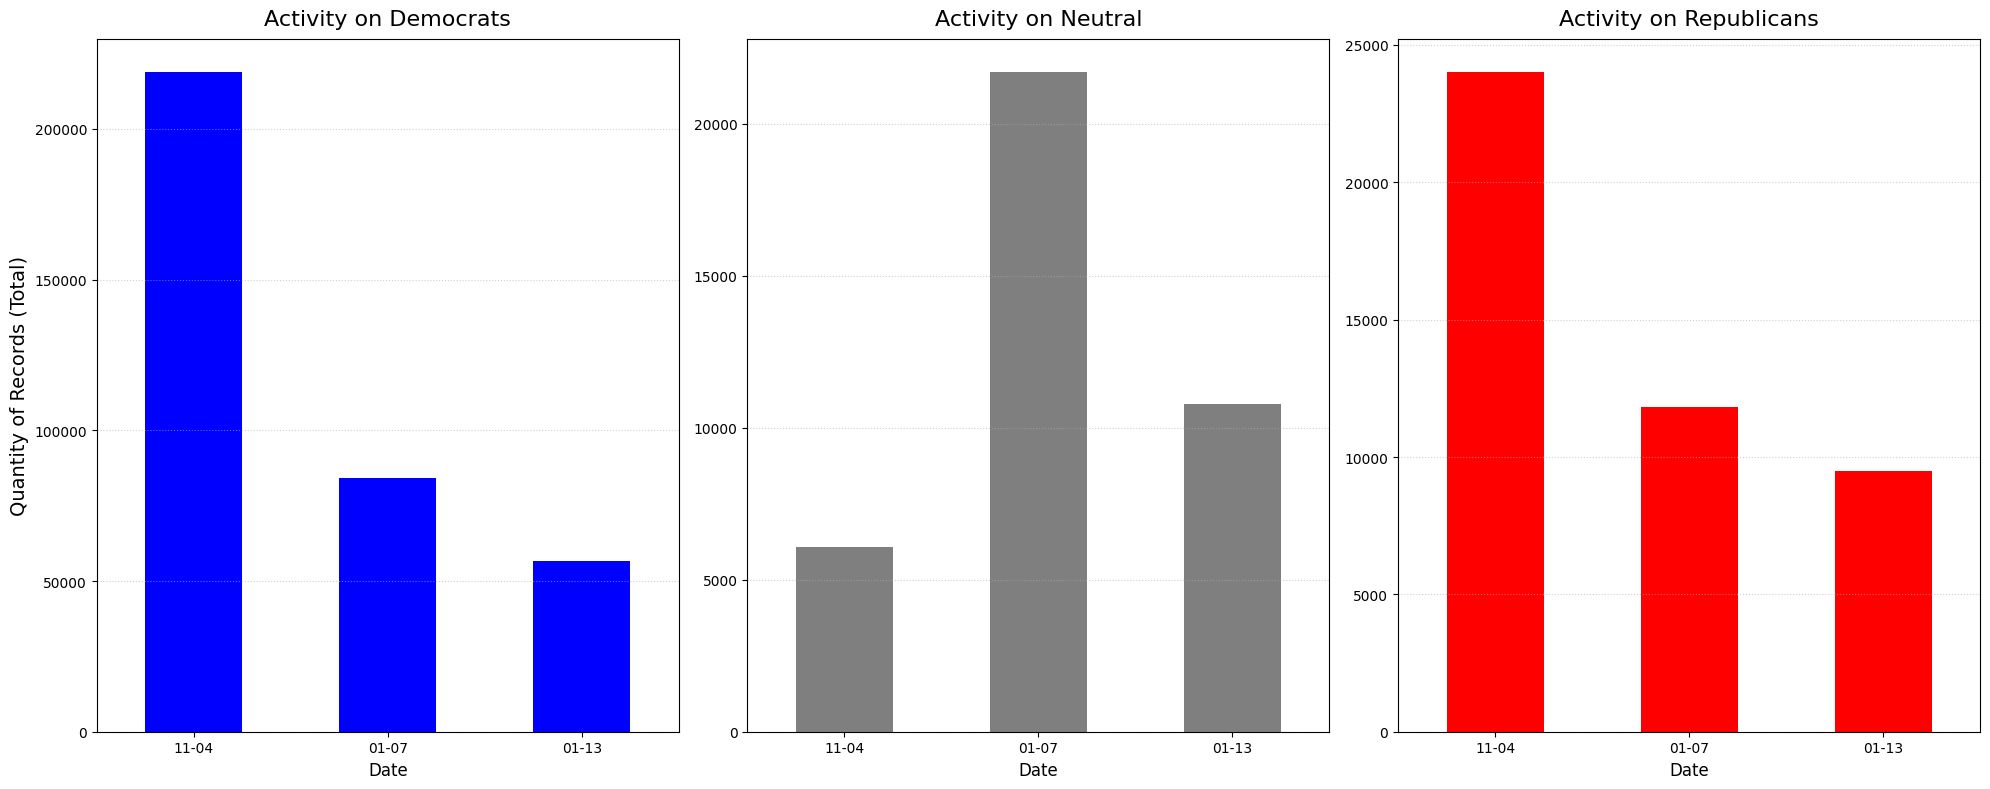

In [ ]:
Image('/content/drive/MyDrive/Trump2020_CSS_course_project/visualization_photos/no_diff.png')

**What can we tell in conclusion about these 3 groups on reddit during peak events?**

**Conservative Group: Divided Response and Narrative Deflection**

The Conservative community displayed internal division and strategic weakness in its response to the crises.

* Divergent Opinion: Their sentiment analysis showed conflicting emotional drivers during the Election (positive hope for "trump win" vs. negative focus on "voter fraud"), preventing a unified reaction.

* Decentralized Activity: The community failed to generate a consolidated, high-volume peak during the January crises, instead seeing activity decline overall and fragment into dedicated, smaller subreddits.

* Reactive Posture: Rather than leading a dominant narrative, the group adopted a defensive posture, consistently reframing events with counter-narratives focused on "conspiracy theories" and attacks on "free speech", indicating a weakness in establishing a compelling and unified answer to the political events.

**Liberal Group: United Narrative and Situational Leadership**

* The Liberal community demonstrated strong unity and consistency, allowing it to effectively dictate the dominant narrative and act as the leader of the situational response.

* Cohesive Sentiment: The group maintained a clear and consistent emotional trajectory: elation and affirmation during the election, transitioning to institutional outrage during the crises.

* Unified Focus: Their content was tightly focused on consequence and accountability (e.g., "25th amendment", "impeached twice"), presenting a cohesive, actionable political goal throughout the period.

* Dominant Volume: The sheer scale and unity of the community allowed it to generate the largest activity spikes, effectively commanding the volume of discussion and driving the mainstream narrative around accountability.

**Neutral Group: The Essential Factual Anchor**

* The Neutral community functioned as an essential anchor for objective information during periods of high polarization and emotional chaos.

* Primary Role: This group served as the factual reservoir, prioritizing procedural documentation and external citation (e.g., "en wikipedia") over political framing.

* Crisis Function: Their activity raised during the Capitol Attack, suggesting users turned to these spaces to seek factual clarity and descriptive information when partisan channels were saturated with polarized sentiment.